<a href="https://colab.research.google.com/github/sanketdholi33/Data-science-assignment/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import data

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('gold1.csv')

In [ ]:
df

date    price  year  month  days       date1
0     01-01-2016  2252.60  2016      1     1  01-01-2016
1     02-01-2016  2454.50  2016      1     2  02-01-2016
2     03-01-2016  2708.10  2016      1     3  03-01-2016
3     04-01-2016  2577.80  2016      1     4  04-01-2016
4     05-01-2016  2597.75  2016      1     5  05-01-2016
...          ...      ...   ...    ...   ...         ...
2177  17-12-2021  4394.40  2021     12    17  17-12-2021
2178  18-12-2021  4389.50  2021     12    18  18-12-2021
2179  19-12-2021  4389.50  2021     12    19  19-12-2021
2180  20-12-2021  4354.10  2021     12    20  20-12-2021
2181  21-12-2021  4346.50  2021     12    21  21-12-2021

[2182 rows x 6 columns]

In [ ]:
import pandas as pd
df['date_cre'] = pd.to_datetime(df[['year', 'month', 'days']])

In [ ]:
df

date    price  year  month  days       date1   date_cre
0     01-01-2016  2252.60  2016      1     1  01-01-2016 2016-01-01
1     02-01-2016  2454.50  2016      1     2  02-01-2016 2016-01-02
2     03-01-2016  2708.10  2016      1     3  03-01-2016 2016-01-03
3     04-01-2016  2577.80  2016      1     4  04-01-2016 2016-01-04
4     05-01-2016  2597.75  2016      1     5  05-01-2016 2016-01-05
...          ...      ...   ...    ...   ...         ...        ...
2177  17-12-2021  4394.40  2021     12    17  17-12-2021 2021-12-17
2178  18-12-2021  4389.50  2021     12    18  18-12-2021 2021-12-18
2179  19-12-2021  4389.50  2021     12    19  19-12-2021 2021-12-19
2180  20-12-2021  4354.10  2021     12    20  20-12-2021 2021-12-20
2181  21-12-2021  4346.50  2021     12    21  21-12-2021 2021-12-21

[2182 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2182 non-null   object        
 1   price     2182 non-null   float64       
 2   year      2182 non-null   int64         
 3   month     2182 non-null   int64         
 4   days      2182 non-null   int64         
 5   date1     2182 non-null   object        
 6   date_cre  2182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 119.5+ KB


In [ ]:
df[df['date'].isna()]

Empty DataFrame
Columns: [date, price, year, month, days, date1, date_cre]
Index: []

In [ ]:
df = df.drop(columns = 'date')
df = df.drop(columns = 'date1')
df = df.drop(columns = 'year')

In [ ]:
df = df[['date_cre', 'price', 'month', 'days']]

In [ ]:
df

date_cre    price  month  days
0    2016-01-01  2252.60      1     1
1    2016-01-02  2454.50      1     2
2    2016-01-03  2708.10      1     3
3    2016-01-04  2577.80      1     4
4    2016-01-05  2597.75      1     5
...         ...      ...    ...   ...
2177 2021-12-17  4394.40     12    17
2178 2021-12-18  4389.50     12    18
2179 2021-12-19  4389.50     12    19
2180 2021-12-20  4354.10     12    20
2181 2021-12-21  4346.50     12    21

[2182 rows x 4 columns]

### Some visulizations for better urderstanding of data

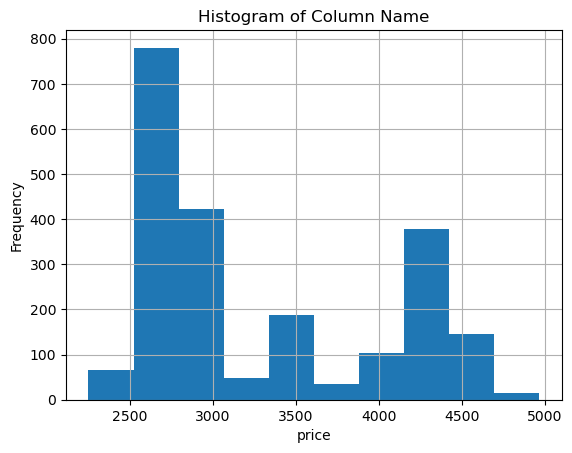

In [ ]:
df['price'].hist(bins=10)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name')
plt.show()

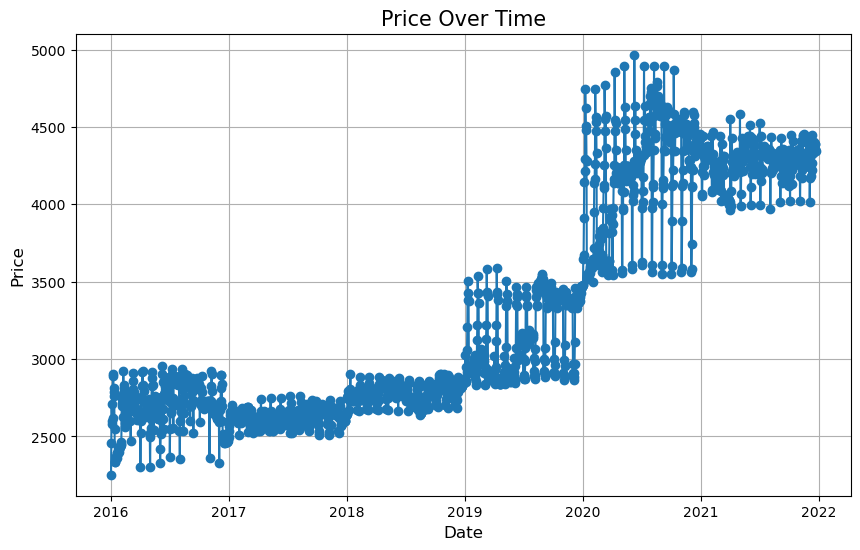

In [ ]:
# Assuming 'date' is your date column and 'price' is your price column
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot_date(df['date_cre'], df['price'], linestyle='solid')

# Set the title and labels
plt.title('Price Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

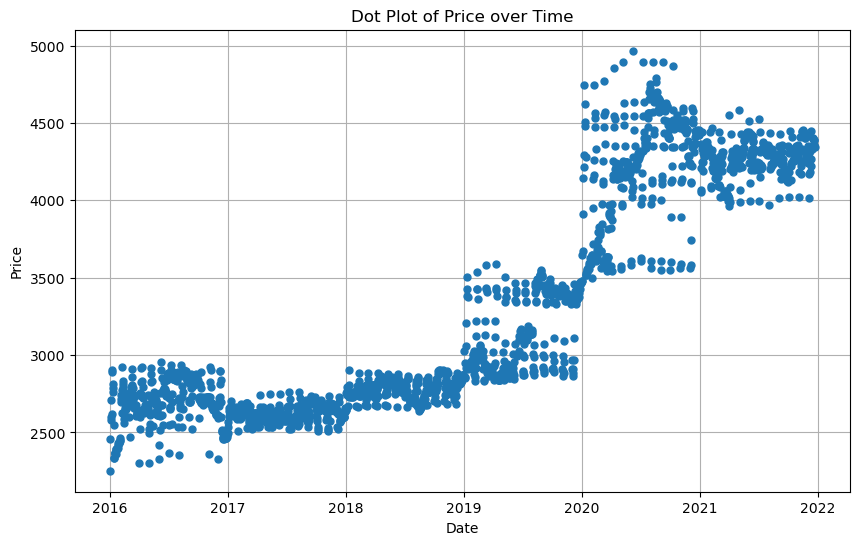

In [ ]:
# Assuming 'df' is your DataFrame and 'date' and 'price' are your columns
plt.figure(figsize=(10,6))
plt.plot_date(df['date_cre'], df['price'], linestyle='none', marker='o', markersize=5)
plt.title('Dot Plot of Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

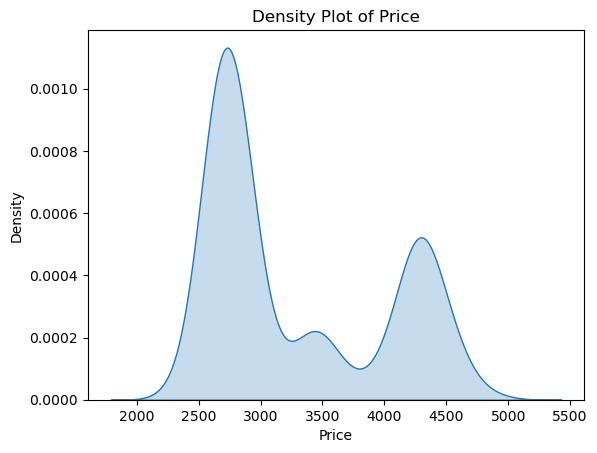

In [ ]:
# Assuming 'df' is your DataFrame and 'price' is your column
sns.kdeplot(df['price'], shade=True, fill=True)
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

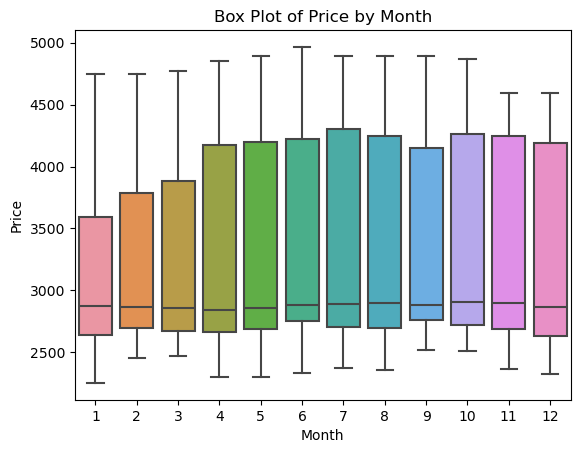

In [ ]:
sns.boxplot(data=df, x=df['date_cre'].dt.month, y='price')
plt.title('Box Plot of Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [ ]:
df1 = df

In [ ]:
df1['year'] = df1['date_cre'].dt.year
df1['month'] = df1['date_cre'].dt.month
df1['day'] = df1['date_cre'].dt.day

In [ ]:
df1 = df1.drop(columns = 'days')

In [ ]:
df1 = df1[['date_cre', 'price', 'year', 'month', 'day']]

In [ ]:
df1

date_cre    price  year  month  day
0    2016-01-01  2252.60  2016      1    1
1    2016-01-02  2454.50  2016      1    2
2    2016-01-03  2708.10  2016      1    3
3    2016-01-04  2577.80  2016      1    4
4    2016-01-05  2597.75  2016      1    5
...         ...      ...   ...    ...  ...
2177 2021-12-17  4394.40  2021     12   17
2178 2021-12-18  4389.50  2021     12   18
2179 2021-12-19  4389.50  2021     12   19
2180 2021-12-20  4354.10  2021     12   20
2181 2021-12-21  4346.50  2021     12   21

[2182 rows x 5 columns]

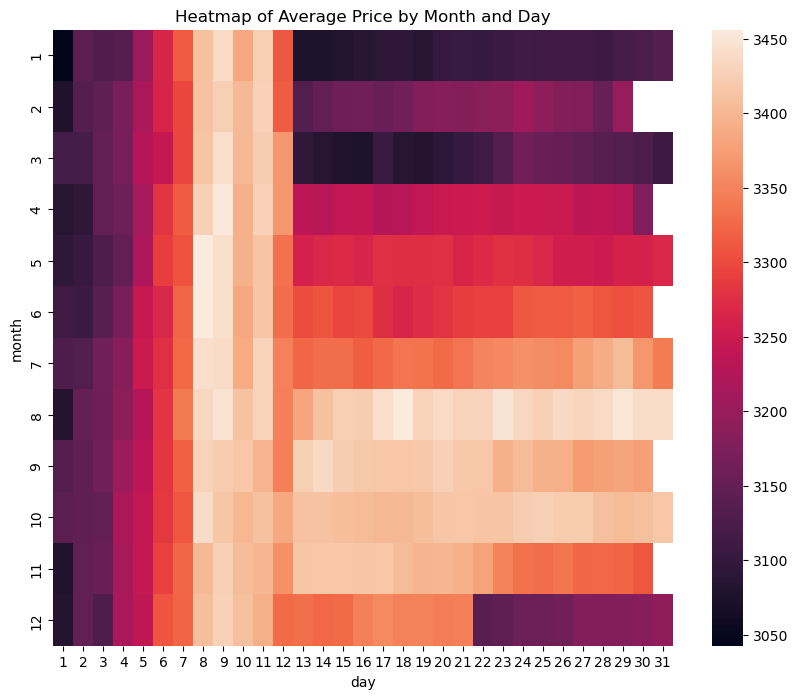

In [ ]:
pivot_table = df1.pivot_table(values='price', index='month', columns='day', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table)
plt.title('Heatmap of Average Price by Month and Day')
plt.show()

In [ ]:
df = df.drop(columns = 'days')

In [ ]:
df = df[['date_cre', 'price', 'year', 'month', 'day']]

In [ ]:
print(df)

       date_cre    price  year  month  day
0    2016-01-01  2252.60  2016      1    1
1    2016-01-02  2454.50  2016      1    2
2    2016-01-03  2708.10  2016      1    3
3    2016-01-04  2577.80  2016      1    4
4    2016-01-05  2597.75  2016      1    5
...         ...      ...   ...    ...  ...
2177 2021-12-17  4394.40  2021     12   17
2178 2021-12-18  4389.50  2021     12   18
2179 2021-12-19  4389.50  2021     12   19
2180 2021-12-20  4354.10  2021     12   20
2181 2021-12-21  4346.50  2021     12   21

[2182 rows x 5 columns]


### Monthly Analysis-2016

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2016 = df[df['date_cre'].dt.year == 2016]

In [ ]:
df_2016.reset_index(inplace=True)

In [ ]:
df_2016.head(31)

date_cre        price  year  month  day
0  2016-01-01  2252.600000  2016      1    1
1  2016-01-02  2454.500000  2016      1    2
2  2016-01-03  2708.100000  2016      1    3
3  2016-01-04  2577.800000  2016      1    4
4  2016-01-05  2597.750000  2016      1    5
5  2016-01-06  2617.700000  2016      1    6
6  2016-01-07  2903.800000  2016      1    7
7  2016-01-08  2887.800000  2016      1    8
8  2016-01-09  2813.800000  2016      1    9
9  2016-01-10  2786.800000  2016      1   10
10 2016-01-11  2759.800000  2016      1   11
11 2016-01-12  2549.000000  2016      1   12
12 2016-01-13  2335.600000  2016      1   13
13 2016-01-14  2332.000000  2016      1   14
14 2016-01-15  2365.800000  2016      1   15
15 2016-01-16  2367.066667  2016      1   16
16 2016-01-17  2368.333333  2016      1   17
17 2016-01-18  2369.600000  2016      1   18
18 2016-01-19  2359.400000  2016      1   19
19 2016-01-20  2394.100000  2016      1   20
20 2016-01-21  2395.600000  2016      1   21
21 2016-01-22  2390.300000  2016      1   22
22 2016-01-23  2393.333333  2016      1   23
23 2016-01-24  2396.366667  2016      1   24
24 2016-01-25  2399.400000  2016      1   25
25 2016-01-26  2420.900000  2016      1   26
26 2016-01-27  2428.800000  2016      1   27
27 2016-01-28  2431.200000  2016      1   28
28 2016-01-29  2430.200000  2016      1   29
29 2016-01-30  2437.850000  2016      1   30
30 2016-01-31  2445.500000  2016      1   31

In [ ]:
print(df_2016)

      date_cre        price  year  month  day
0   2016-01-01  2252.600000  2016      1    1
1   2016-01-02  2454.500000  2016      1    2
2   2016-01-03  2708.100000  2016      1    3
3   2016-01-04  2577.800000  2016      1    4
4   2016-01-05  2597.750000  2016      1    5
..         ...          ...   ...    ...  ...
361 2016-12-27  2469.300000  2016     12   27
362 2016-12-28  2484.300000  2016     12   28
363 2016-12-29  2498.100000  2016     12   29
364 2016-12-30  2497.800000  2016     12   30
365 2016-12-31  2534.033333  2016     12   31

[366 rows x 5 columns]


In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date_cre  366 non-null    datetime64[ns]
 1   price     366 non-null    float64       
 2   year      366 non-null    int32         
 3   month     366 non-null    int32         
 4   day       366 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 12.9 KB


In [ ]:
print(df_2016['date_cre'].value_counts())

date_cre
2016-01-01    1
2016-09-08    1
2016-09-06    1
2016-09-05    1
2016-09-04    1
             ..
2016-04-30    1
2016-04-29    1
2016-04-28    1
2016-04-27    1
2016-12-31    1
Name: count, Length: 366, dtype: int64


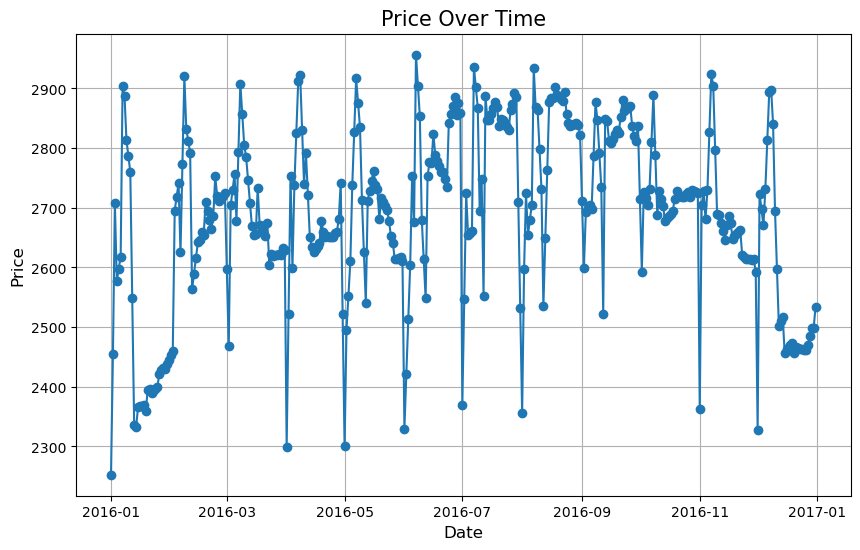

In [ ]:
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot_date(df_2016['date_cre'], df_2016['price'], linestyle='solid')

# Set the title and labels
plt.title('Price Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

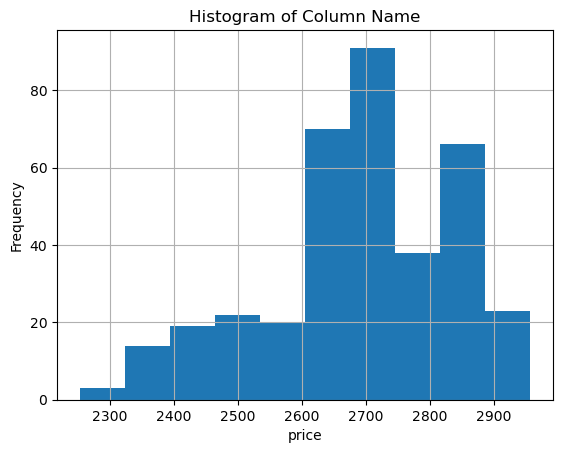

In [ ]:
df_2016['price'].hist(bins=10)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name')
plt.show()

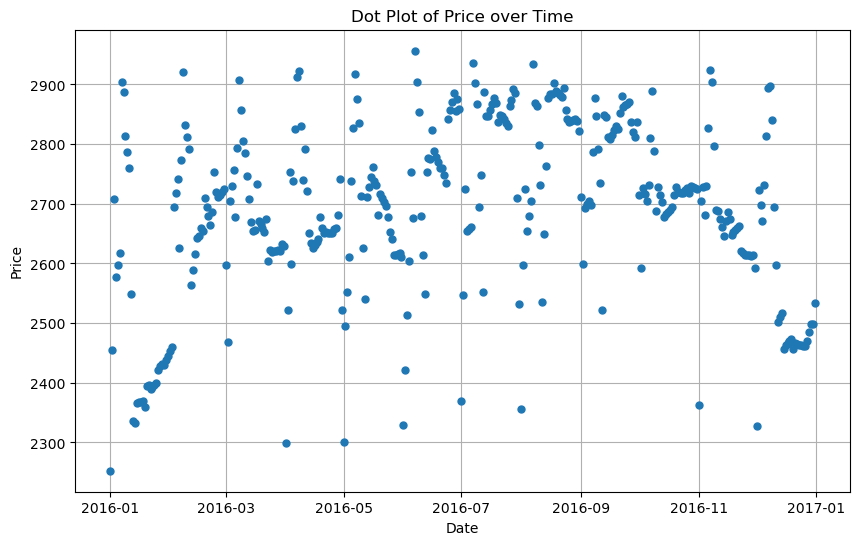

In [ ]:
# Assuming 'df' is your DataFrame and 'date' and 'price' are your columns
plt.figure(figsize=(10,6))
plt.plot_date(df_2016['date_cre'], df_2016['price'], linestyle='none', marker='o', markersize=5)
plt.title('Dot Plot of Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

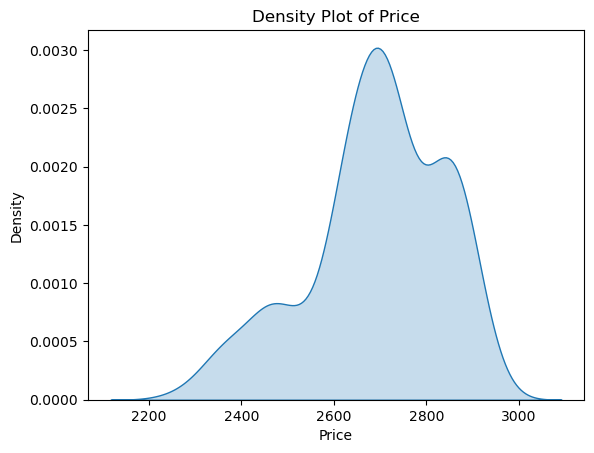

In [ ]:
# Assuming 'df' is your DataFrame and 'price' is your column
sns.kdeplot(df_2016['price'], shade=True, fill=True)
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

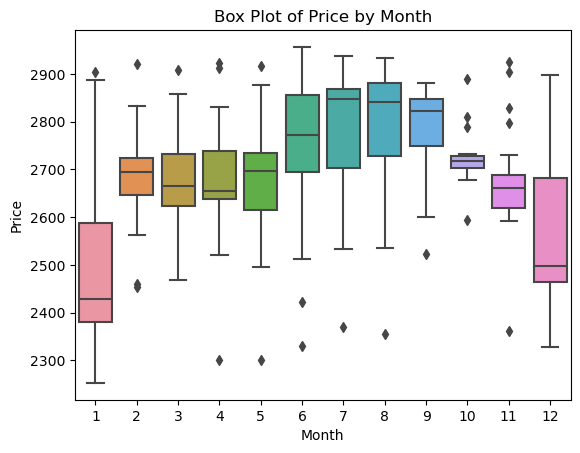

In [ ]:
sns.boxplot(data=df, x=df_2016['date_cre'].dt.month, y='price')
plt.title('Box Plot of Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

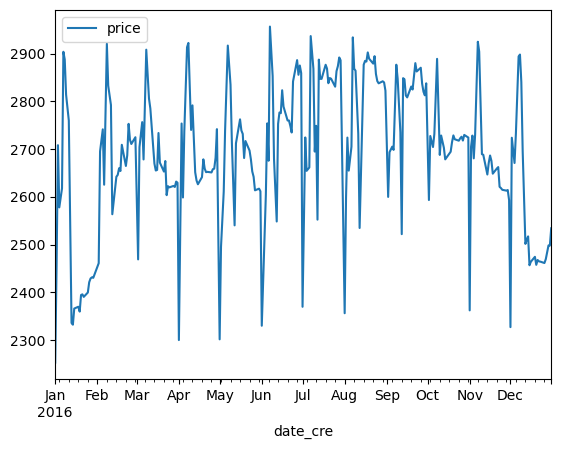

In [ ]:
import matplotlib.pyplot as plt
df_2016.plot(kind='line', x='date_cre', y='price')

plt.show()

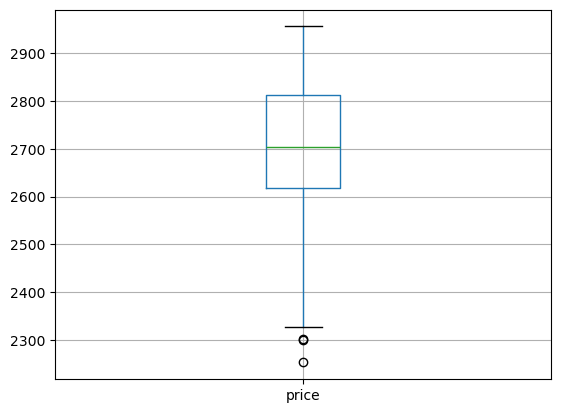

In [ ]:
import matplotlib.pyplot as plt
df_2016.boxplot(column='price')

plt.show()

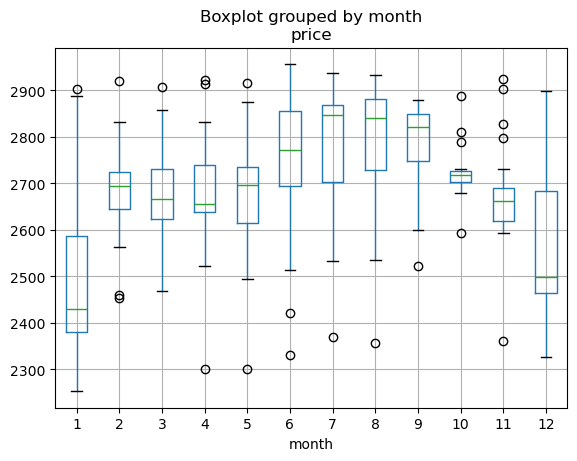

In [ ]:
import matplotlib.pyplot as plt

# assuming df_2016 is your DataFrame, 'date' is your date column, and 'price' is your column of interest
df_2016['month'] = df_2016['date_cre'].dt.month

# create a box plot for each month
df_2016.boxplot(column='price', by='month')

plt.show()

Text(0, 0.5, 'Price')

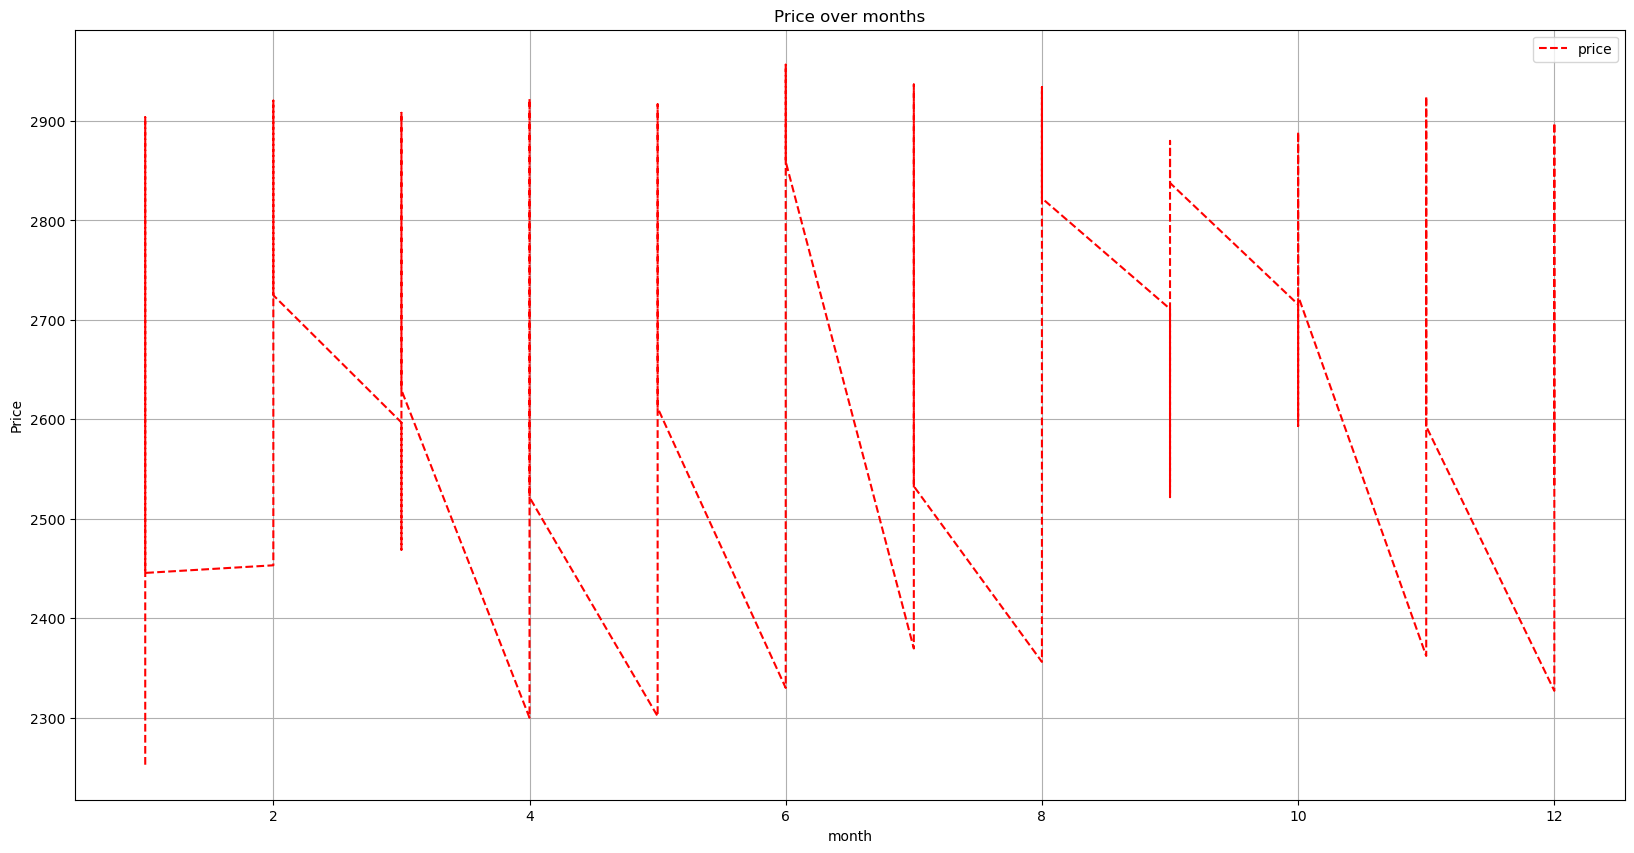

In [ ]:
ax = df_2016.plot(kind='line', x='month', y='price', figsize=(20, 10), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over months')
ax.set_xlabel('month')
ax.set_ylabel('Price')

In [ ]:
df_2016_dup = df_2016

In [ ]:
df_2016.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2016['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  5271.367823415422


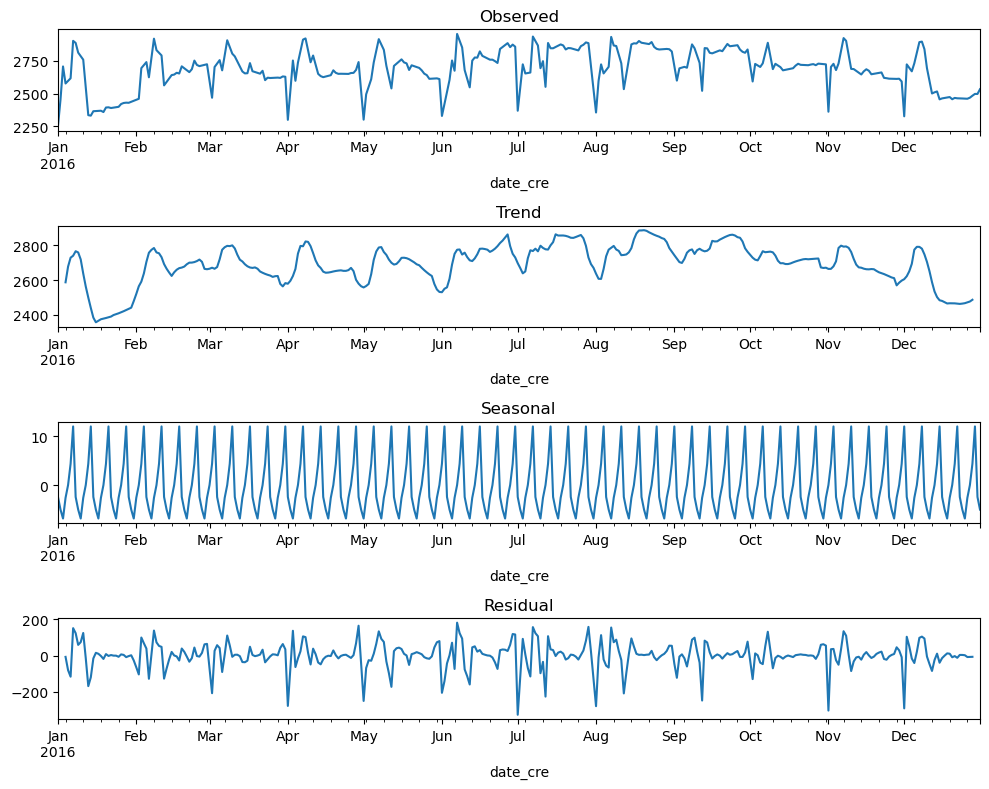

In [ ]:
df_2016_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2016_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily analysis

### 2016

In [ ]:
import pandas as pd
start_date = '2016-01-01'
end_date = '2016-01-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_jan = df_2016.loc[mask]

In [ ]:
df_fil_jan

date_cre        price  year  month  day
0  2016-01-01  2252.600000  2016      1    1
1  2016-01-02  2454.500000  2016      1    2
2  2016-01-03  2708.100000  2016      1    3
3  2016-01-04  2577.800000  2016      1    4
4  2016-01-05  2597.750000  2016      1    5
5  2016-01-06  2617.700000  2016      1    6
6  2016-01-07  2903.800000  2016      1    7
7  2016-01-08  2887.800000  2016      1    8
8  2016-01-09  2813.800000  2016      1    9
9  2016-01-10  2786.800000  2016      1   10
10 2016-01-11  2759.800000  2016      1   11
11 2016-01-12  2549.000000  2016      1   12
12 2016-01-13  2335.600000  2016      1   13
13 2016-01-14  2332.000000  2016      1   14
14 2016-01-15  2365.800000  2016      1   15
15 2016-01-16  2367.066667  2016      1   16
16 2016-01-17  2368.333333  2016      1   17
17 2016-01-18  2369.600000  2016      1   18
18 2016-01-19  2359.400000  2016      1   19
19 2016-01-20  2394.100000  2016      1   20
20 2016-01-21  2395.600000  2016      1   21
21 2016-01-22  2390.300000  2016      1   22
22 2016-01-23  2393.333333  2016      1   23
23 2016-01-24  2396.366667  2016      1   24
24 2016-01-25  2399.400000  2016      1   25
25 2016-01-26  2420.900000  2016      1   26
26 2016-01-27  2428.800000  2016      1   27
27 2016-01-28  2431.200000  2016      1   28
28 2016-01-29  2430.200000  2016      1   29
29 2016-01-30  2437.850000  2016      1   30
30 2016-01-31  2445.500000  2016      1   31

Text(0, 0.5, 'Price')

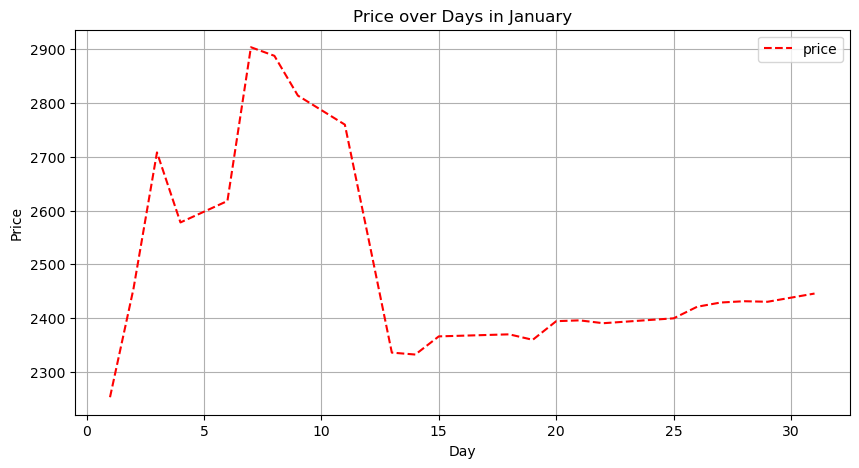

In [ ]:
ax = df_fil_jan.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in January')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

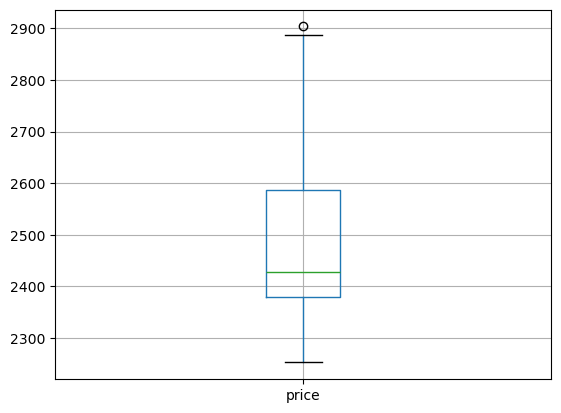

In [ ]:
import matplotlib.pyplot as plt
df_fil_jan.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-02-01'
end_date = '2016-02-29'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_feb = df_2016.loc[mask]

In [ ]:
df_fil_feb

date_cre        price  year  month  day
31 2016-02-01  2453.150000  2016      2    1
32 2016-02-02  2460.800000  2016      2    2
33 2016-02-03  2695.200000  2016      2    3
34 2016-02-04  2718.250000  2016      2    4
35 2016-02-05  2741.300000  2016      2    5
36 2016-02-06  2625.300000  2016      2    6
37 2016-02-07  2772.900000  2016      2    7
38 2016-02-08  2920.500000  2016      2    8
39 2016-02-09  2832.700000  2016      2    9
40 2016-02-10  2812.500000  2016      2   10
41 2016-02-11  2792.300000  2016      2   11
42 2016-02-12  2563.400000  2016      2   12
43 2016-02-13  2589.566667  2016      2   13
44 2016-02-14  2615.733333  2016      2   14
45 2016-02-15  2641.900000  2016      2   15
46 2016-02-16  2645.900000  2016      2   16
47 2016-02-17  2659.800000  2016      2   17
48 2016-02-18  2654.000000  2016      2   18
49 2016-02-19  2708.900000  2016      2   19
50 2016-02-20  2694.133333  2016      2   20
51 2016-02-21  2679.366667  2016      2   21
52 2016-02-22  2664.600000  2016      2   22
53 2016-02-23  2687.100000  2016      2   23
54 2016-02-24  2752.800000  2016      2   24
55 2016-02-25  2719.500000  2016      2   25
56 2016-02-26  2710.600000  2016      2   26
57 2016-02-27  2715.333333  2016      2   27
58 2016-02-28  2720.066667  2016      2   28
59 2016-02-29  2724.800000  2016      2   29

Text(0, 0.5, 'Price')

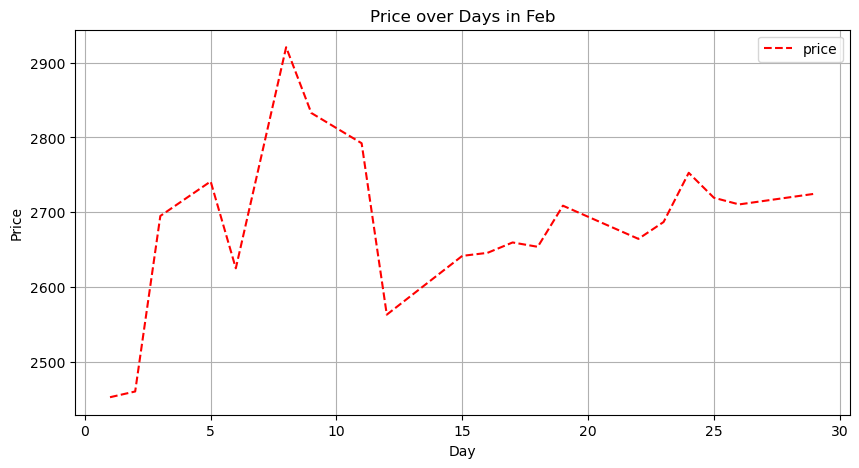

In [ ]:
ax = df_fil_feb.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in Feb')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

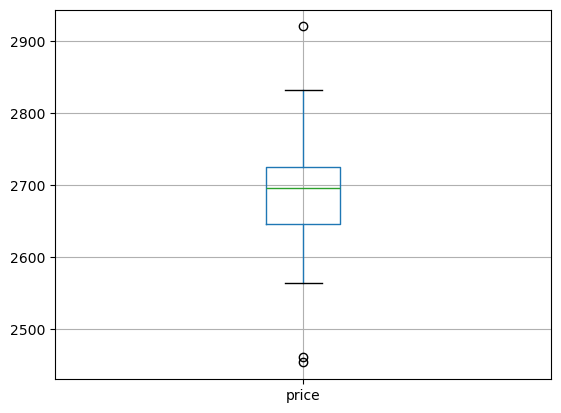

In [ ]:
import matplotlib.pyplot as plt
df_fil_feb.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-03-01'
end_date = '2016-03-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_mar = df_2016.loc[mask]

In [ ]:
df_fil_mar

date_cre        price  year  month  day
60 2016-03-01  2596.800000  2016      3    1
61 2016-03-02  2468.800000  2016      3    2
62 2016-03-03  2704.000000  2016      3    3
63 2016-03-04  2730.200000  2016      3    4
64 2016-03-05  2756.400000  2016      3    5
65 2016-03-06  2678.200000  2016      3    6
66 2016-03-07  2793.200000  2016      3    7
67 2016-03-08  2908.200000  2016      3    8
68 2016-03-09  2857.000000  2016      3    9
69 2016-03-10  2805.800000  2016      3   10
70 2016-03-11  2785.000000  2016      3   11
71 2016-03-12  2746.533333  2016      3   12
72 2016-03-13  2708.066667  2016      3   13
73 2016-03-14  2669.600000  2016      3   14
74 2016-03-15  2655.000000  2016      3   15
75 2016-03-16  2656.300000  2016      3   16
76 2016-03-17  2733.600000  2016      3   17
77 2016-03-18  2671.600000  2016      3   18
78 2016-03-19  2665.333333  2016      3   19
79 2016-03-20  2659.066667  2016      3   20
80 2016-03-21  2652.800000  2016      3   21
81 2016-03-22  2674.900000  2016      3   22
82 2016-03-23  2603.400000  2016      3   23
83 2016-03-24  2622.100000  2016      3   24
84 2016-03-25  2619.700000  2016      3   25
85 2016-03-26  2620.700000  2016      3   26
86 2016-03-27  2621.700000  2016      3   27
87 2016-03-28  2622.700000  2016      3   28
88 2016-03-29  2620.600000  2016      3   29
89 2016-03-30  2631.800000  2016      3   30
90 2016-03-31  2629.400000  2016      3   31

Text(0, 0.5, 'Price')

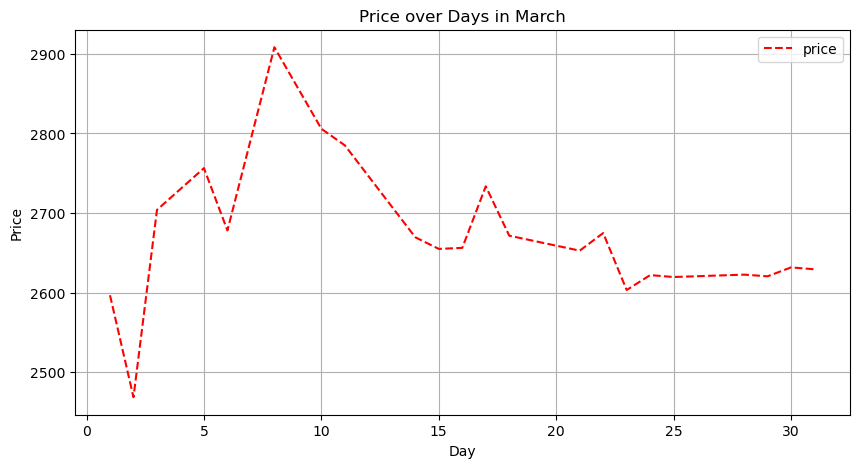

In [ ]:
ax = df_fil_mar.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in March')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

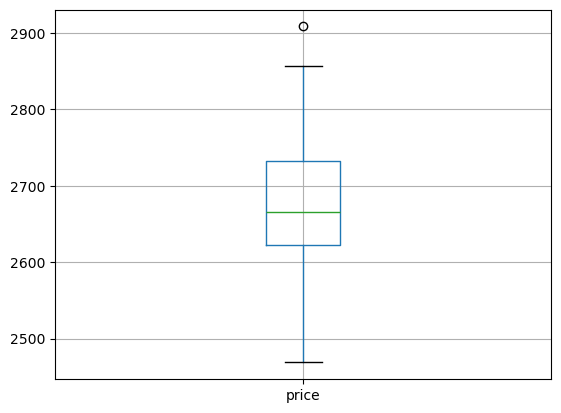

In [ ]:
import matplotlib.pyplot as plt
df_fil_mar.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-04-01'
end_date = '2016-04-30'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_april = df_2016.loc[mask]

In [ ]:
df_fil_april

date_cre    price  year  month  day
91  2016-04-01  2299.80  2016      4    1
92  2016-04-02  2521.50  2016      4    2
93  2016-04-03  2753.50  2016      4    3
94  2016-04-04  2598.50  2016      4    4
95  2016-04-05  2737.80  2016      4    5
96  2016-04-06  2825.55  2016      4    6
97  2016-04-07  2913.30  2016      4    7
98  2016-04-08  2922.30  2016      4    8
99  2016-04-09  2831.20  2016      4    9
100 2016-04-10  2740.10  2016      4   10
101 2016-04-11  2791.50  2016      4   11
102 2016-04-12  2721.45  2016      4   12
103 2016-04-13  2651.40  2016      4   13
104 2016-04-14  2634.10  2016      4   14
105 2016-04-15  2626.20  2016      4   15
106 2016-04-16  2631.20  2016      4   16
107 2016-04-17  2636.20  2016      4   17
108 2016-04-18  2641.20  2016      4   18
109 2016-04-19  2678.40  2016      4   19
110 2016-04-20  2659.00  2016      4   20
111 2016-04-21  2651.60  2016      4   21
112 2016-04-22  2652.20  2016      4   22
113 2016-04-23  2651.80  2016      4   23
114 2016-04-24  2651.40  2016      4   24
115 2016-04-25  2651.00  2016      4   25
116 2016-04-26  2657.80  2016      4   26
117 2016-04-27  2658.90  2016      4   27
118 2016-04-28  2681.60  2016      4   28
119 2016-04-29  2741.70  2016      4   29
120 2016-04-30  2521.50  2016      4   30

Text(0, 0.5, 'Price')

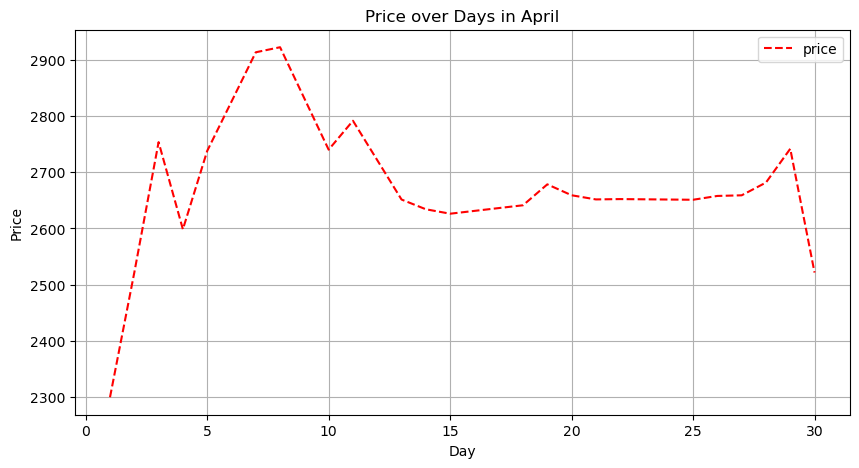

In [ ]:
ax = df_fil_april.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in April')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

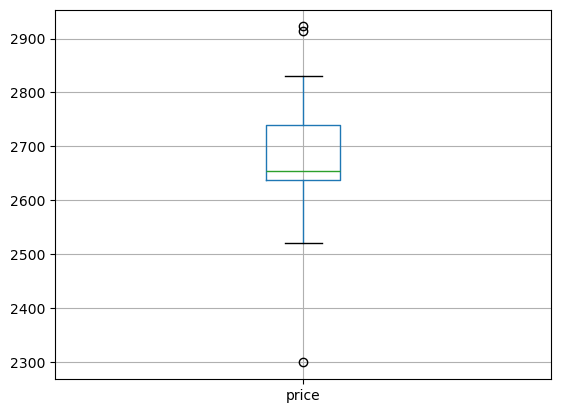

In [ ]:
import matplotlib.pyplot as plt
df_fil_april.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-05-01'
end_date = '2016-05-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_may = df_2016.loc[mask]

In [ ]:
df_fil_may

date_cre        price  year  month  day
121 2016-05-01  2301.300000  2016      5    1
122 2016-05-02  2495.100000  2016      5    2
123 2016-05-03  2552.900000  2016      5    3
124 2016-05-04  2610.700000  2016      5    4
125 2016-05-05  2738.600000  2016      5    5
126 2016-05-06  2827.700000  2016      5    6
127 2016-05-07  2916.800000  2016      5    7
128 2016-05-08  2876.000000  2016      5    8
129 2016-05-09  2834.800000  2016      5    9
130 2016-05-10  2713.400000  2016      5   10
131 2016-05-11  2626.750000  2016      5   11
132 2016-05-12  2540.100000  2016      5   12
133 2016-05-13  2712.000000  2016      5   13
134 2016-05-14  2728.733333  2016      5   14
135 2016-05-15  2745.466667  2016      5   15
136 2016-05-16  2762.200000  2016      5   16
137 2016-05-17  2738.900000  2016      5   17
138 2016-05-18  2731.700000  2016      5   18
139 2016-05-19  2681.200000  2016      5   19
140 2016-05-20  2716.800000  2016      5   20
141 2016-05-21  2710.133333  2016      5   21
142 2016-05-22  2703.466667  2016      5   22
143 2016-05-23  2696.800000  2016      5   23
144 2016-05-24  2678.300000  2016      5   24
145 2016-05-25  2653.000000  2016      5   25
146 2016-05-26  2641.800000  2016      5   26
147 2016-05-27  2613.500000  2016      5   27
148 2016-05-28  2614.666667  2016      5   28
149 2016-05-29  2615.833333  2016      5   29
150 2016-05-30  2617.000000  2016      5   30
151 2016-05-31  2611.500000  2016      5   31

Text(0, 0.5, 'Price')

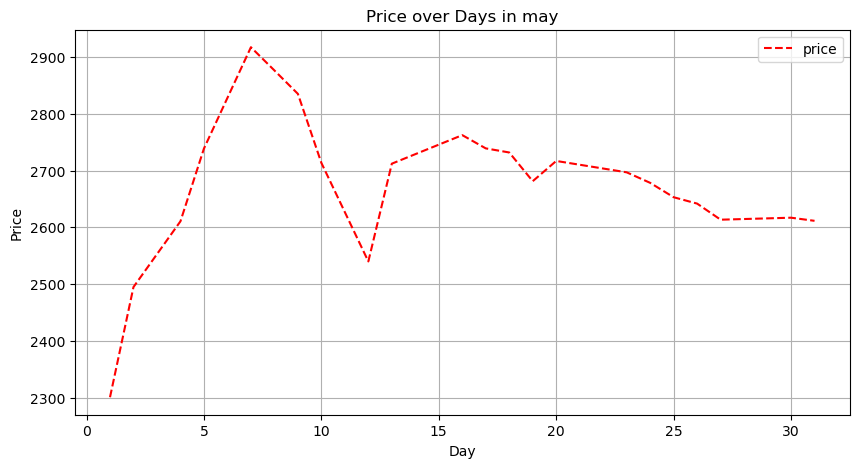

In [ ]:
ax = df_fil_may.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in may')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

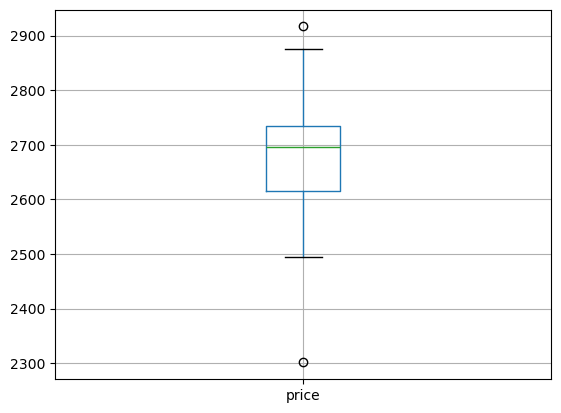

In [ ]:
import matplotlib.pyplot as plt
df_fil_may.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-06-01'
end_date = '2016-06-30'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_june = df_2016.loc[mask]

In [ ]:
df_fil_june

date_cre    price  year  month  day
152 2016-06-01  2329.80  2016      6    1
153 2016-06-02  2421.30  2016      6    2
154 2016-06-03  2512.80  2016      6    3
155 2016-06-04  2604.30  2016      6    4
156 2016-06-05  2753.80  2016      6    5
157 2016-06-06  2675.50  2016      6    6
158 2016-06-07  2956.60  2016      6    7
159 2016-06-08  2904.85  2016      6    8
160 2016-06-09  2853.10  2016      6    9
161 2016-06-10  2679.90  2016      6   10
162 2016-06-11  2614.05  2016      6   11
163 2016-06-12  2548.20  2016      6   12
164 2016-06-13  2752.70  2016      6   13
165 2016-06-14  2776.50  2016      6   14
166 2016-06-15  2775.20  2016      6   15
167 2016-06-16  2823.20  2016      6   16
168 2016-06-17  2788.90  2016      6   17
169 2016-06-18  2779.20  2016      6   18
170 2016-06-19  2769.50  2016      6   19
171 2016-06-20  2759.80  2016      6   20
172 2016-06-21  2759.90  2016      6   21
173 2016-06-22  2748.60  2016      6   22
174 2016-06-23  2734.70  2016      6   23
175 2016-06-24  2841.60  2016      6   24
176 2016-06-25  2856.50  2016      6   25
177 2016-06-26  2871.40  2016      6   26
178 2016-06-27  2886.30  2016      6   27
179 2016-06-28  2855.60  2016      6   28
180 2016-06-29  2875.00  2016      6   29
181 2016-06-30  2859.10  2016      6   30

Text(0, 0.5, 'Price')

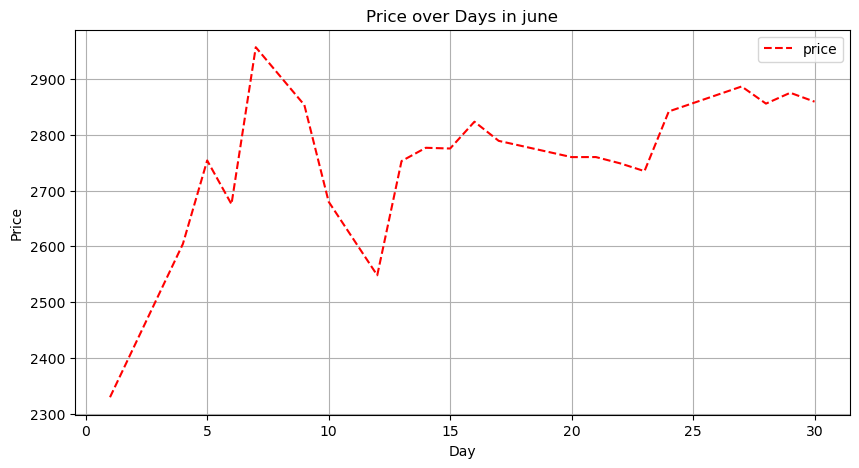

In [ ]:
ax = df_fil_june.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in june')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

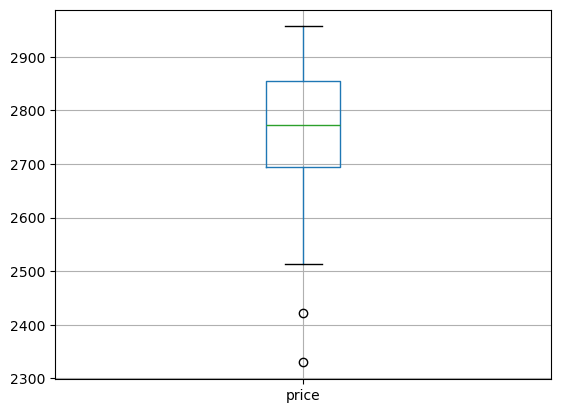

In [ ]:
import matplotlib.pyplot as plt
df_fil_june.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-07-01'
end_date = '2016-07-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_july = df_2016.loc[mask]

In [ ]:
df_fil_july

date_cre        price  year  month  day
182 2016-07-01  2369.500000  2016      7    1
183 2016-07-02  2546.900000  2016      7    2
184 2016-07-03  2724.300000  2016      7    3
185 2016-07-04  2654.300000  2016      7    4
186 2016-07-05  2657.900000  2016      7    5
187 2016-07-06  2661.500000  2016      7    6
188 2016-07-07  2936.700000  2016      7    7
189 2016-07-08  2902.350000  2016      7    8
190 2016-07-09  2868.000000  2016      7    9
191 2016-07-10  2694.700000  2016      7   10
192 2016-07-11  2748.700000  2016      7   11
193 2016-07-12  2552.100000  2016      7   12
194 2016-07-13  2887.400000  2016      7   13
195 2016-07-14  2847.200000  2016      7   14
196 2016-07-15  2847.000000  2016      7   15
197 2016-07-16  2856.866667  2016      7   16
198 2016-07-17  2866.733333  2016      7   17
199 2016-07-18  2876.600000  2016      7   18
200 2016-07-19  2868.600000  2016      7   19
201 2016-07-20  2837.900000  2016      7   20
202 2016-07-21  2848.800000  2016      7   21
203 2016-07-22  2847.400000  2016      7   22
204 2016-07-23  2841.833333  2016      7   23
205 2016-07-24  2836.266667  2016      7   24
206 2016-07-25  2830.700000  2016      7   25
207 2016-07-26  2863.200000  2016      7   26
208 2016-07-27  2873.700000  2016      7   27
209 2016-07-28  2891.900000  2016      7   28
210 2016-07-29  2886.000000  2016      7   29
211 2016-07-30  2709.333333  2016      7   30
212 2016-07-31  2532.666667  2016      7   31

Text(0, 0.5, 'Price')

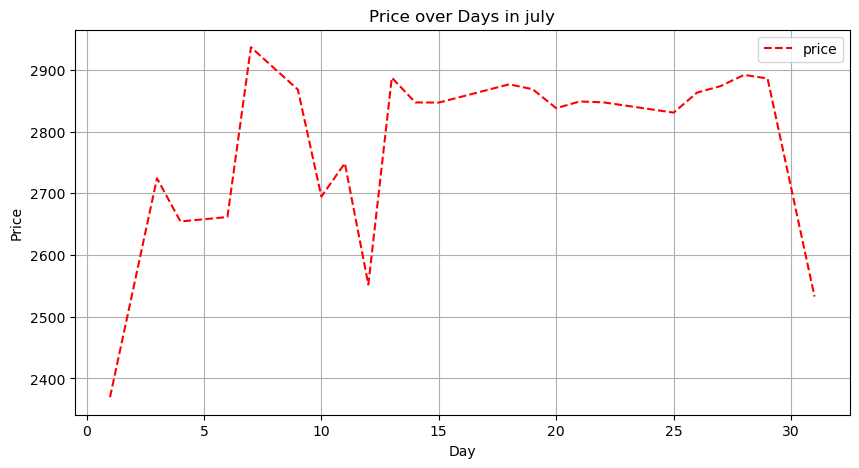

In [ ]:
ax = df_fil_july.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in july')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

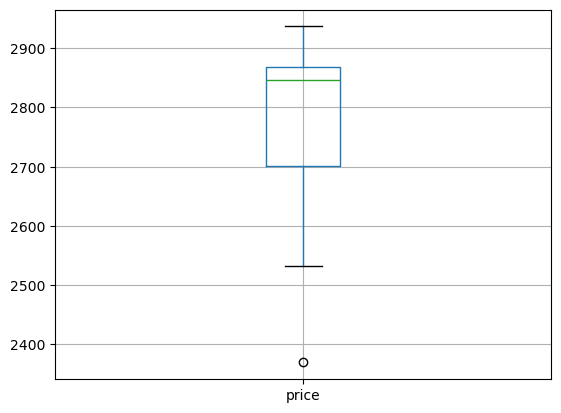

In [ ]:
import matplotlib.pyplot as plt
df_fil_july.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-08-01'
end_date = '2016-08-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_aug = df_2016.loc[mask]

In [ ]:
df_fil_aug

date_cre        price  year  month  day
213 2016-08-01  2356.000000  2016      8    1
214 2016-08-02  2597.300000  2016      8    2
215 2016-08-03  2724.000000  2016      8    3
216 2016-08-04  2654.800000  2016      8    4
217 2016-08-05  2679.900000  2016      8    5
218 2016-08-06  2705.000000  2016      8    6
219 2016-08-07  2934.000000  2016      8    7
220 2016-08-08  2868.300000  2016      8    8
221 2016-08-09  2864.200000  2016      8    9
222 2016-08-10  2798.150000  2016      8   10
223 2016-08-11  2732.100000  2016      8   11
224 2016-08-12  2534.600000  2016      8   12
225 2016-08-13  2648.633333  2016      8   13
226 2016-08-14  2762.666667  2016      8   14
227 2016-08-15  2876.700000  2016      8   15
228 2016-08-16  2884.800000  2016      8   16
229 2016-08-17  2883.400000  2016      8   17
230 2016-08-18  2902.500000  2016      8   18
231 2016-08-19  2889.300000  2016      8   19
232 2016-08-20  2885.866667  2016      8   20
233 2016-08-21  2882.433333  2016      8   21
234 2016-08-22  2879.000000  2016      8   22
235 2016-08-23  2894.600000  2016      8   23
236 2016-08-24  2857.400000  2016      8   24
237 2016-08-25  2842.500000  2016      8   25
238 2016-08-26  2837.700000  2016      8   26
239 2016-08-27  2839.133333  2016      8   27
240 2016-08-28  2840.566667  2016      8   28
241 2016-08-29  2842.000000  2016      8   29
242 2016-08-30  2839.600000  2016      8   30
243 2016-08-31  2822.300000  2016      8   31

Text(0, 0.5, 'Price')

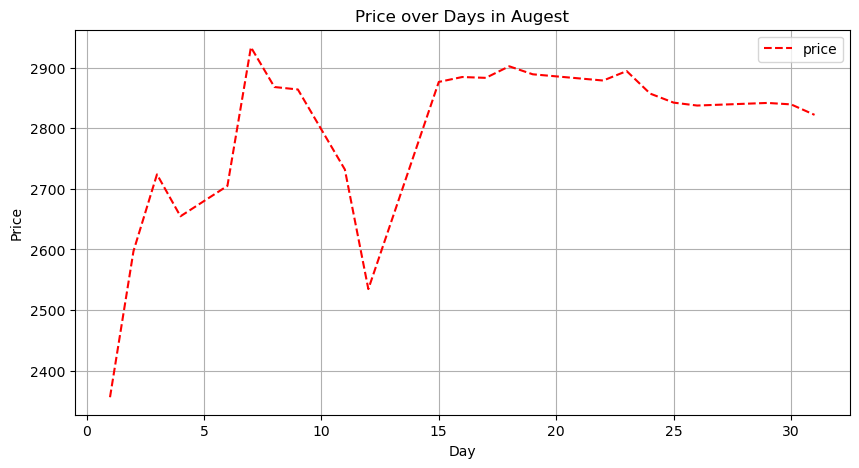

In [ ]:
ax = df_fil_aug.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in Augest')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

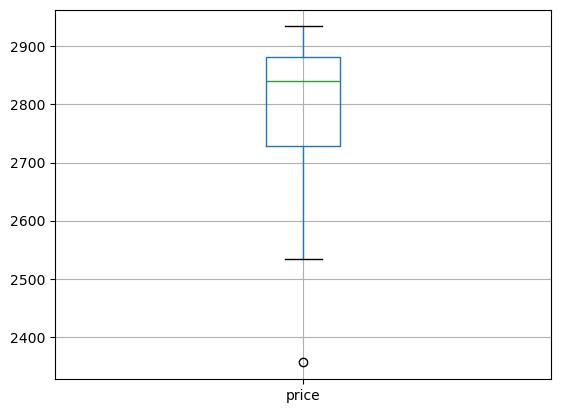

In [ ]:
import matplotlib.pyplot as plt
df_fil_aug.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-09-01'
end_date = '2016-09-30'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_sep = df_2016.loc[mask]

In [ ]:
df_fil_sep

date_cre        price  year  month  day
244 2016-09-01  2711.000000  2016      9    1
245 2016-09-02  2599.700000  2016      9    2
246 2016-09-03  2693.400000  2016      9    3
247 2016-09-04  2699.200000  2016      9    4
248 2016-09-05  2705.000000  2016      9    5
249 2016-09-06  2698.200000  2016      9    6
250 2016-09-07  2787.450000  2016      9    7
251 2016-09-08  2876.700000  2016      9    8
252 2016-09-09  2847.200000  2016      9    9
253 2016-09-10  2791.100000  2016      9   10
254 2016-09-11  2735.000000  2016      9   11
255 2016-09-12  2521.700000  2016      9   12
256 2016-09-13  2848.500000  2016      9   13
257 2016-09-14  2846.300000  2016      9   14
258 2016-09-15  2812.300000  2016      9   15
259 2016-09-16  2808.200000  2016      9   16
260 2016-09-17  2815.800000  2016      9   17
261 2016-09-18  2823.400000  2016      9   18
262 2016-09-19  2831.000000  2016      9   19
263 2016-09-20  2824.700000  2016      9   20
264 2016-09-21  2852.200000  2016      9   21
265 2016-09-22  2880.000000  2016      9   22
266 2016-09-23  2862.500000  2016      9   23
267 2016-09-24  2865.133333  2016      9   24
268 2016-09-25  2867.766667  2016      9   25
269 2016-09-26  2870.400000  2016      9   26
270 2016-09-27  2837.000000  2016      9   27
271 2016-09-28  2820.000000  2016      9   28
272 2016-09-29  2812.600000  2016      9   29
273 2016-09-30  2837.700000  2016      9   30

Text(0, 0.5, 'Price')

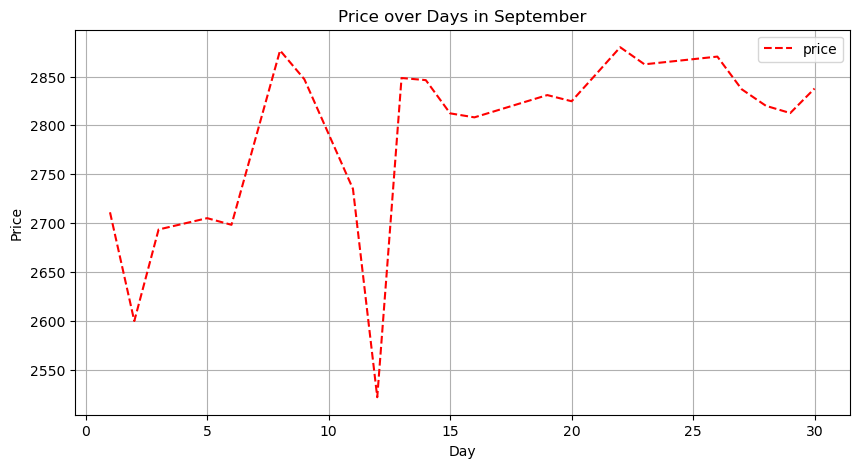

In [ ]:
ax = df_fil_sep.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in September')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

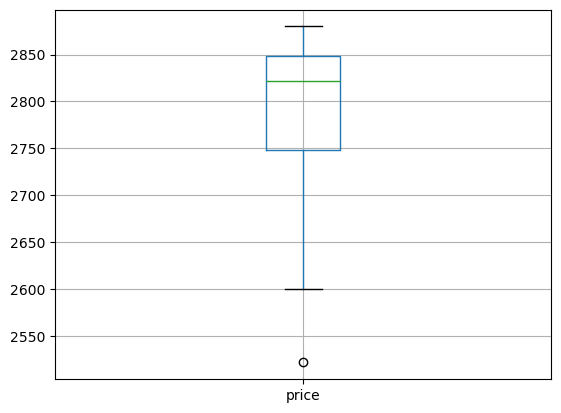

In [ ]:
import matplotlib.pyplot as plt
df_fil_sep.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-10-01'
end_date = '2016-10-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_oct = df_2016.loc[mask]

In [ ]:
df_fil_oct

date_cre        price  year  month  day
274 2016-10-01  2715.450000  2016     10    1
275 2016-10-02  2593.200000  2016     10    2
276 2016-10-03  2727.300000  2016     10    3
277 2016-10-04  2715.750000  2016     10    4
278 2016-10-05  2704.200000  2016     10    5
279 2016-10-06  2731.800000  2016     10    6
280 2016-10-07  2810.400000  2016     10    7
281 2016-10-08  2889.000000  2016     10    8
282 2016-10-09  2788.350000  2016     10    9
283 2016-10-10  2687.700000  2016     10   10
284 2016-10-11  2728.300000  2016     10   11
285 2016-10-12  2715.550000  2016     10   12
286 2016-10-13  2702.800000  2016     10   13
287 2016-10-14  2678.400000  2016     10   14
288 2016-10-15  2682.366667  2016     10   15
289 2016-10-16  2686.333333  2016     10   16
290 2016-10-17  2690.300000  2016     10   17
291 2016-10-18  2694.400000  2016     10   18
292 2016-10-19  2714.400000  2016     10   19
293 2016-10-20  2728.600000  2016     10   20
294 2016-10-21  2720.500000  2016     10   21
295 2016-10-22  2719.500000  2016     10   22
296 2016-10-23  2718.500000  2016     10   23
297 2016-10-24  2717.500000  2016     10   24
298 2016-10-25  2722.500000  2016     10   25
299 2016-10-26  2725.800000  2016     10   26
300 2016-10-27  2717.800000  2016     10   27
301 2016-10-28  2729.600000  2016     10   28
302 2016-10-29  2727.766667  2016     10   29
303 2016-10-30  2725.933333  2016     10   30
304 2016-10-31  2724.100000  2016     10   31

Text(0, 0.5, 'Price')

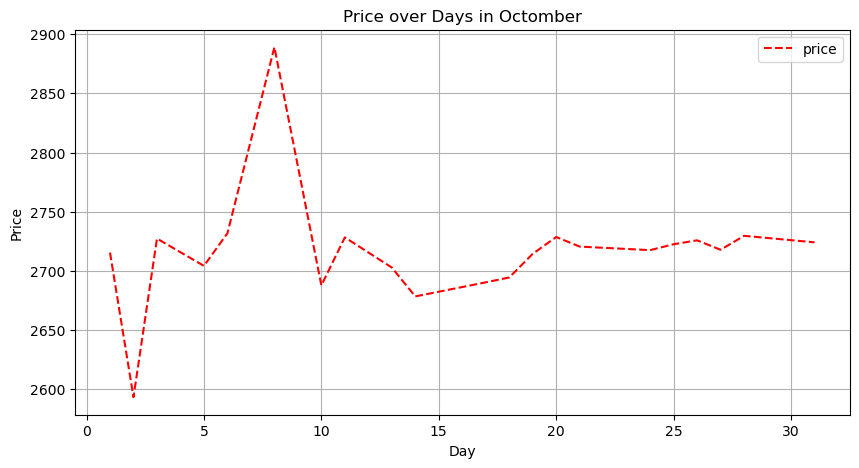

In [ ]:
ax = df_fil_oct.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in Octomber')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

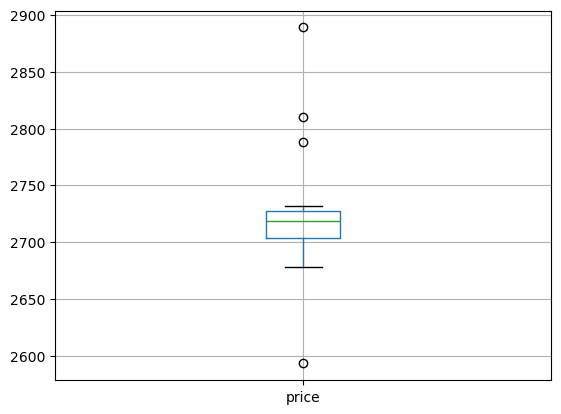

In [ ]:
import matplotlib.pyplot as plt
df_fil_oct.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-11-01'
end_date = '2016-11-30'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_nov = df_2016.loc[mask]

In [ ]:
df_fil_nov

date_cre        price  year  month  day
305 2016-11-01  2362.000000  2016     11    1
306 2016-11-02  2704.500000  2016     11    2
307 2016-11-03  2728.200000  2016     11    3
308 2016-11-04  2680.500000  2016     11    4
309 2016-11-05  2730.400000  2016     11    5
310 2016-11-06  2827.600000  2016     11    6
311 2016-11-07  2924.800000  2016     11    7
312 2016-11-08  2903.900000  2016     11    8
313 2016-11-09  2796.600000  2016     11    9
314 2016-11-10  2689.300000  2016     11   10
315 2016-11-11  2688.000000  2016     11   11
316 2016-11-12  2674.233333  2016     11   12
317 2016-11-13  2660.466667  2016     11   13
318 2016-11-14  2646.700000  2016     11   14
319 2016-11-15  2670.700000  2016     11   15
320 2016-11-16  2686.500000  2016     11   16
321 2016-11-17  2675.200000  2016     11   17
322 2016-11-18  2648.400000  2016     11   18
323 2016-11-19  2652.033333  2016     11   19
324 2016-11-20  2655.666667  2016     11   20
325 2016-11-21  2659.300000  2016     11   21
326 2016-11-22  2662.200000  2016     11   22
327 2016-11-23  2620.900000  2016     11   23
328 2016-11-24  2618.200000  2016     11   24
329 2016-11-25  2614.600000  2016     11   25
330 2016-11-26  2614.033333  2016     11   26
331 2016-11-27  2613.466667  2016     11   27
332 2016-11-28  2612.900000  2016     11   28
333 2016-11-29  2614.200000  2016     11   29
334 2016-11-30  2592.900000  2016     11   30

Text(0, 0.5, 'Price')

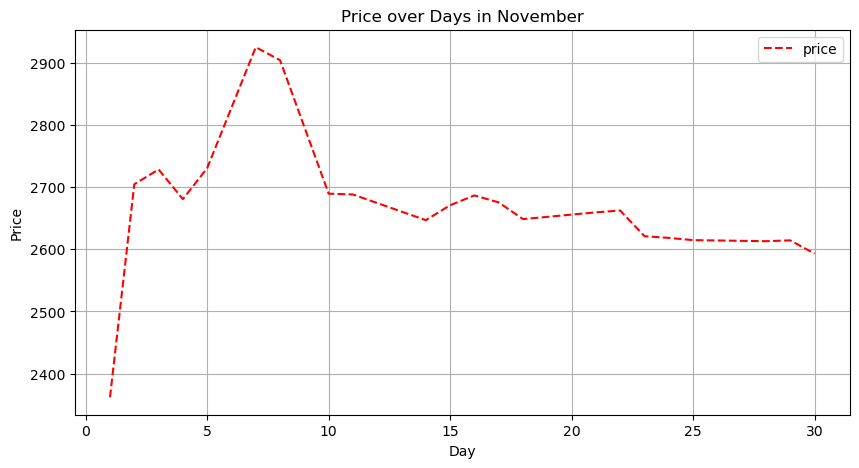

In [ ]:
ax = df_fil_nov.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in November')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

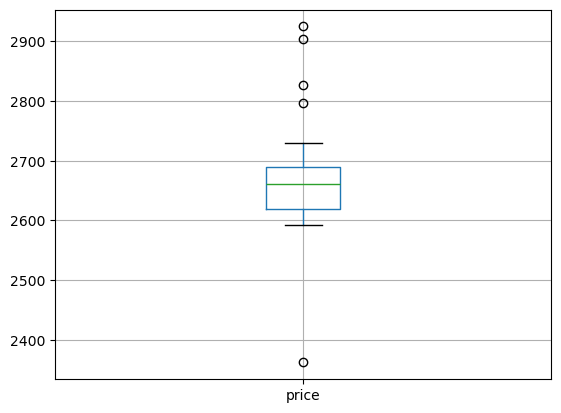

In [ ]:
import matplotlib.pyplot as plt
df_fil_nov.boxplot(column='price')

plt.show()

In [ ]:
import pandas as pd
start_date = '2016-12-01'
end_date = '2016-12-31'

mask = (df_2016['date_cre'] >= start_date) & (df_2016['date_cre'] <= end_date)
df_fil_dec = df_2016.loc[mask]

In [ ]:
df_fil_dec

date_cre        price  year  month  day
335 2016-12-01  2326.900000  2016     12    1
336 2016-12-02  2723.700000  2016     12    2
337 2016-12-03  2697.250000  2016     12    3
338 2016-12-04  2670.800000  2016     12    4
339 2016-12-05  2732.100000  2016     12    5
340 2016-12-06  2813.050000  2016     12    6
341 2016-12-07  2894.000000  2016     12    7
342 2016-12-08  2898.000000  2016     12    8
343 2016-12-09  2840.200000  2016     12    9
344 2016-12-10  2695.200000  2016     12   10
345 2016-12-11  2598.250000  2016     12   11
346 2016-12-12  2501.300000  2016     12   12
347 2016-12-13  2510.300000  2016     12   13
348 2016-12-14  2517.000000  2016     12   14
349 2016-12-15  2456.500000  2016     12   15
350 2016-12-16  2463.800000  2016     12   16
351 2016-12-17  2467.266667  2016     12   17
352 2016-12-18  2470.733333  2016     12   18
353 2016-12-19  2474.200000  2016     12   19
354 2016-12-20  2457.400000  2016     12   20
355 2016-12-21  2467.500000  2016     12   21
356 2016-12-22  2464.600000  2016     12   22
357 2016-12-23  2464.100000  2016     12   23
358 2016-12-24  2463.133333  2016     12   24
359 2016-12-25  2462.166667  2016     12   25
360 2016-12-26  2461.200000  2016     12   26
361 2016-12-27  2469.300000  2016     12   27
362 2016-12-28  2484.300000  2016     12   28
363 2016-12-29  2498.100000  2016     12   29
364 2016-12-30  2497.800000  2016     12   30
365 2016-12-31  2534.033333  2016     12   31

Text(0, 0.5, 'Price')

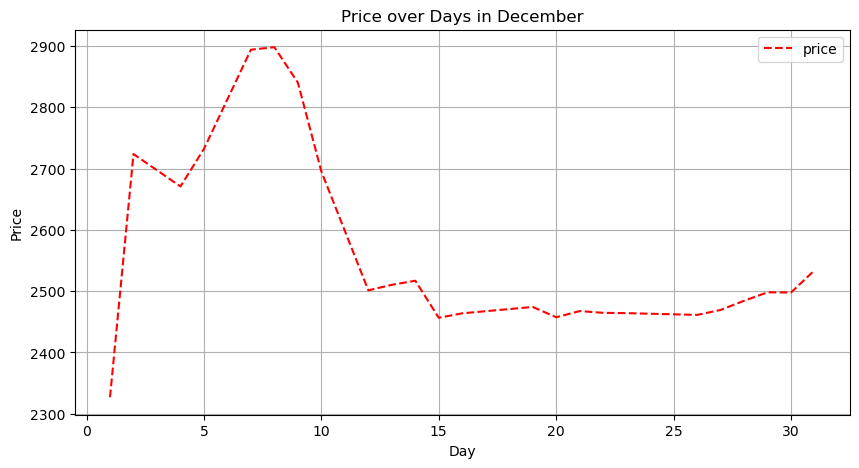

In [ ]:
ax = df_fil_dec.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over Days in December')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

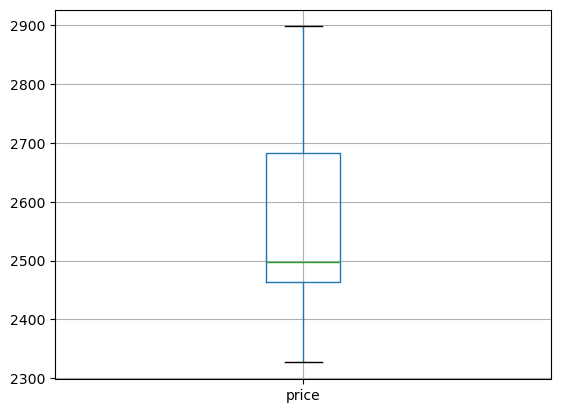

In [ ]:
import matplotlib.pyplot as plt
df_fil_dec.boxplot(column='price')

plt.show()

In [ ]:
## done the EDA part of year 2016

### 2017

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2017 = df[df['date_cre'].dt.year == 2017]

In [ ]:
df_2017.reset_index(inplace=True)

In [ ]:
df_2017

date_cre        price  year  month  day
0   2017-01-01  2570.266667  2017      1    1
1   2017-01-02  2606.500000  2017      1    2
2   2017-01-03  2658.800000  2017      1    3
3   2017-01-04  2635.600000  2017      1    4
4   2017-01-05  2612.400000  2017      1    5
..         ...          ...   ...    ...  ...
360 2017-12-27  2634.600000  2017     12   27
361 2017-12-28  2655.500000  2017     12   28
362 2017-12-29  2644.800000  2017     12   29
363 2017-12-30  2645.033333  2017     12   30
364 2017-12-31  2645.266667  2017     12   31

[365 rows x 5 columns]

In [ ]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 366 to 730
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date_cre  365 non-null    datetime64[ns]
 1   price     365 non-null    float64       
 2   year      365 non-null    int32         
 3   month     365 non-null    int32         
 4   day       365 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 12.8 KB


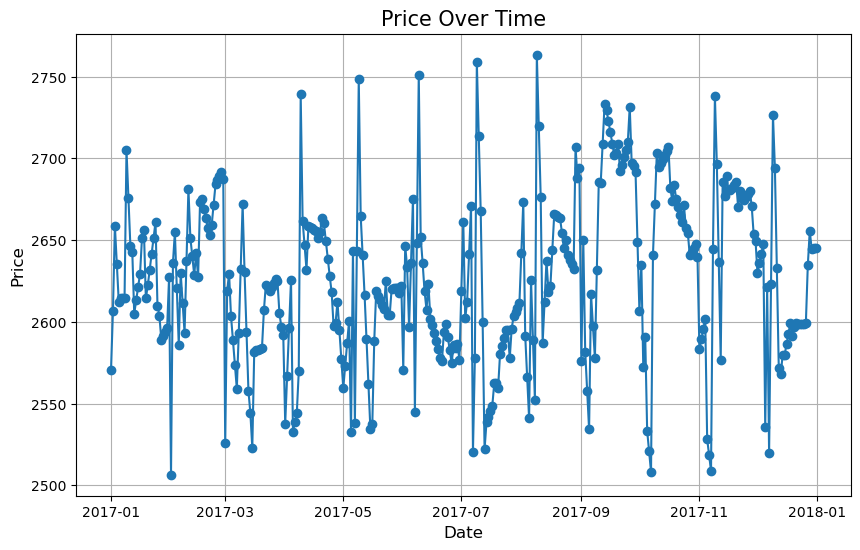

In [ ]:
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot_date(df_2017['date_cre'], df_2017['price'], linestyle='solid')

# Set the title and labels
plt.title('Price Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show grid
plt.grid(True)

# Show the plot
plt.show()

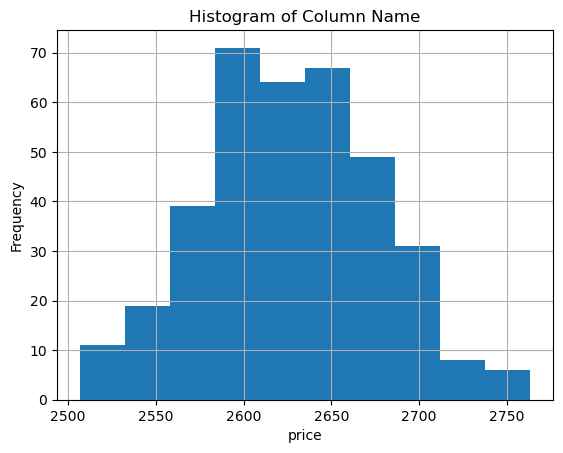

In [ ]:
df_2017['price'].hist(bins=10)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name')
plt.show()

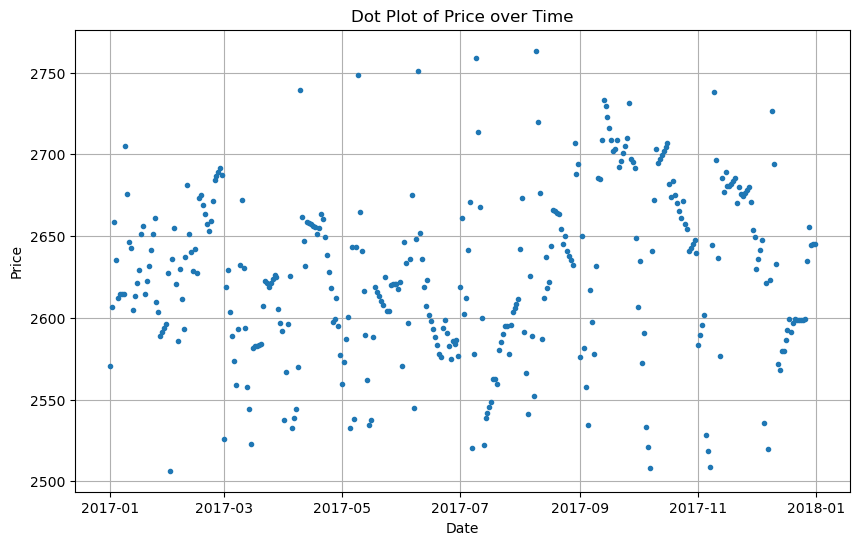

In [ ]:
# Assuming 'df' is your DataFrame and 'date' and 'price' are your columns
plt.figure(figsize=(10,6))
plt.plot_date(df_2017['date_cre'], df_2017['price'], linestyle='none', marker='o', markersize=3)
plt.title('Dot Plot of Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

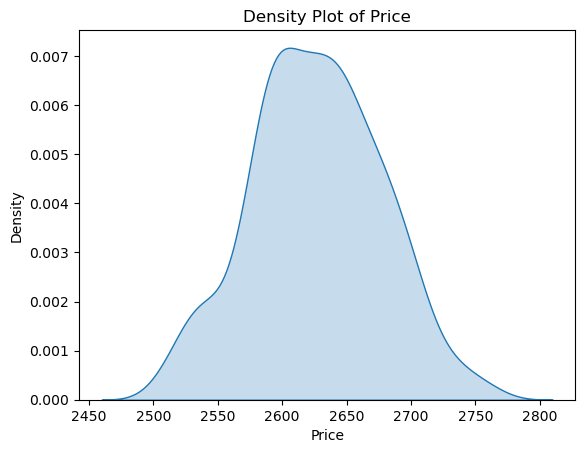

In [ ]:
# Assuming 'df' is your DataFrame and 'price' is your column
sns.kdeplot(df_2017['price'], shade=True, fill=True)
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

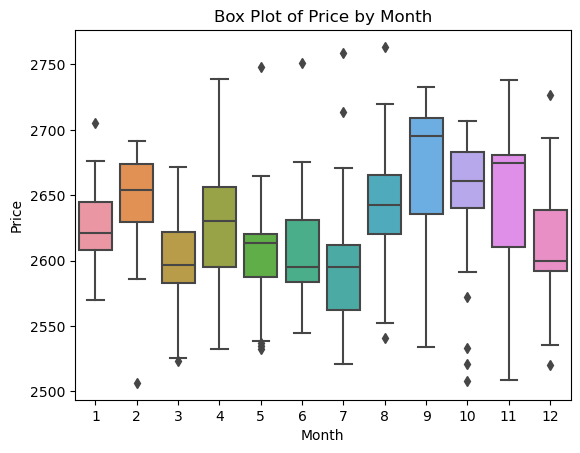

In [ ]:
sns.boxplot(data=df, x=df_2017['date_cre'].dt.month, y='price')
plt.title('Box Plot of Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

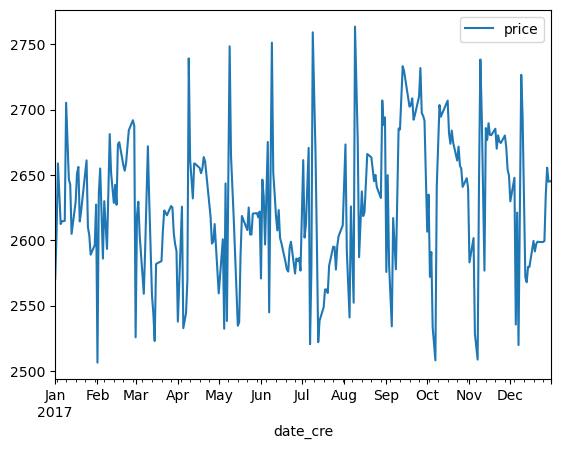

In [ ]:
import matplotlib.pyplot as plt
df_2017.plot(kind='line', x='date_cre', y='price')

plt.show()

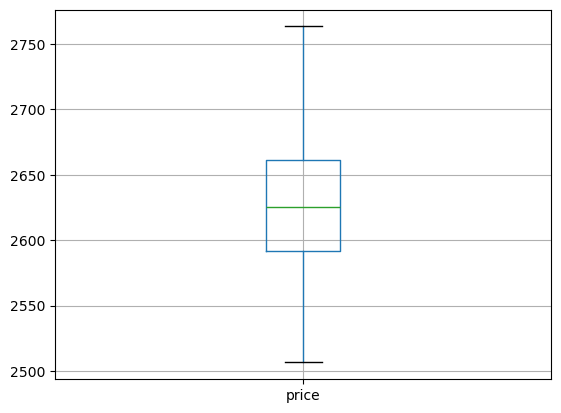

In [ ]:
import matplotlib.pyplot as plt
df_2017.boxplot(column='price')

plt.show()

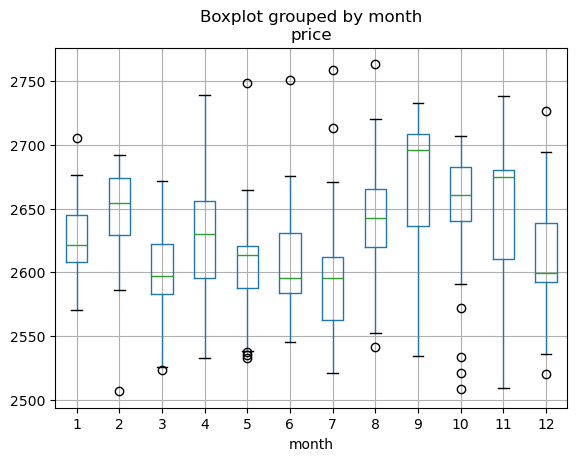

In [ ]:
df_2017['month'] = df_2017['date_cre'].dt.month

# create a box plot for each month
df_2017.boxplot(column='price', by='month')

plt.show()

Text(0, 0.5, 'Price')

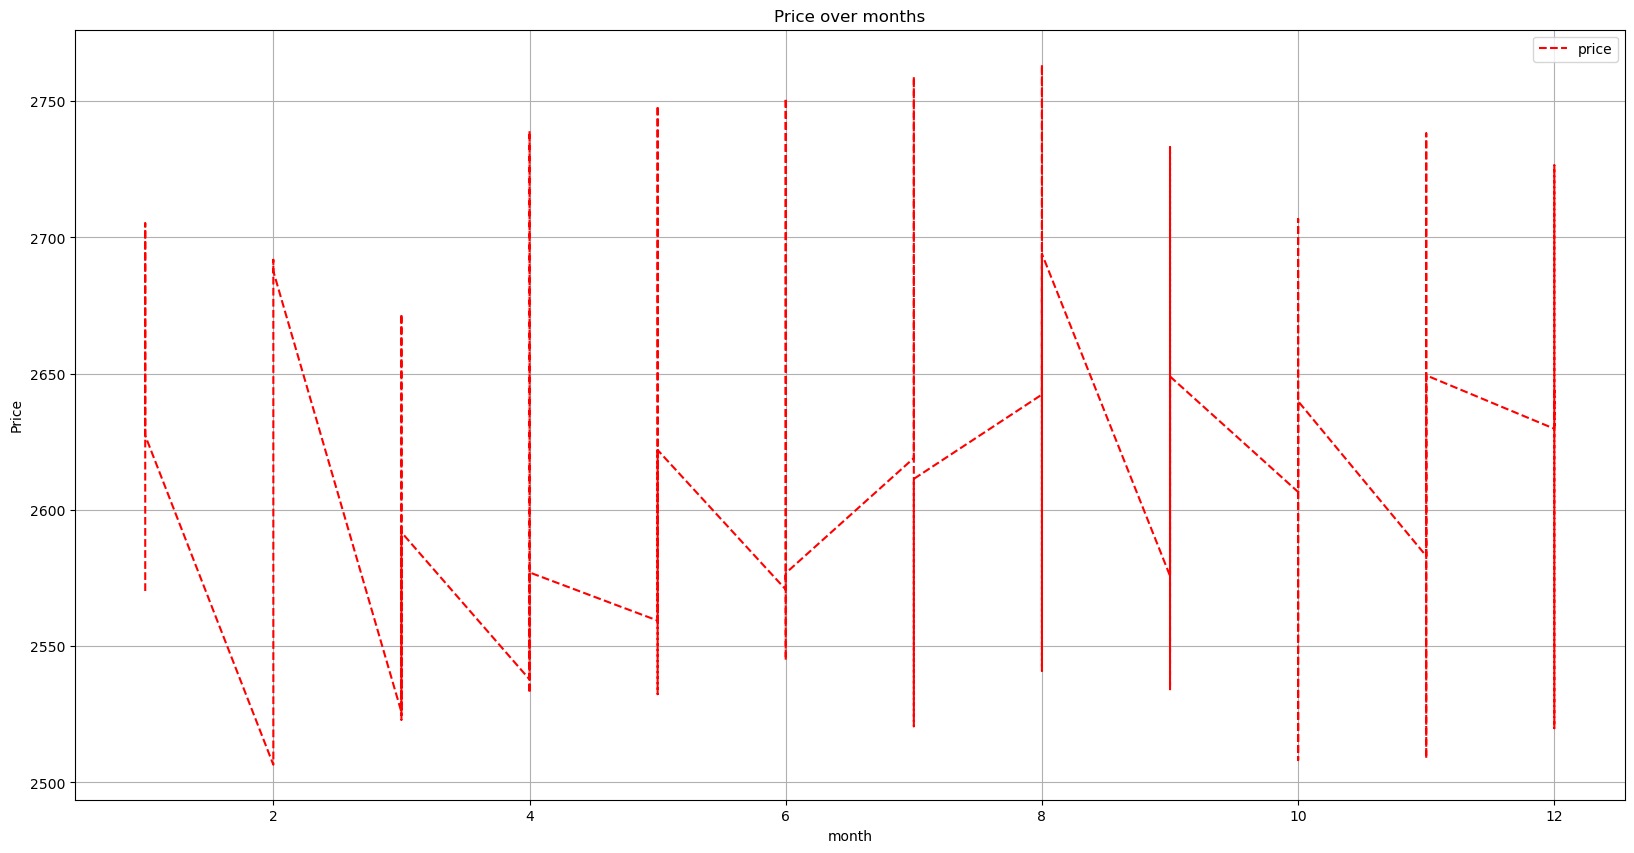

In [ ]:
ax = df_2017.plot(kind='line', x='month', y='price', figsize=(20, 10), color='red', linestyle='--')
ax.grid(True)
ax.set_title('Price over months')
ax.set_xlabel('month')
ax.set_ylabel('Price')

In [ ]:
df_2017_dup = df_2017

In [ ]:
df_2017.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2017['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  1080.3936607549858


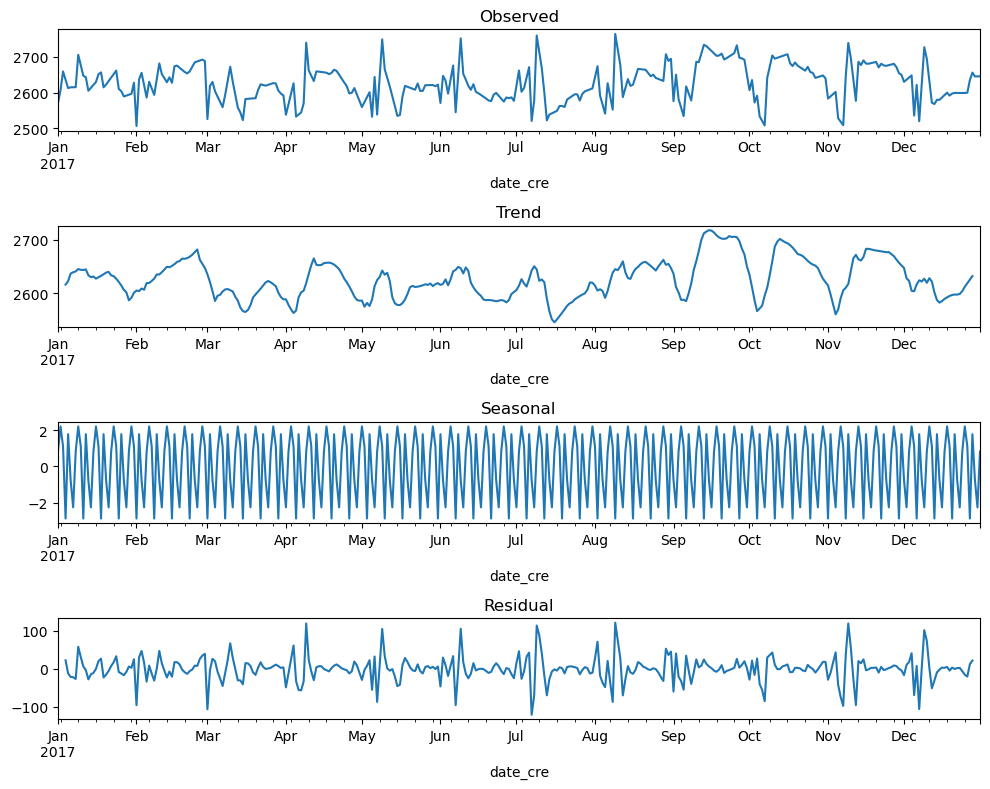

In [ ]:
df_2017_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2017_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily - 2017

In [ ]:
def monthly_describe(df, year):
    # Create a 'month' column
    df_2017['month'] = pd.DatetimeIndex(df_2017['date_cre']).month

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2017['year'] == year) & (df_2017['month'] == month)
        df_month = df_2017.loc[mask]

        # Print month name
        print(f"\n{month_dict[month]}:")

        # Generate descriptive statistics
        print(df_month.describe())

# Call the function
monthly_describe(df_2017, 2017)



January:
                  date_cre        price    year  month        day
count                   31    31.000000    31.0   31.0  31.000000
mean   2017-01-16 00:00:00  2626.077957  2017.0    1.0  16.000000
min    2017-01-01 00:00:00  2570.266667  2017.0    1.0   1.000000
25%    2017-01-08 12:00:00  2608.250000  2017.0    1.0   8.500000
50%    2017-01-16 00:00:00  2621.233333  2017.0    1.0  16.000000
75%    2017-01-23 12:00:00  2644.700000  2017.0    1.0  23.500000
max    2017-01-31 00:00:00  2705.200000  2017.0    1.0  31.000000
std                    NaN    28.524585     0.0    0.0   9.092121

February:
                  date_cre        price    year  month        day
count                   28    28.000000    28.0   28.0  28.000000
mean   2017-02-14 12:00:00  2646.730357  2017.0    2.0  14.500000
min    2017-02-01 00:00:00  2506.500000  2017.0    2.0   1.000000
25%    2017-02-07 18:00:00  2629.575000  2017.0    2.0   7.750000
50%    2017-02-14 12:00:00  2654.050000  2017.0    2.0 

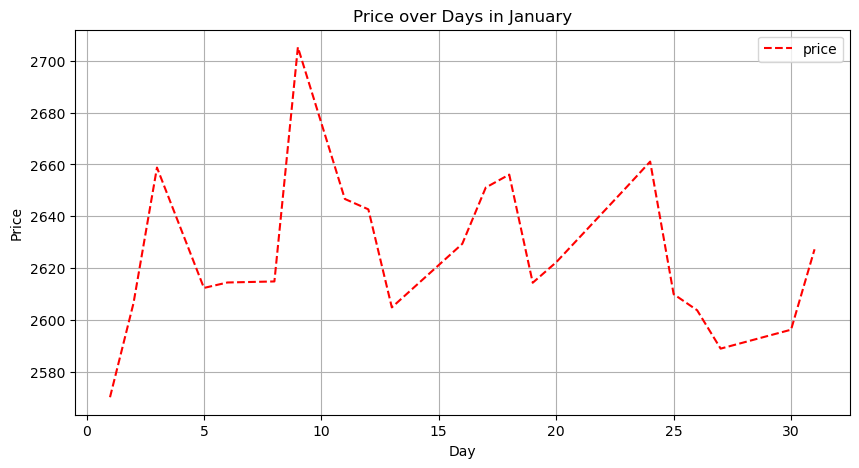

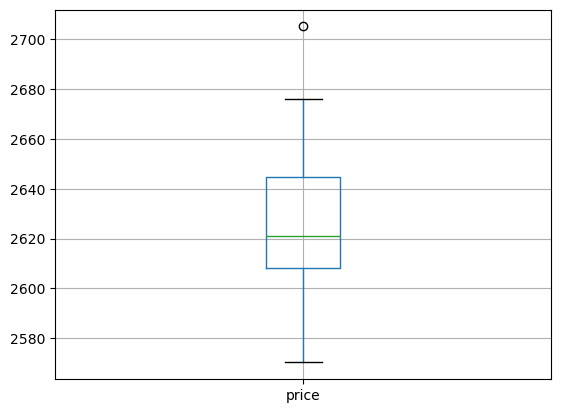

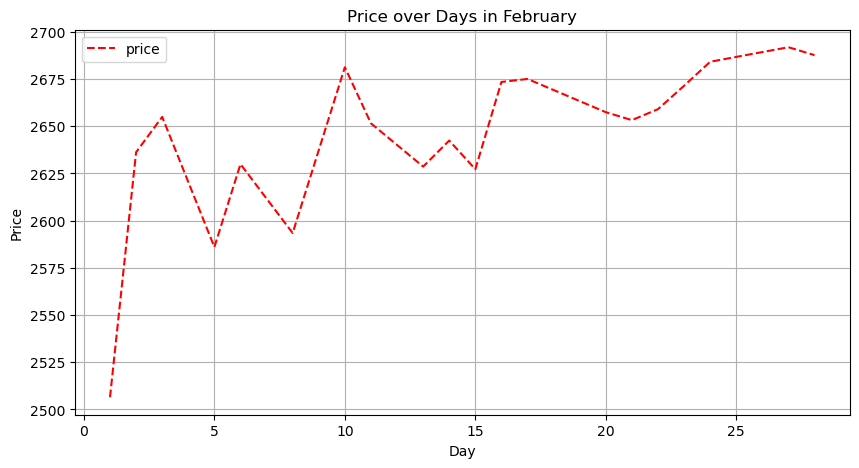

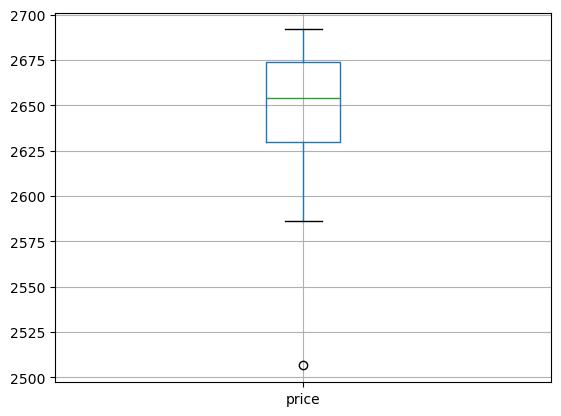

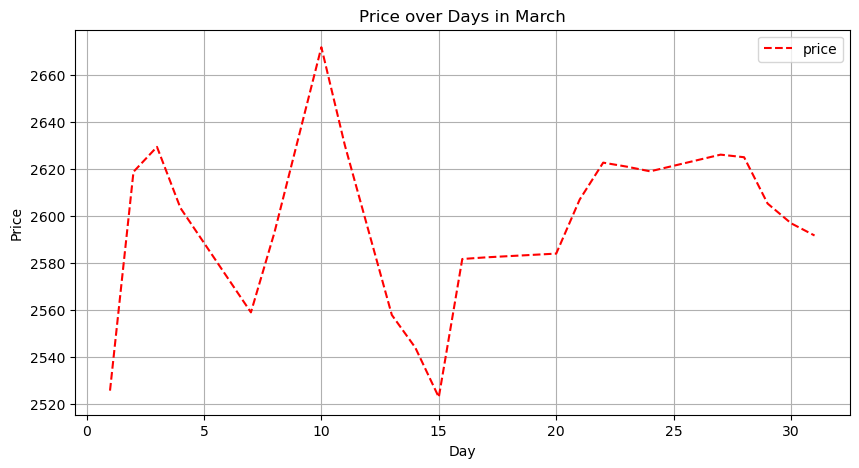

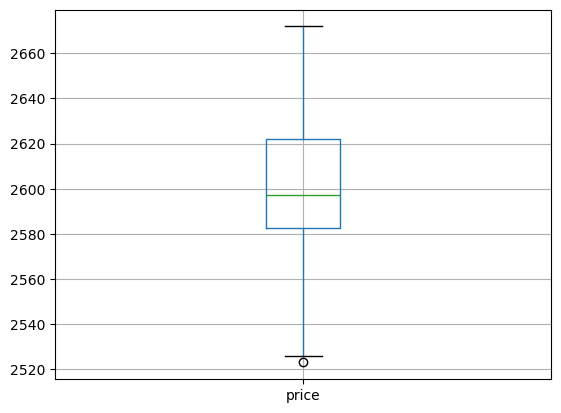

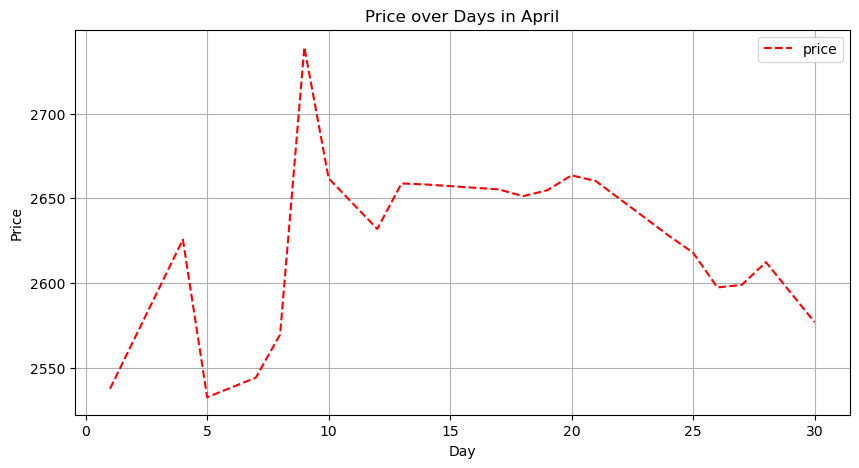

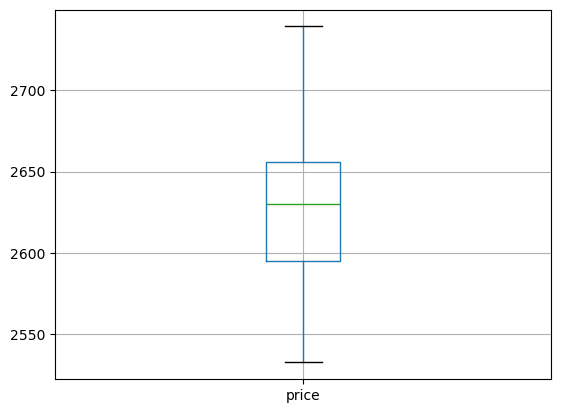

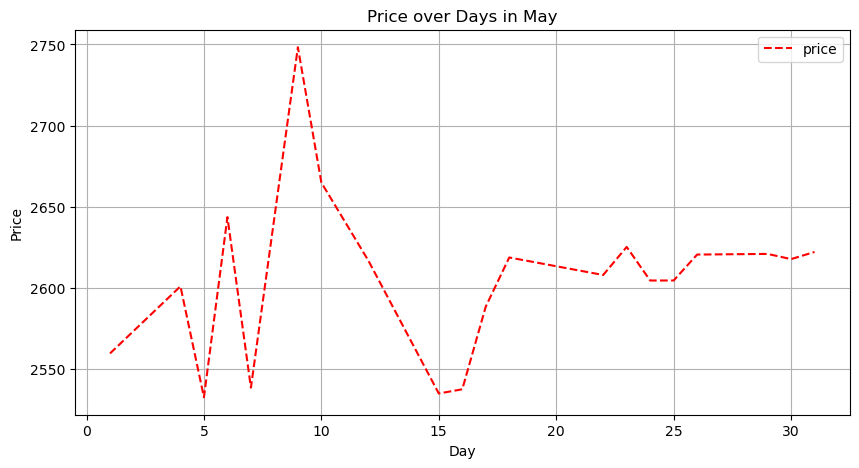

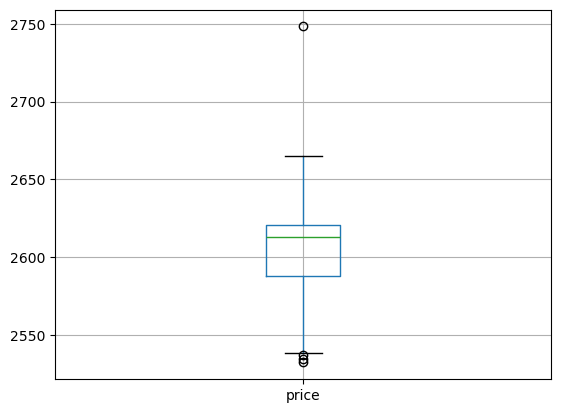

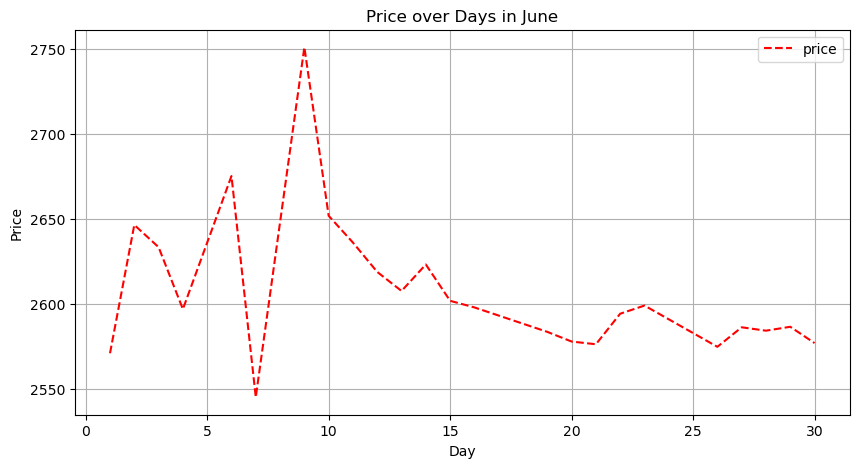

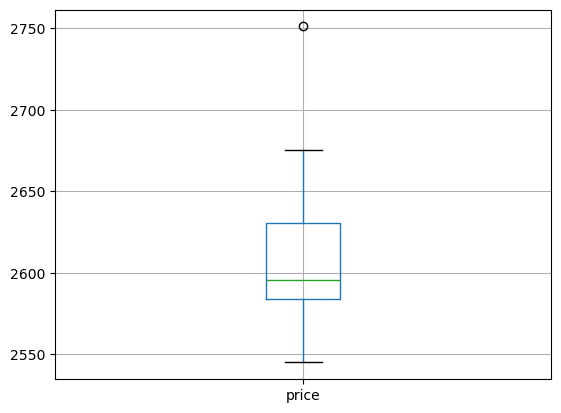

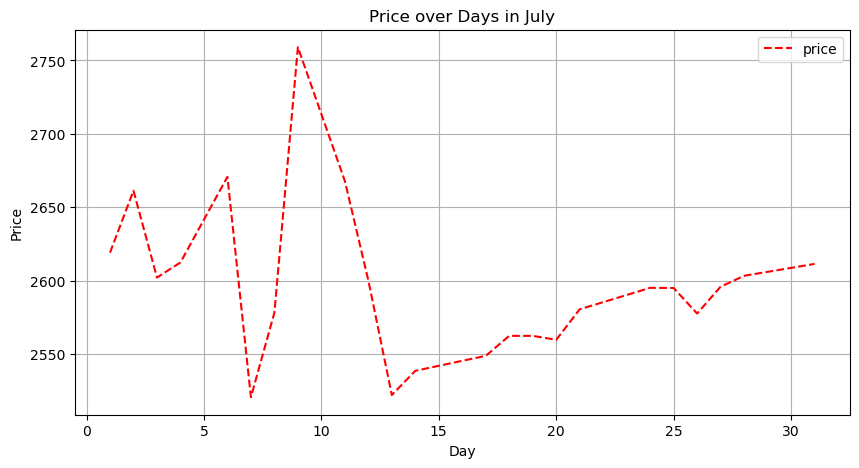

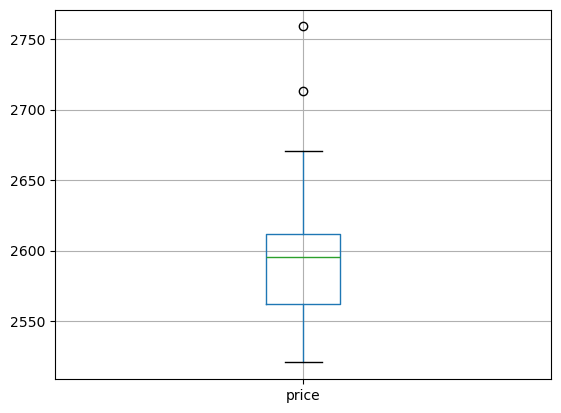

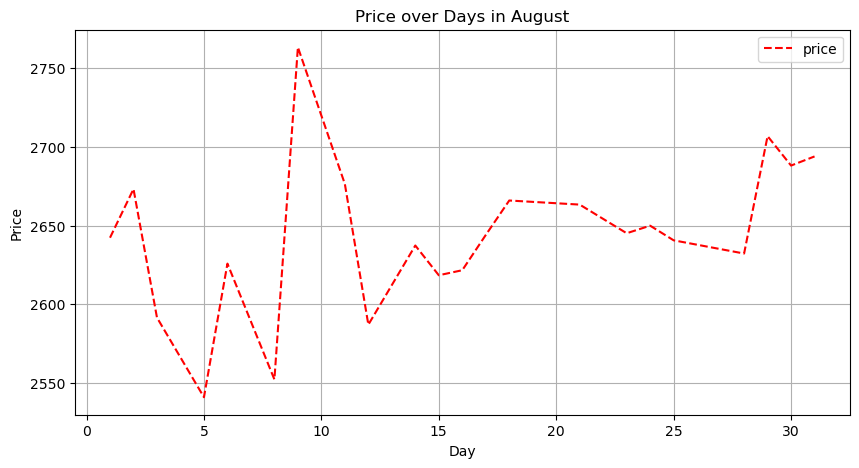

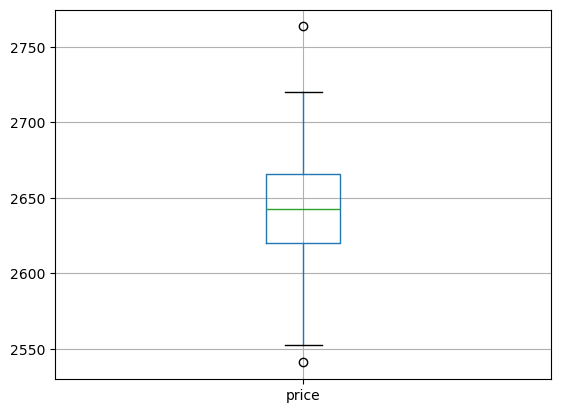

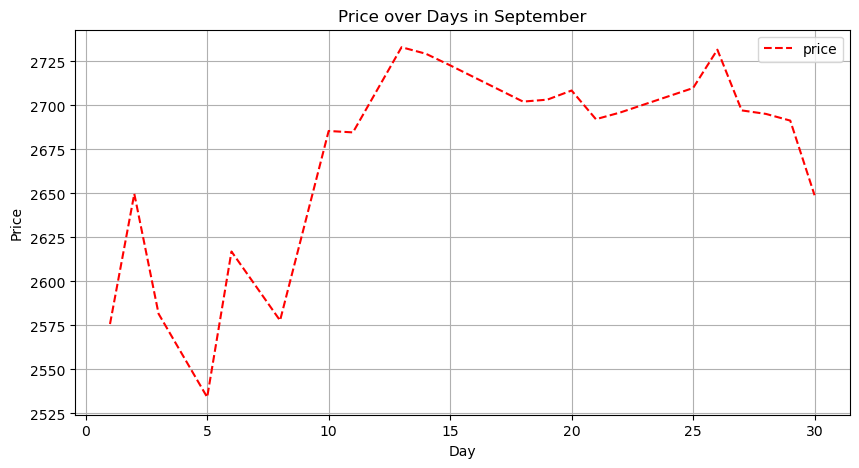

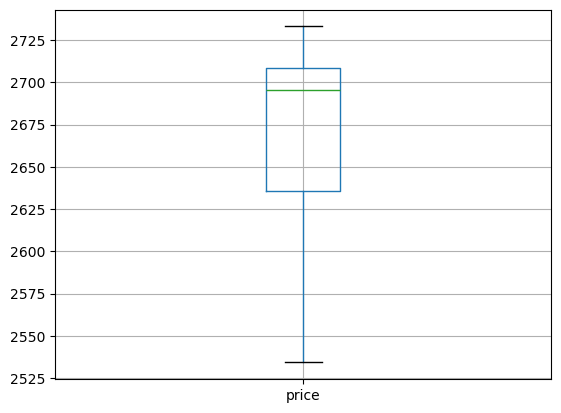

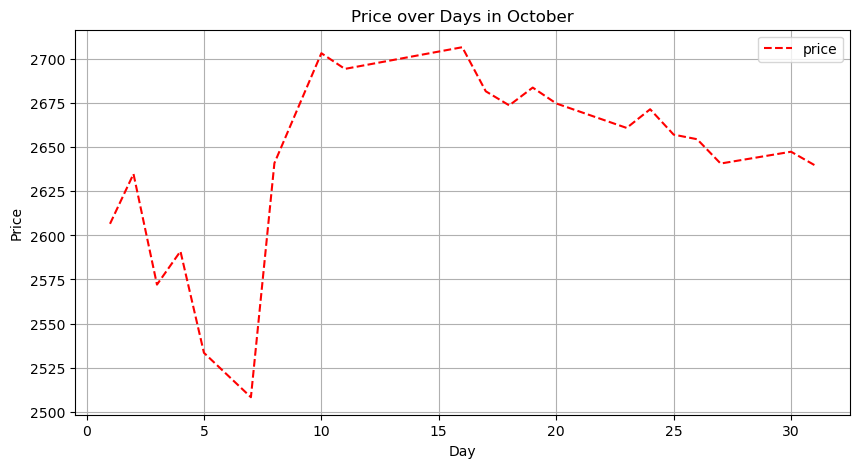

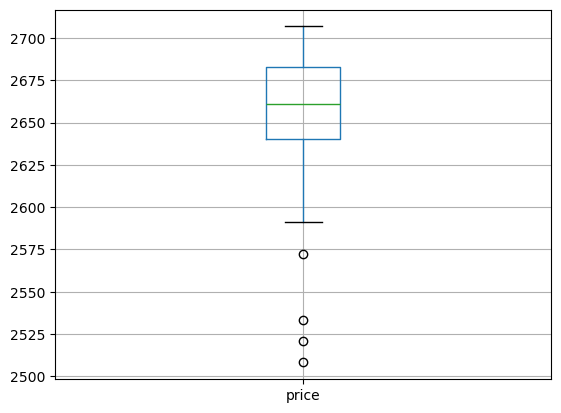

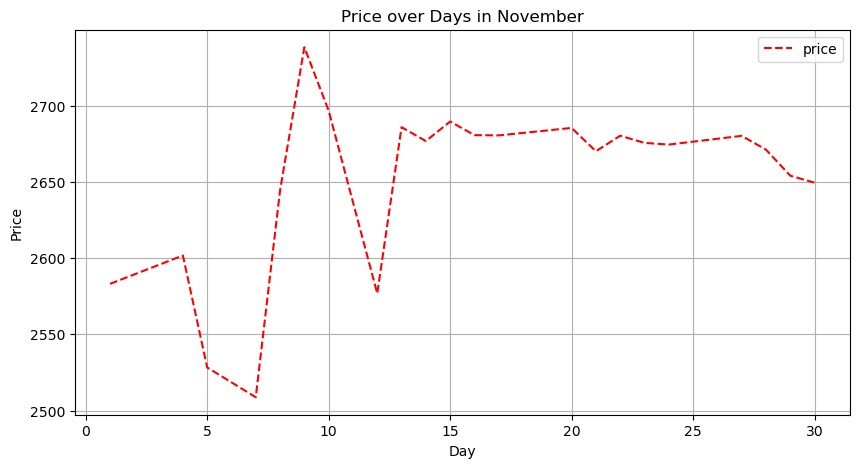

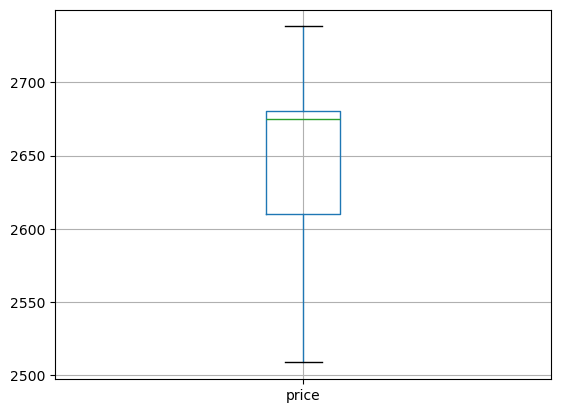

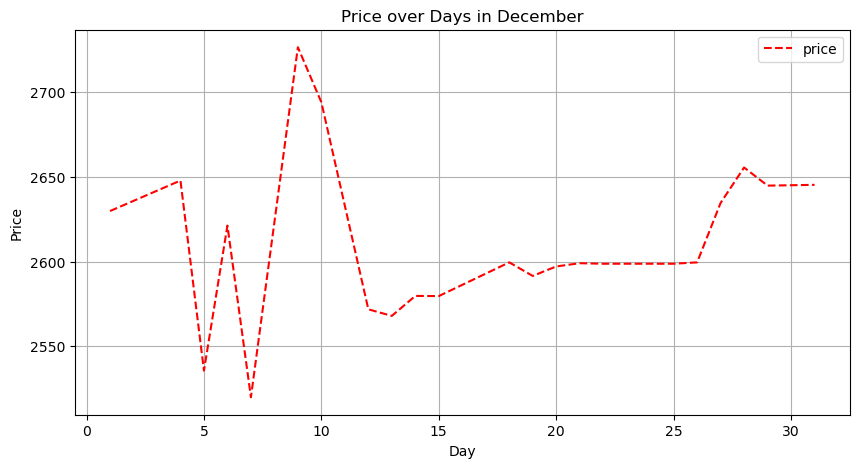

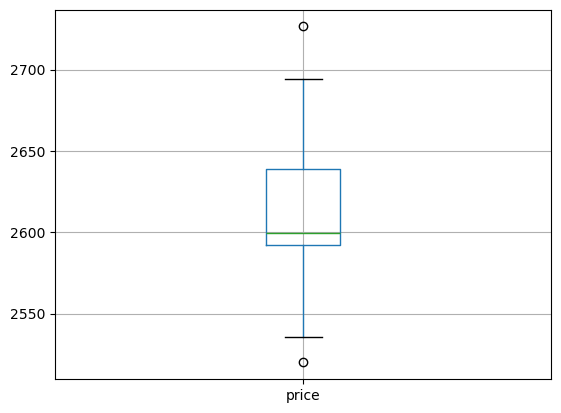

In [ ]:
def plot_monthly_price(df, year):
    # Create a 'month' column
    df_2017['month'] = pd.DatetimeIndex(df_2017['date_cre']).month
    df_2017['day'] = pd.DatetimeIndex(df_2017['date_cre']).day

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2017['year'] == year) & (df_2017['month'] == month)
        df_month = df_2017.loc[mask]

        # Plot data
        ax = df_month.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
        ax.grid(True)
        ax.set_title(f'Price over Days in {month_dict[month]}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Price')
        plt.show()

        # Boxplot for the 'price' column
        df_month.boxplot(column='price')
        plt.show()

# Call the function
plot_monthly_price(df_2017, 2017)


### 2018

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2018 = df[df['date_cre'].dt.year == 2018]

In [ ]:
df_2018

date_cre   price  year  month  day
731  2018-01-01  2645.5  2018      1    1
732  2018-01-02  2754.1  2018      1    2
733  2018-01-03  2739.7  2018      1    3
734  2018-01-04  2767.8  2018      1    4
735  2018-01-05  2795.9  2018      1    5
...         ...     ...   ...    ...  ...
1091 2018-12-27  2871.5  2018     12   27
1092 2018-12-28  2869.0  2018     12   28
1093 2018-12-29  2869.0  2018     12   29
1094 2018-12-30  2869.0  2018     12   30
1095 2018-12-31  2859.1  2018     12   31

[365 rows x 5 columns]

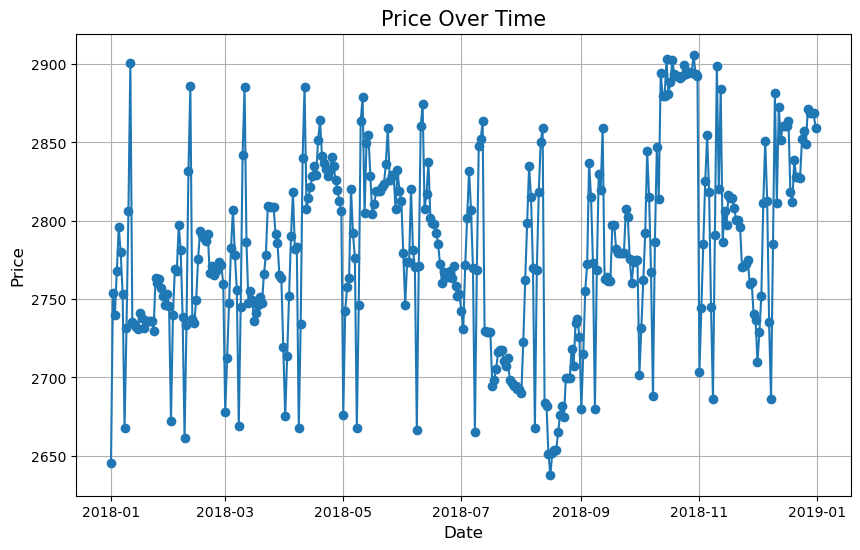

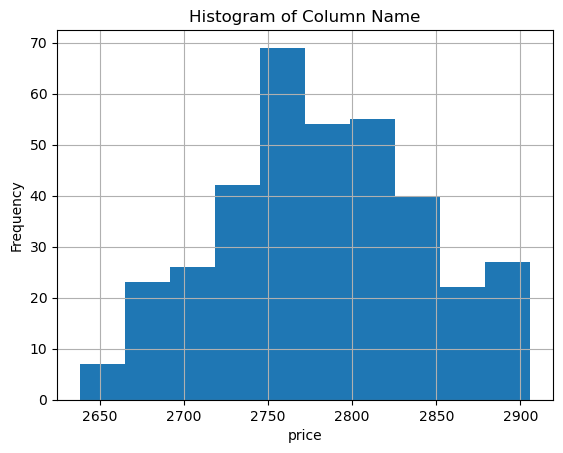

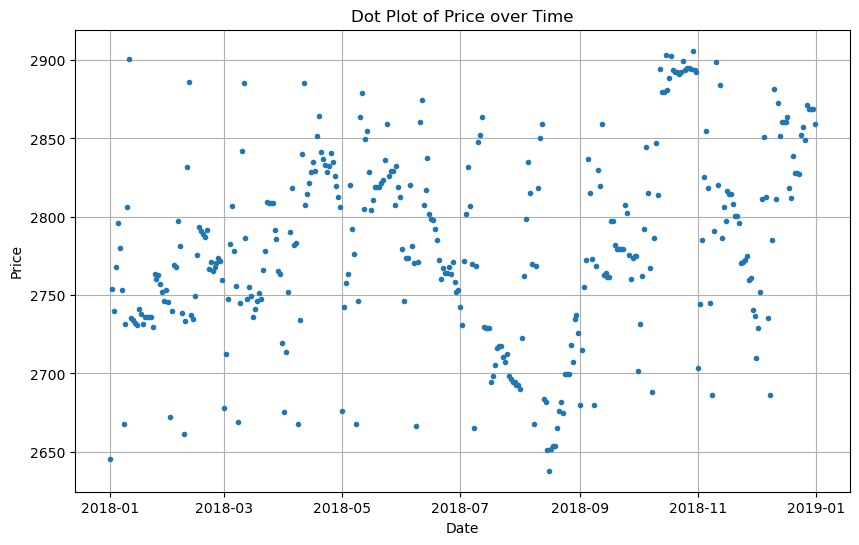

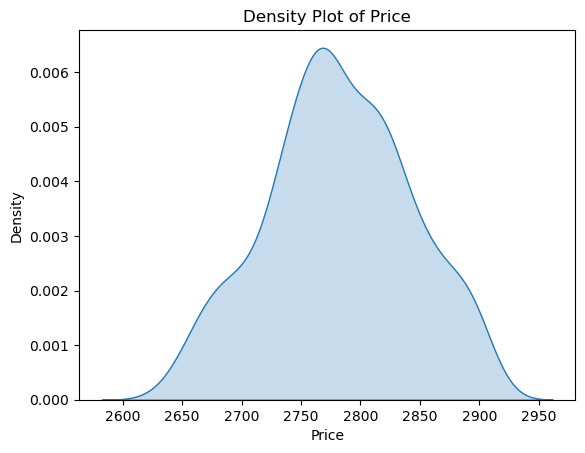

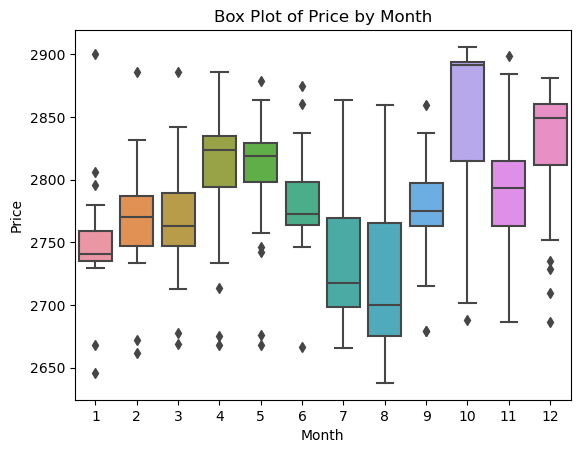

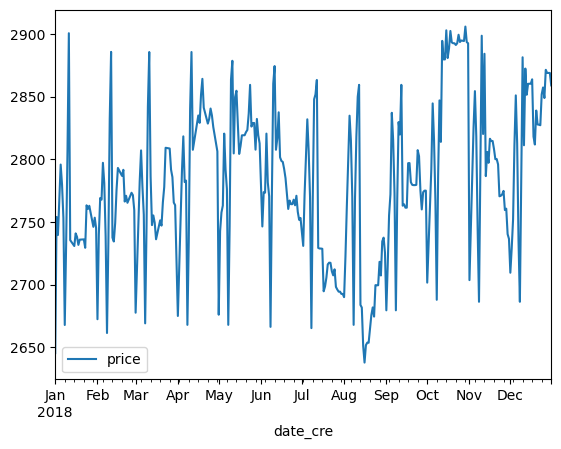

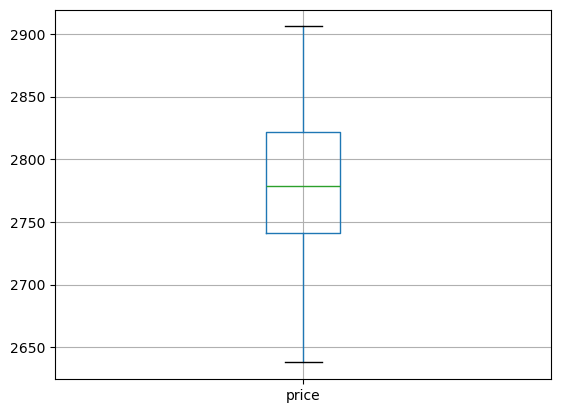

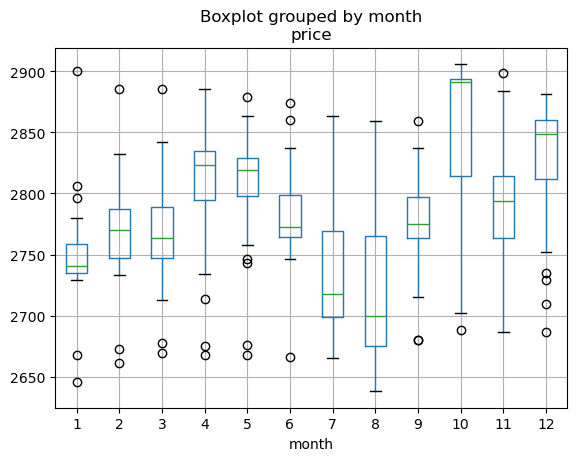

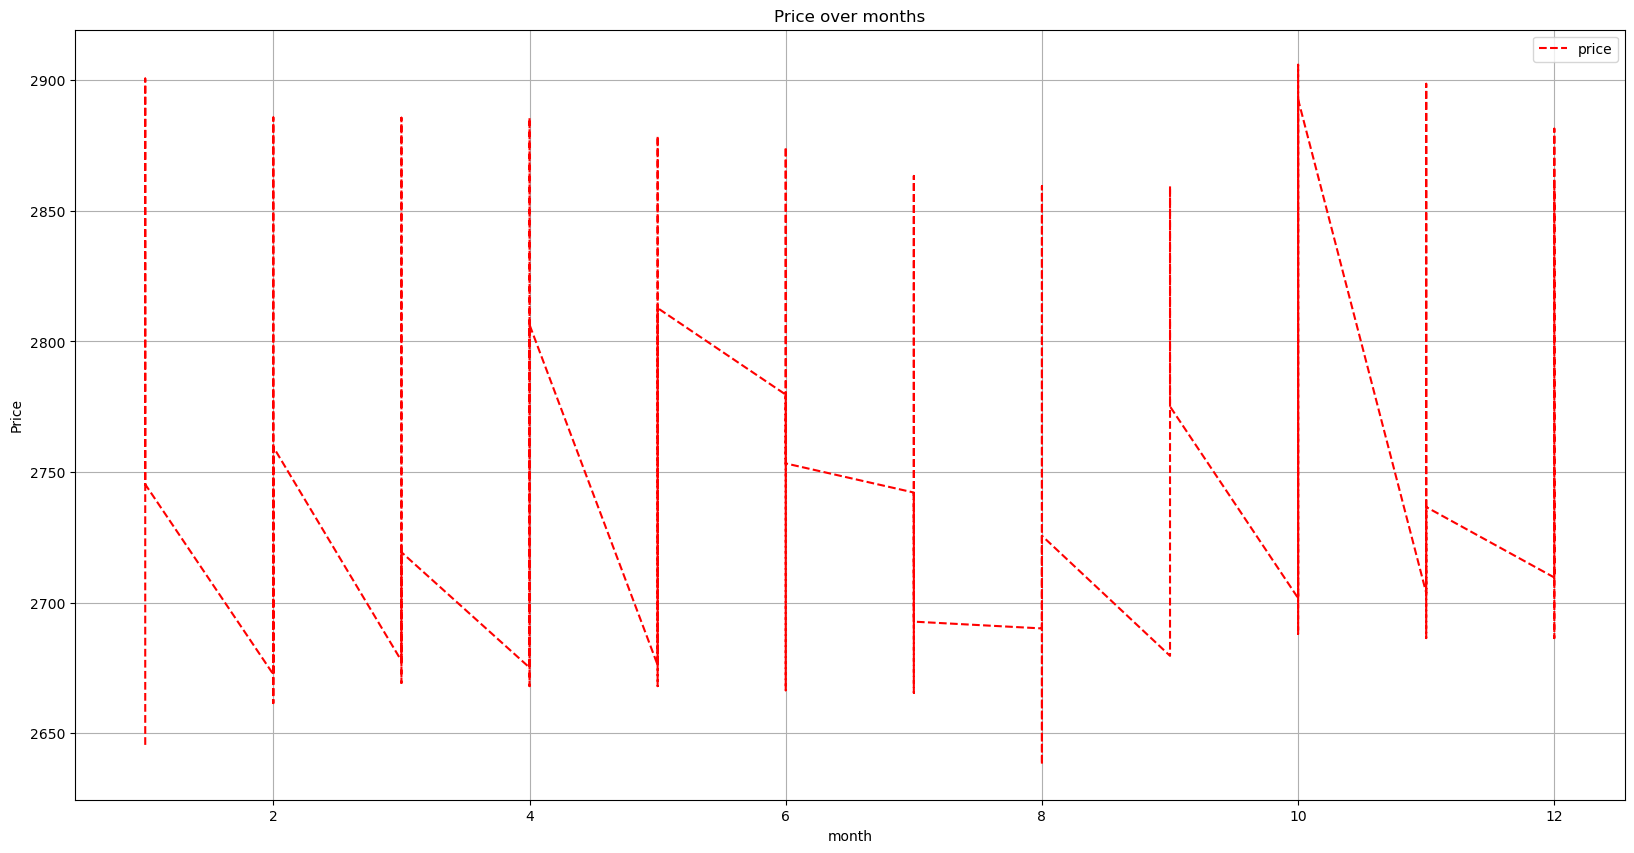

In [ ]:
def plot_all(df, date_col, price_col):
    # Line plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2018[date_col], df_2018[price_col], linestyle='solid')
    plt.title('Price Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

    # Histogram
    df_2018[price_col].hist(bins=10)
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Column Name')
    plt.show()

    # Dot plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2018[date_col], df_2018[price_col], linestyle='none', marker='o', markersize=3)
    plt.title('Dot Plot of Price over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Density plot
    sns.kdeplot(df_2018[price_col], shade=True, fill=True)
    plt.title('Density Plot of Price')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.show()

    # Box plot by month
    df_2018['month'] = df_2018[date_col].dt.month
    sns.boxplot(data=df_2018, x='month', y=price_col)
    plt.title('Box Plot of Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.show()

    # Line plot using pandas
    df_2018.plot(kind='line', x=date_col, y=price_col)
    plt.show()

    # Box plot using pandas
    df_2018.boxplot(column=price_col)
    plt.show()

    # Box plot by month using pandas
    df_2018.boxplot(column=price_col, by='month')
    plt.show()

    # Line plot with custom settings
    ax = df_2018.plot(kind='line', x='month', y=price_col, figsize=(20, 10), color='red', linestyle='--')
    ax.grid(True)
    ax.set_title('Price over months')
    ax.set_xlabel('month')
    ax.set_ylabel('Price')

# Call the function with your DataFrame and column names
plot_all(df_2018, 'date_cre', 'price')


In [ ]:
df_2018.reset_index(inplace=True)

In [ ]:
df_2018

date_cre   price  year  month  day
0   2018-01-01  2645.5  2018      1    1
1   2018-01-02  2754.1  2018      1    2
2   2018-01-03  2739.7  2018      1    3
3   2018-01-04  2767.8  2018      1    4
4   2018-01-05  2795.9  2018      1    5
..         ...     ...   ...    ...  ...
360 2018-12-27  2871.5  2018     12   27
361 2018-12-28  2869.0  2018     12   28
362 2018-12-29  2869.0  2018     12   29
363 2018-12-30  2869.0  2018     12   30
364 2018-12-31  2859.1  2018     12   31

[365 rows x 5 columns]

In [ ]:
df_2018_dup = df_2018

In [ ]:
df_2018.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2018['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  1449.4835317154862


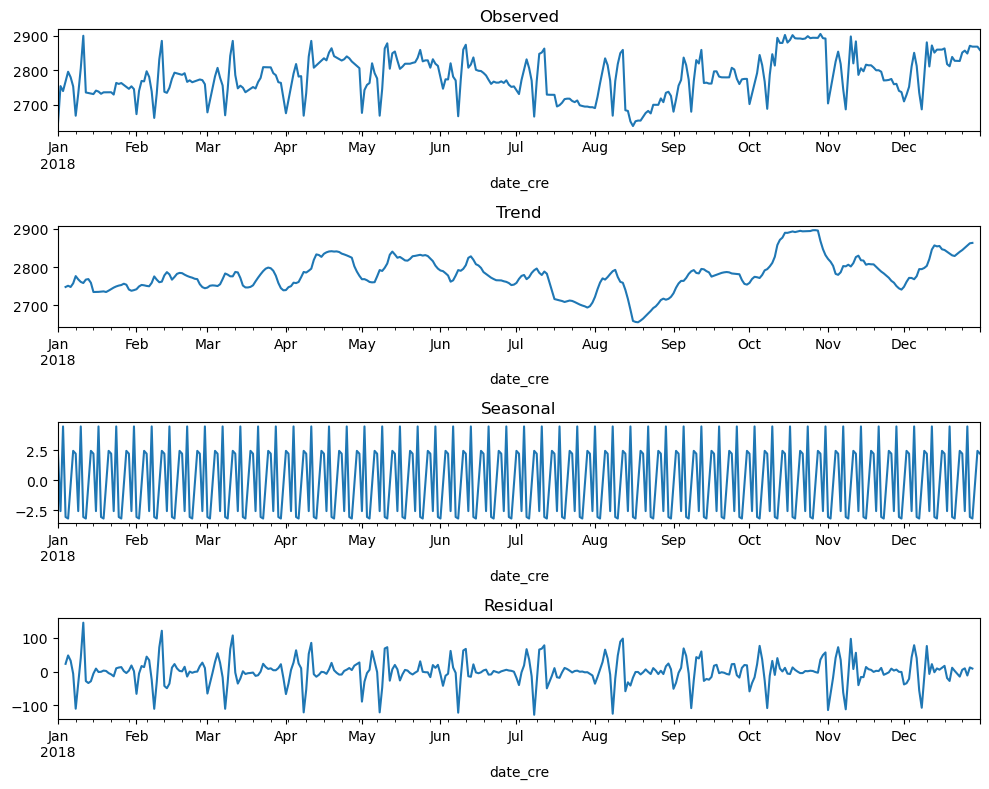

In [ ]:
df_2018_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2018_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily - 2018

In [ ]:
def monthly_describe(df, year):
    # Create a 'month' column
    df_2018['month'] = pd.DatetimeIndex(df_2018['date_cre']).month

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2018['year'] == year) & (df_2018['month'] == month)
        df_month = df_2018.loc[mask]

        # Print month name
        print(f"\n{month_dict[month]}:")

        # Generate descriptive statistics
        print(df_month.describe())

# Call the function
monthly_describe(df_2018, 2018)



January:
                  date_cre        price    year  month        day
count                   31    31.000000    31.0   31.0  31.000000
mean   2018-01-16 00:00:00  2748.438710  2018.0    1.0  16.000000
min    2018-01-01 00:00:00  2645.500000  2018.0    1.0   1.000000
25%    2018-01-08 12:00:00  2734.816666  2018.0    1.0   8.500000
50%    2018-01-16 00:00:00  2741.000000  2018.0    1.0  16.000000
75%    2018-01-23 12:00:00  2758.950000  2018.0    1.0  23.500000
max    2018-01-31 00:00:00  2900.700000  2018.0    1.0  31.000000
std                    NaN    41.099002     0.0    0.0   9.092121

February:
                  date_cre        price    year  month        day
count                   28    28.000000    28.0   28.0  28.000000
mean   2018-02-14 12:00:00  2766.942857  2018.0    2.0  14.500000
min    2018-02-01 00:00:00  2661.500000  2018.0    2.0   1.000000
25%    2018-02-07 18:00:00  2747.000000  2018.0    2.0   7.750000
50%    2018-02-14 12:00:00  2769.966666  2018.0    2.0 

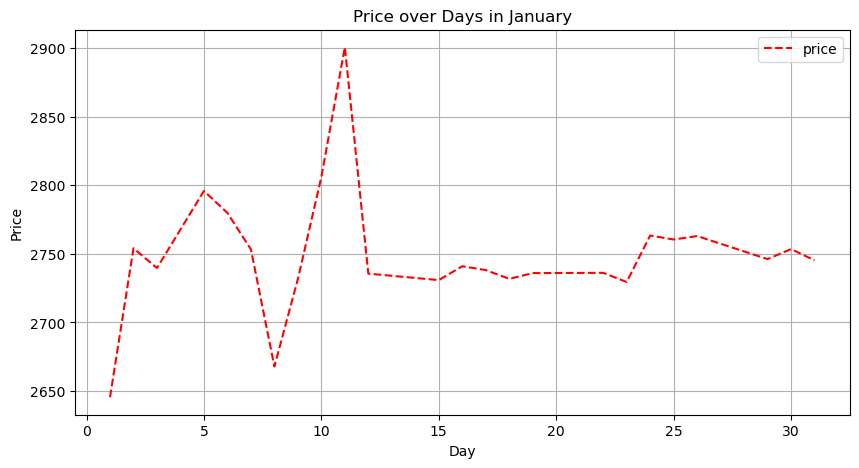

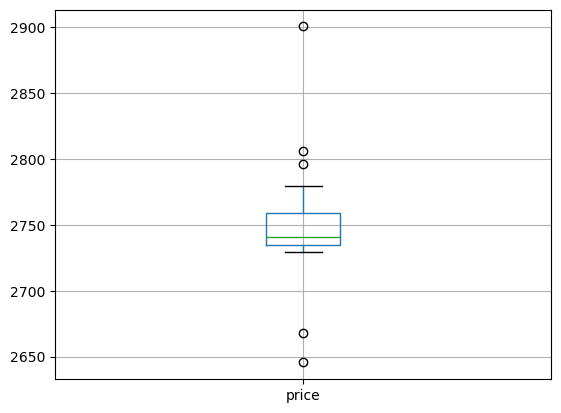

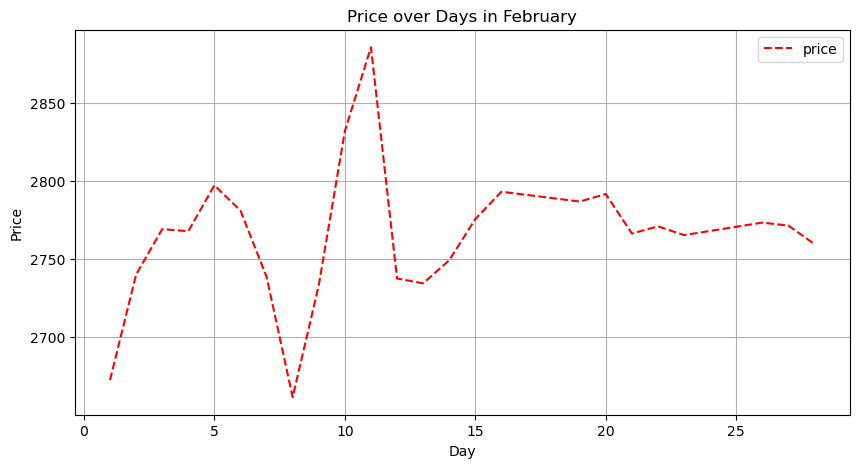

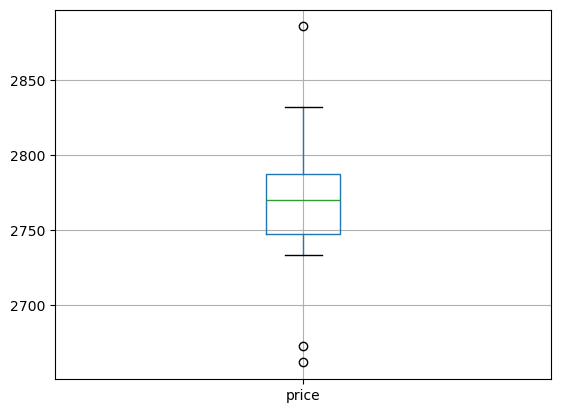

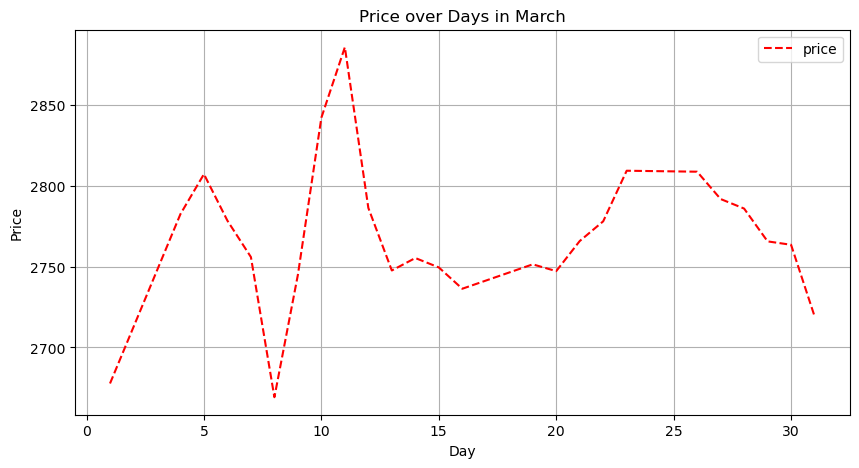

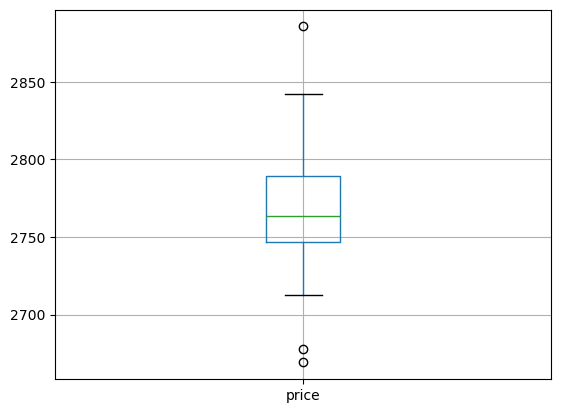

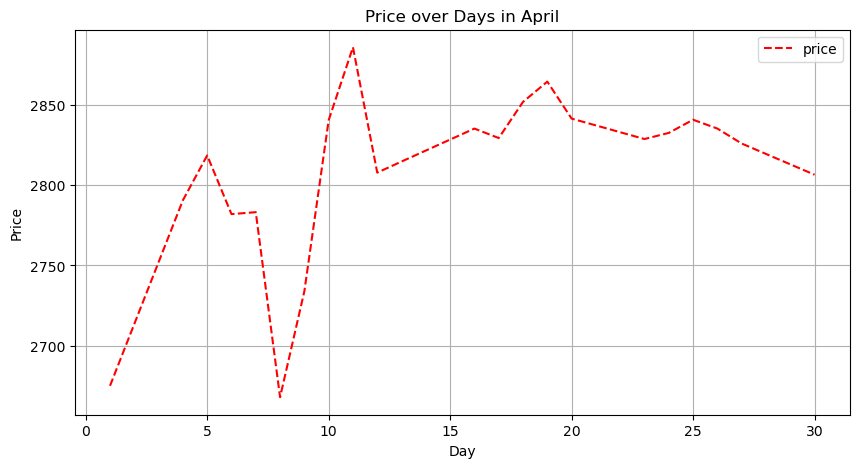

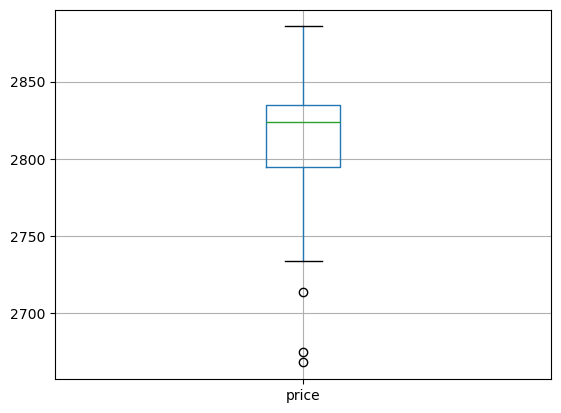

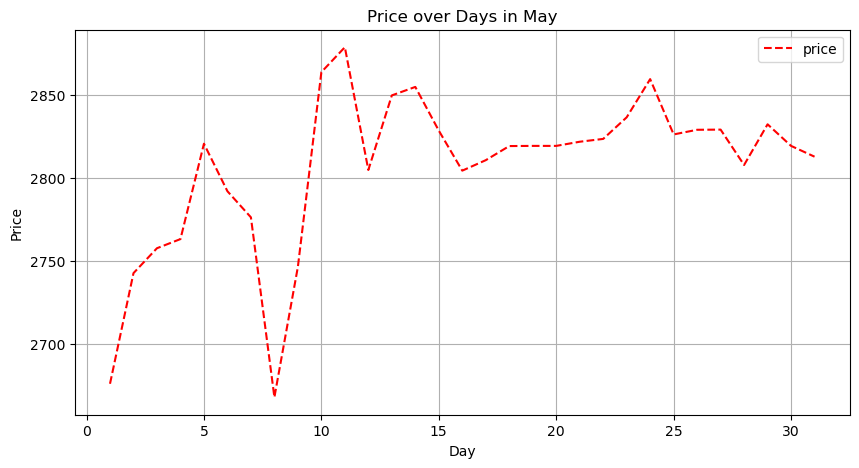

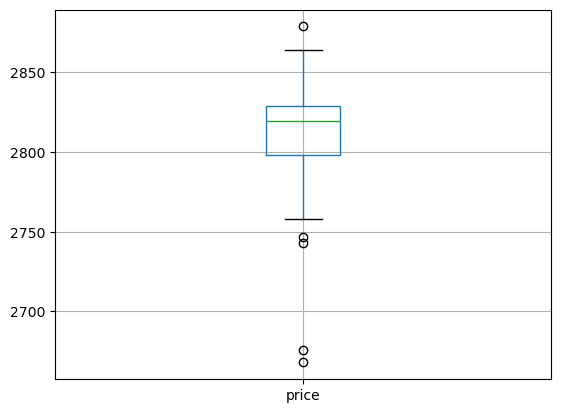

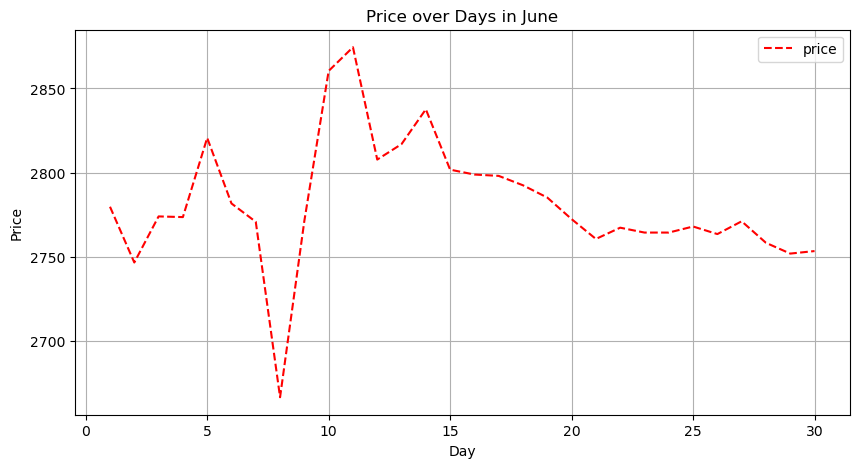

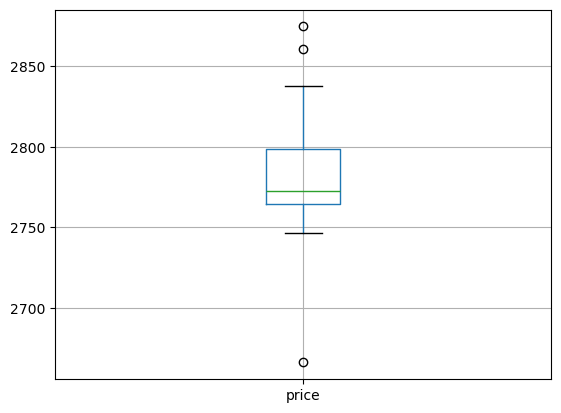

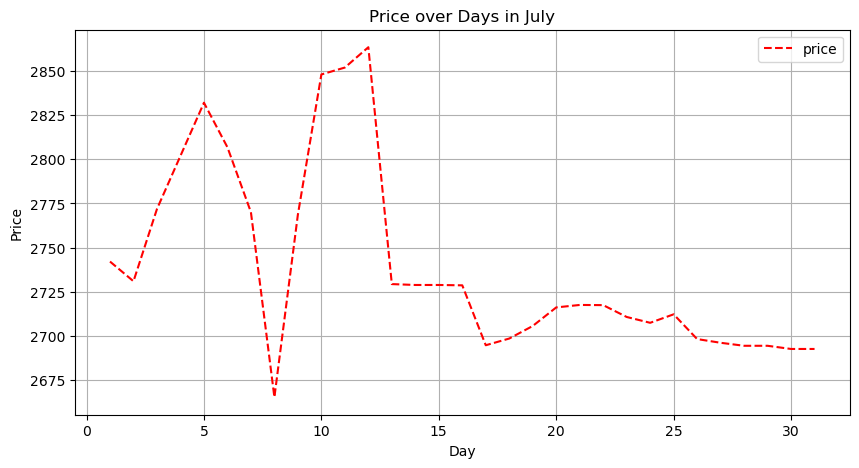

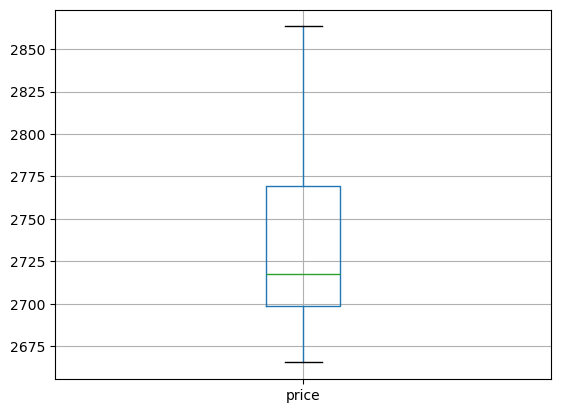

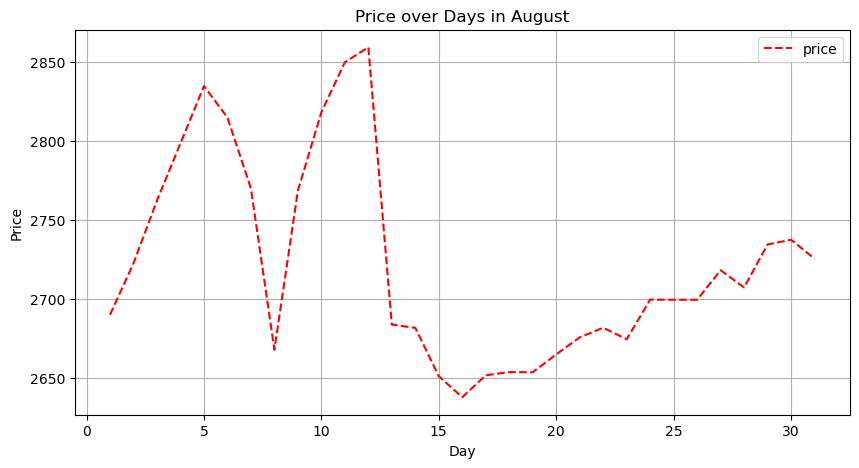

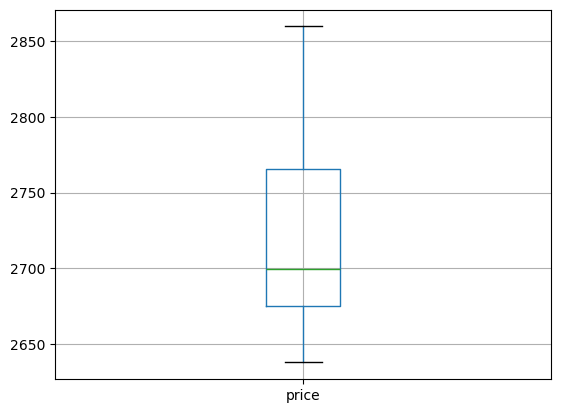

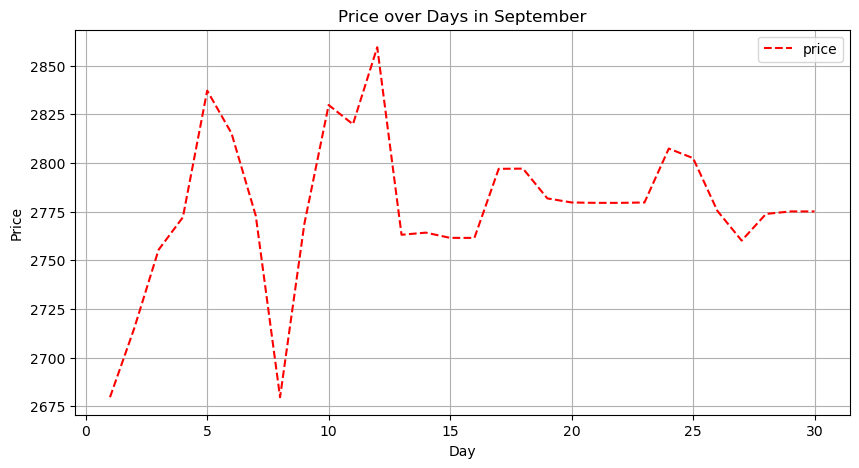

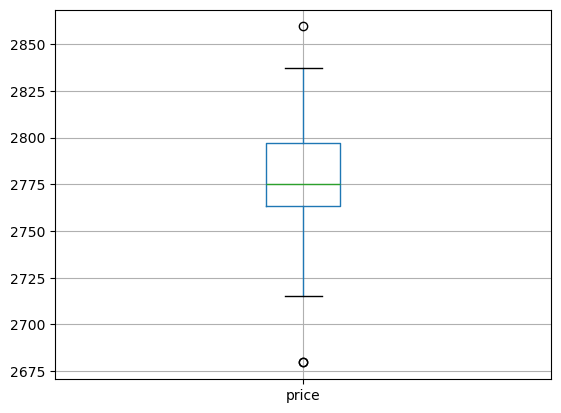

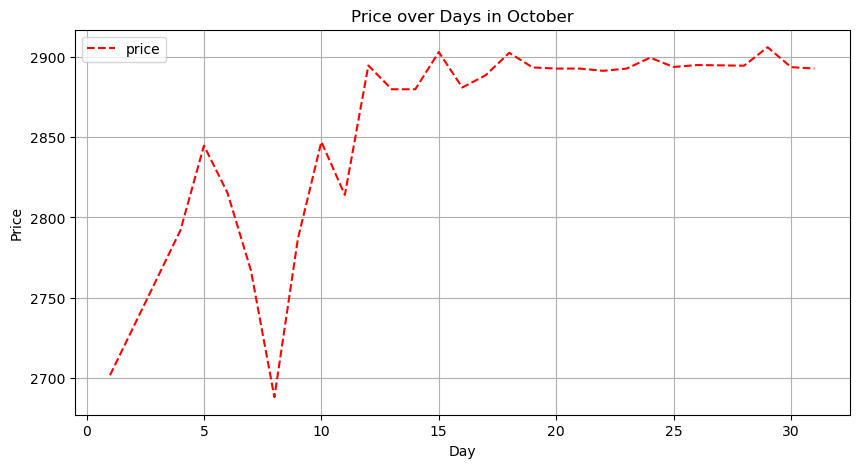

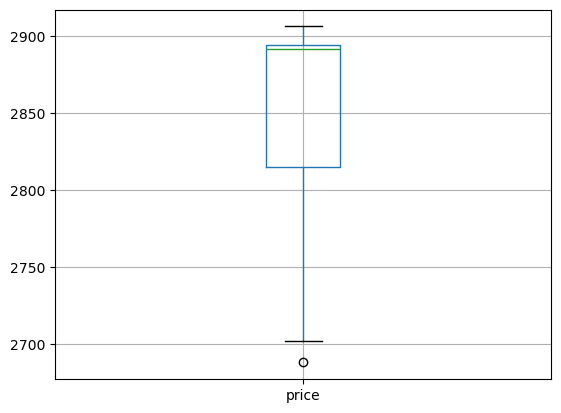

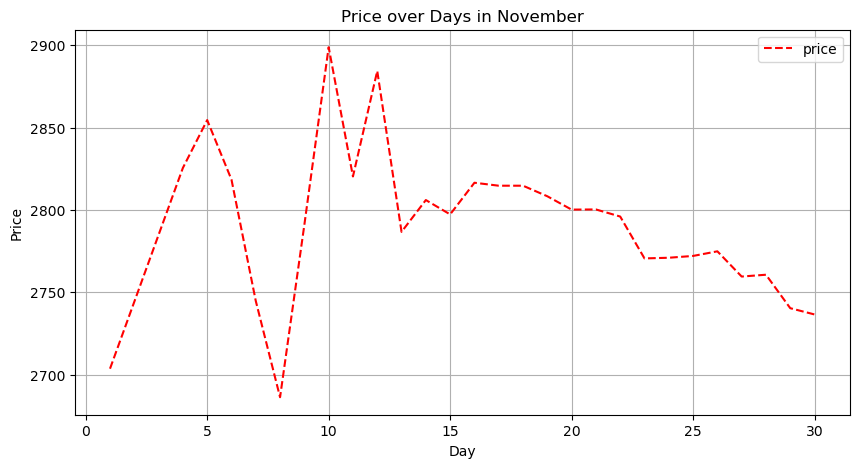

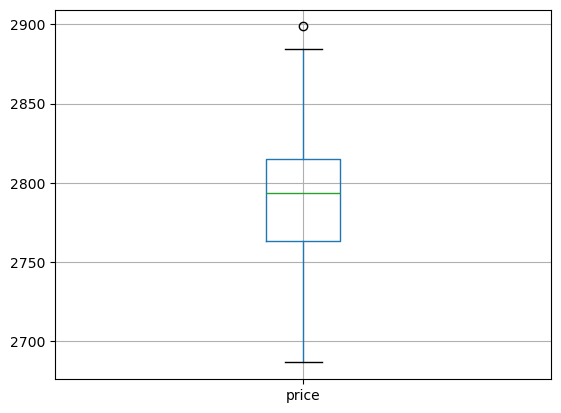

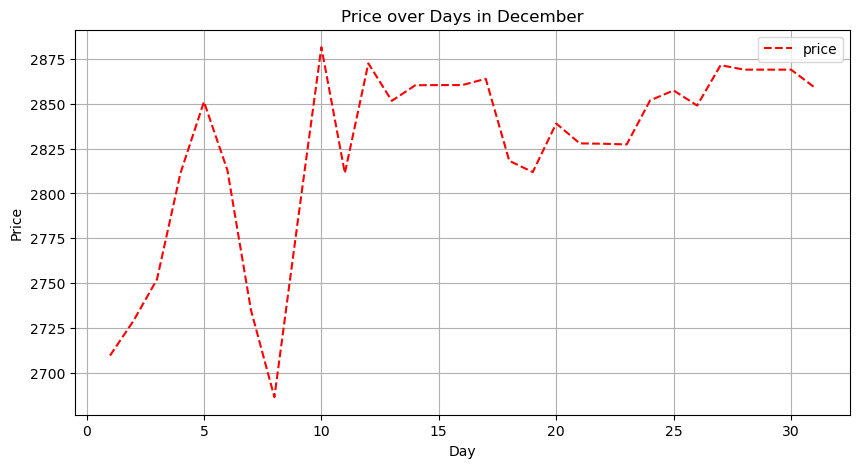

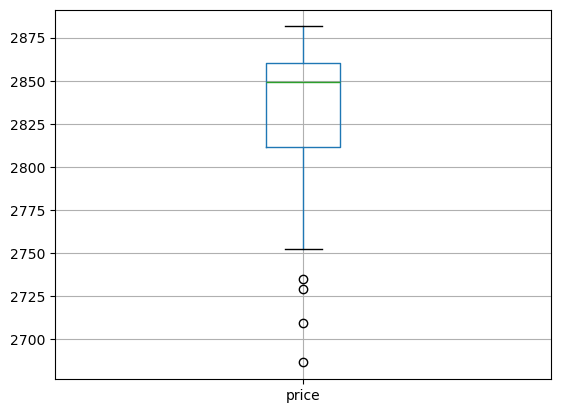

In [ ]:
def plot_monthly_price(df, year):
    # Create a 'month' column
    df_2018['month'] = pd.DatetimeIndex(df_2018['date_cre']).month
    df_2018['day'] = pd.DatetimeIndex(df_2018['date_cre']).day

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2018['year'] == year) & (df_2018['month'] == month)
        df_month = df_2018.loc[mask]

        # Plot data
        ax = df_month.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
        ax.grid(True)
        ax.set_title(f'Price over Days in {month_dict[month]}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Price')
        plt.show()

        # Boxplot for the 'price' column
        df_month.boxplot(column='price')
        plt.show()

# Call the function
plot_monthly_price(df_2018, 2018)


### 2019

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2019 = df[df['date_cre'].dt.year == 2019]

In [ ]:
df_2019

date_cre   price  year  month  day
1096 2019-01-01  2865.8  2019      1    1
1097 2019-01-02  3024.5  2019      1    2
1098 2019-01-03  2948.5  2019      1    3
1099 2019-01-04  2858.7  2019      1    4
1100 2019-01-05  2853.4  2019      1    5
...         ...     ...   ...    ...  ...
1456 2019-12-27  3468.9  2019     12   27
1457 2019-12-28  3464.2  2019     12   28
1458 2019-12-29  3464.2  2019     12   29
1459 2019-12-30  3469.4  2019     12   30
1460 2019-12-31  3477.3  2019     12   31

[365 rows x 5 columns]

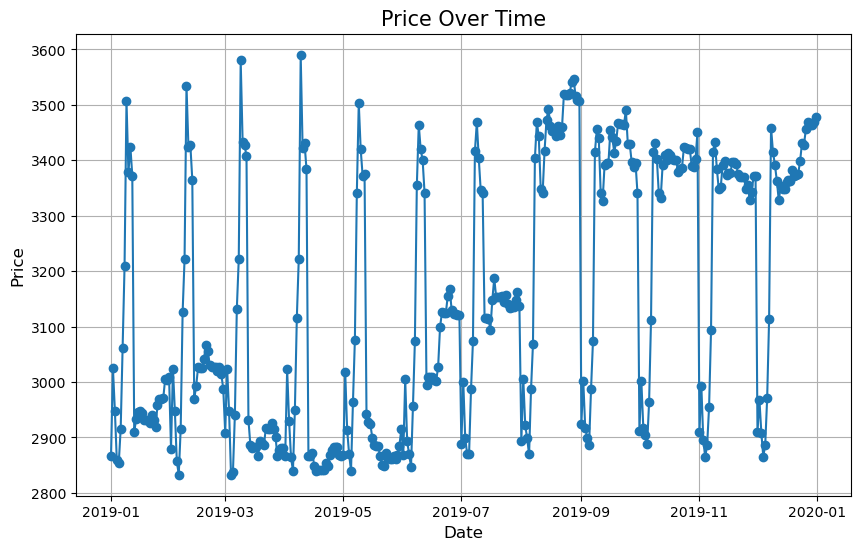

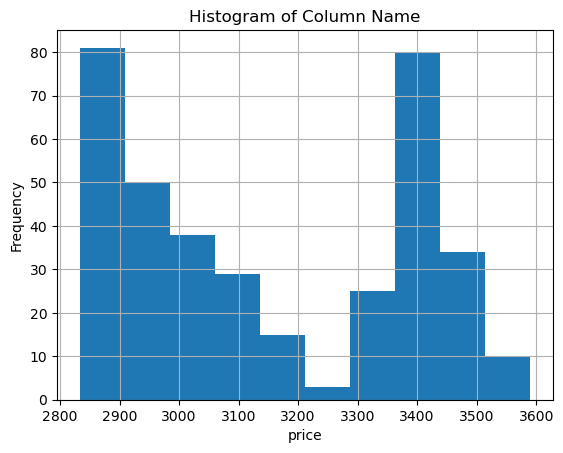

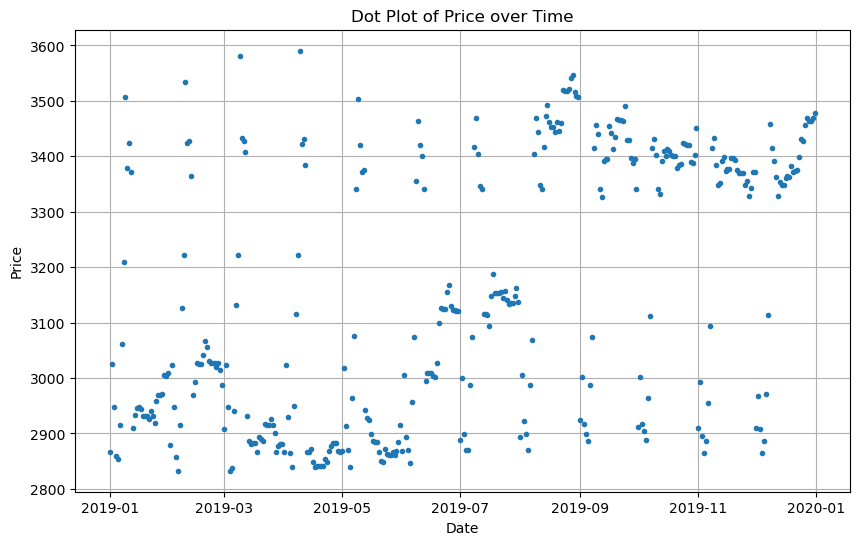

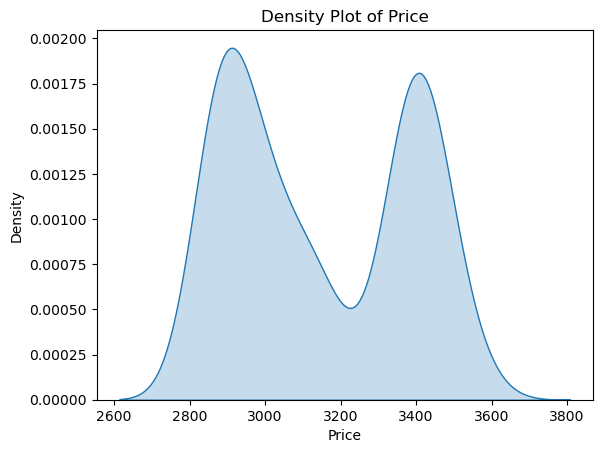

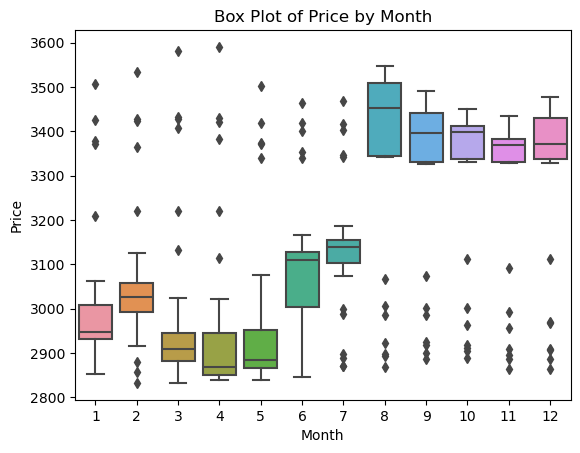

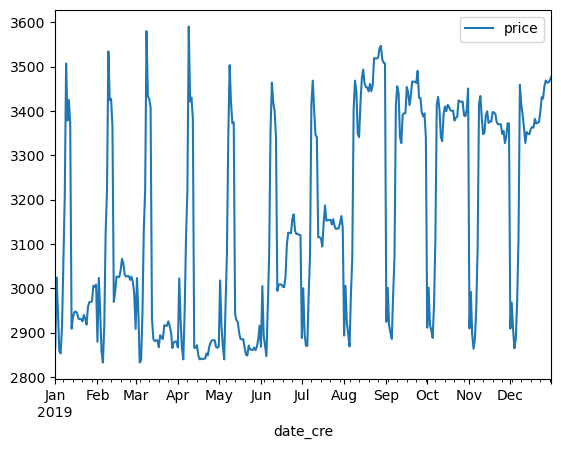

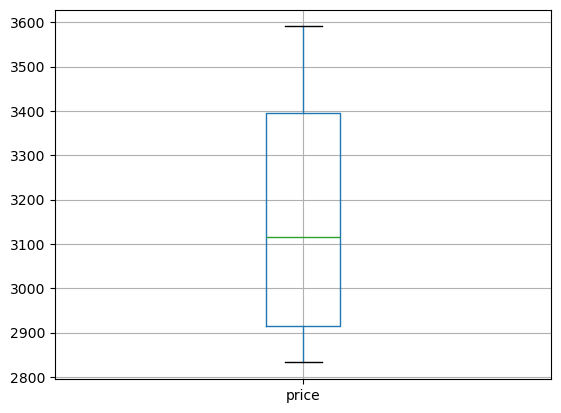

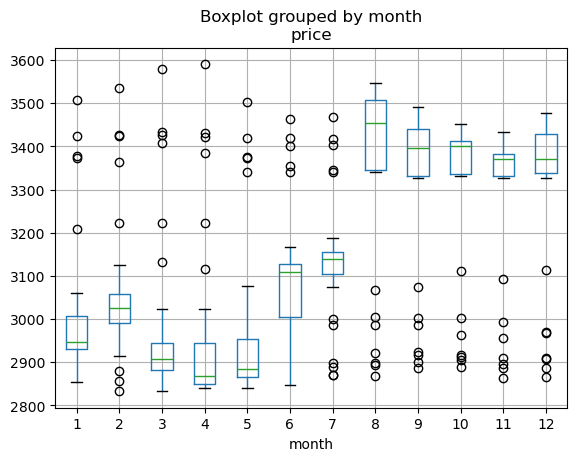

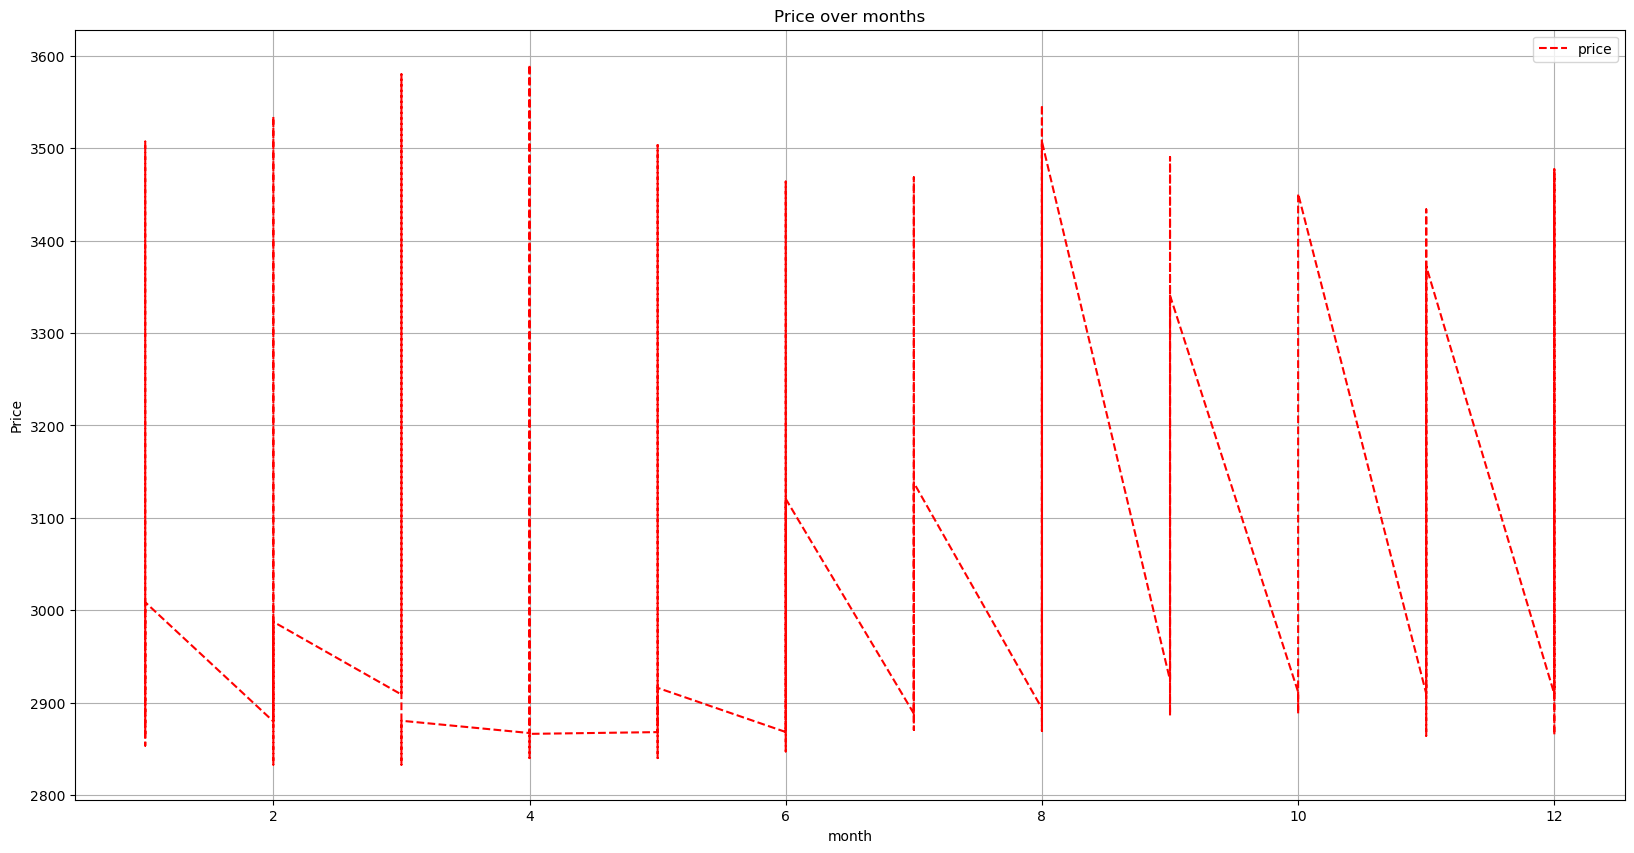

In [ ]:
def plot_all(df, date_col, price_col):
    # Line plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2019[date_col], df_2019[price_col], linestyle='solid')
    plt.title('Price Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

    # Histogram
    df_2019[price_col].hist(bins=10)
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Column Name')
    plt.show()

    # Dot plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2019[date_col], df_2019[price_col], linestyle='none', marker='o', markersize=3)
    plt.title('Dot Plot of Price over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Density plot
    sns.kdeplot(df_2019[price_col], shade=True, fill=True)
    plt.title('Density Plot of Price')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.show()

    # Box plot by month
    df_2019['month'] = df_2019[date_col].dt.month
    sns.boxplot(data=df_2019, x='month', y=price_col)
    plt.title('Box Plot of Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.show()

    # Line plot using pandas
    df_2019.plot(kind='line', x=date_col, y=price_col)
    plt.show()

    # Box plot using pandas
    df_2019.boxplot(column=price_col)
    plt.show()

    # Box plot by month using pandas
    df_2019.boxplot(column=price_col, by='month')
    plt.show()

    # Line plot with custom settings
    ax = df_2019.plot(kind='line', x='month', y=price_col, figsize=(20, 10), color='red', linestyle='--')
    ax.grid(True)
    ax.set_title('Price over months')
    ax.set_xlabel('month')
    ax.set_ylabel('Price')

# Call the function with your DataFrame and column names
plot_all(df_2019, 'date_cre', 'price')


In [ ]:
df_2019.reset_index(inplace=True)

In [ ]:
df_2019_dup = df_2019

In [ ]:
df_2019

date_cre   price  year  month  day
0   2019-01-01  2865.8  2019      1    1
1   2019-01-02  3024.5  2019      1    2
2   2019-01-03  2948.5  2019      1    3
3   2019-01-04  2858.7  2019      1    4
4   2019-01-05  2853.4  2019      1    5
..         ...     ...   ...    ...  ...
360 2019-12-27  3468.9  2019     12   27
361 2019-12-28  3464.2  2019     12   28
362 2019-12-29  3464.2  2019     12   29
363 2019-12-30  3469.4  2019     12   30
364 2019-12-31  3477.3  2019     12   31

[365 rows x 5 columns]

In [ ]:
df_2019.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2019['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  7822.982902384857


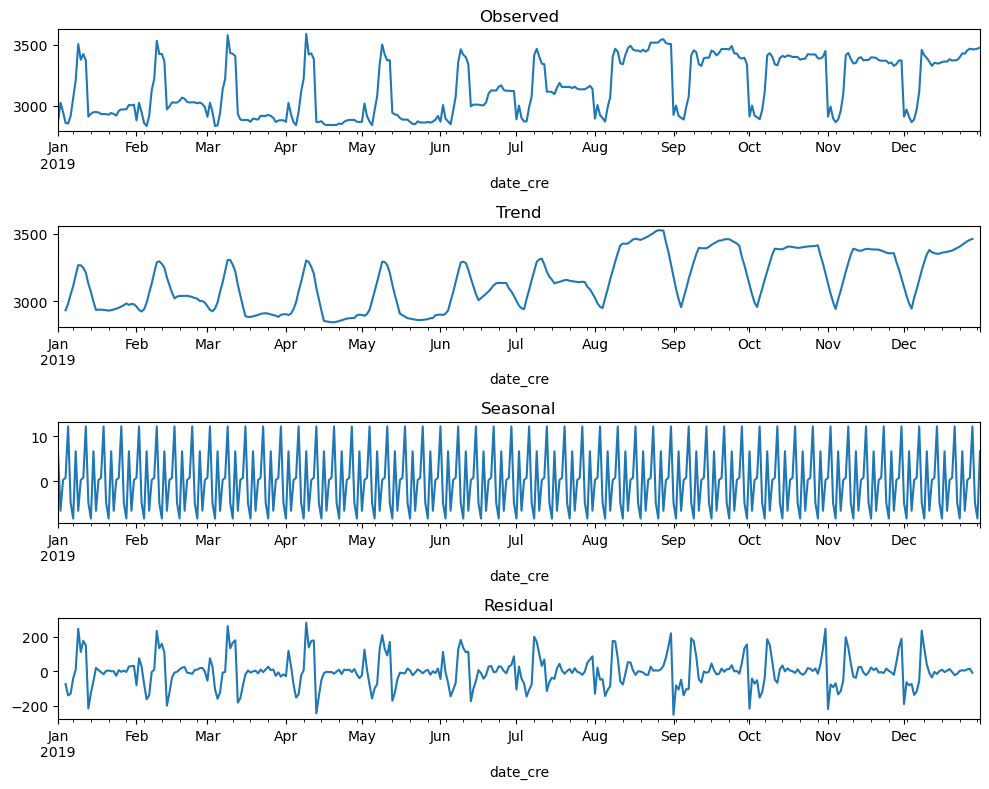

In [ ]:
df_2019_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2019_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily - 2019

In [ ]:
def monthly_describe(df, year):
    # Create a 'month' column
    df_2019['month'] = pd.DatetimeIndex(df_2019['date_cre']).month

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2019['year'] == year) & (df_2019['month'] == month)
        df_month = df_2019.loc[mask]

        # Print month name
        print(f"\n{month_dict[month]}:")

        # Generate descriptive statistics
        print(df_month.describe())

# Call the function
monthly_describe(df_2019, 2019)



January:
                  date_cre        price    year  month        day
count                   31    31.000000    31.0   31.0  31.000000
mean   2019-01-16 00:00:00  3015.954839  2019.0    1.0  16.000000
min    2019-01-01 00:00:00  2853.400000  2019.0    1.0   1.000000
25%    2019-01-08 12:00:00  2930.700000  2019.0    1.0   8.500000
50%    2019-01-16 00:00:00  2947.800000  2019.0    1.0  16.000000
75%    2019-01-23 12:00:00  3007.400000  2019.0    1.0  23.500000
max    2019-01-31 00:00:00  3507.200000  2019.0    1.0  31.000000
std                    NaN   172.193190     0.0    0.0   9.092121

February:
                  date_cre        price    year  month        day
count                   28    28.000000    28.0   28.0  28.000000
mean   2019-02-14 12:00:00  3068.482143  2019.0    2.0  14.500000
min    2019-02-01 00:00:00  2832.800000  2019.0    2.0   1.000000
25%    2019-02-07 18:00:00  2991.525000  2019.0    2.0   7.750000
50%    2019-02-14 12:00:00  3026.500000  2019.0    2.0 

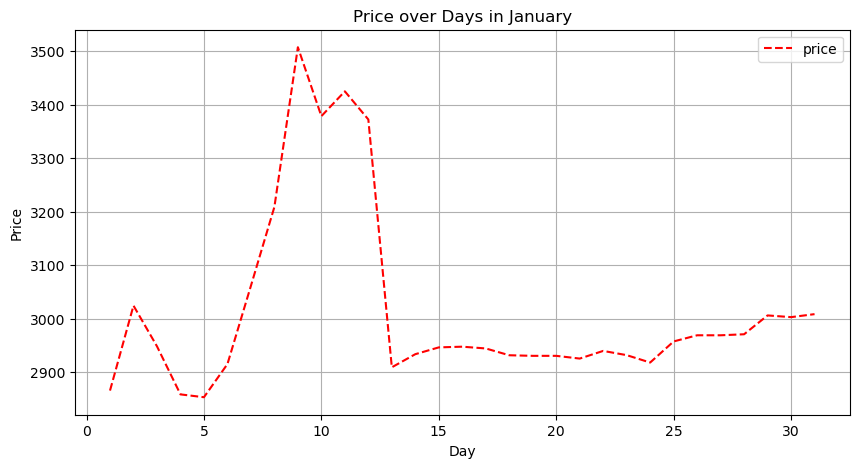

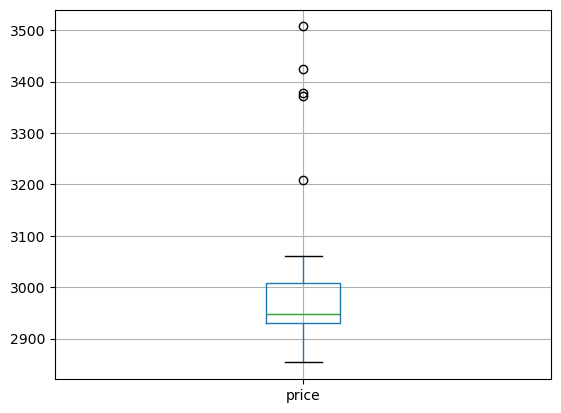

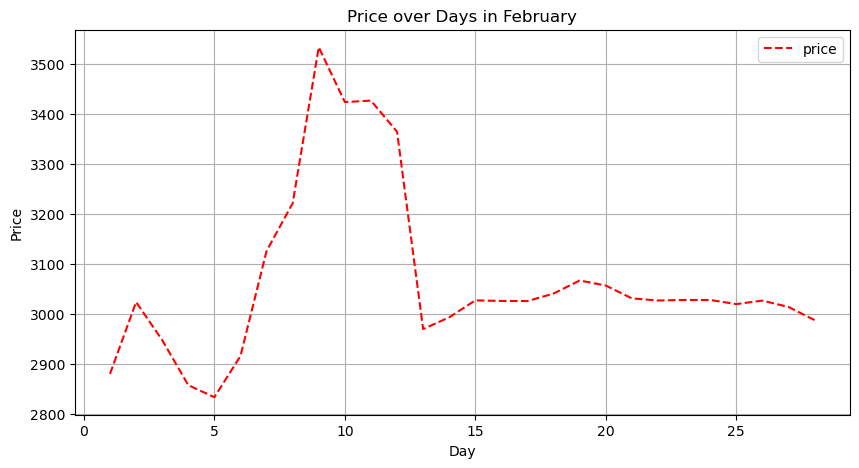

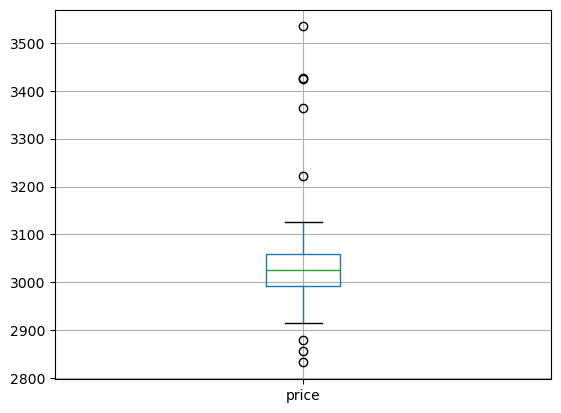

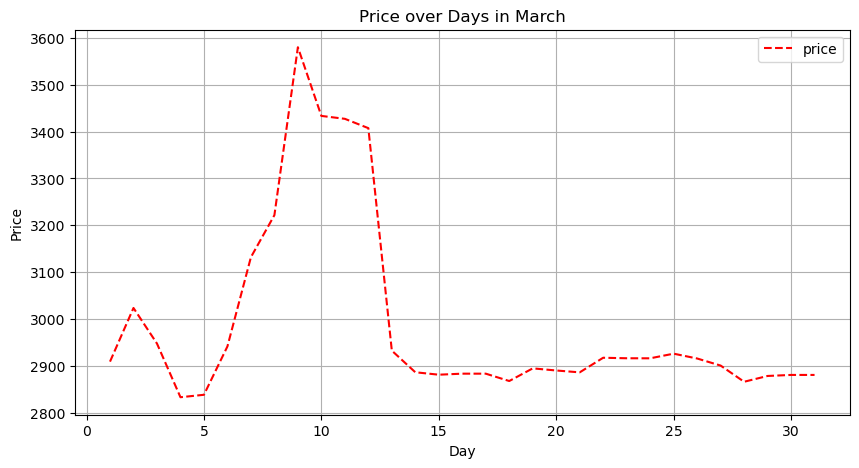

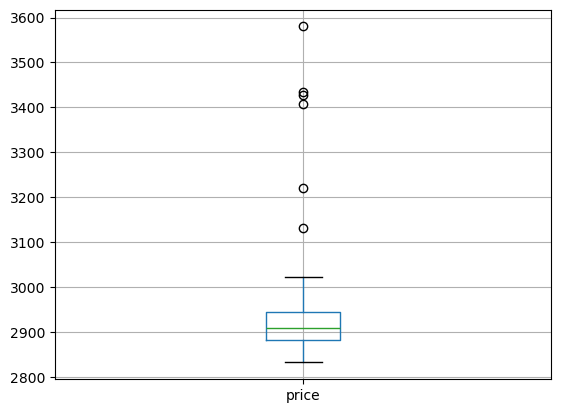

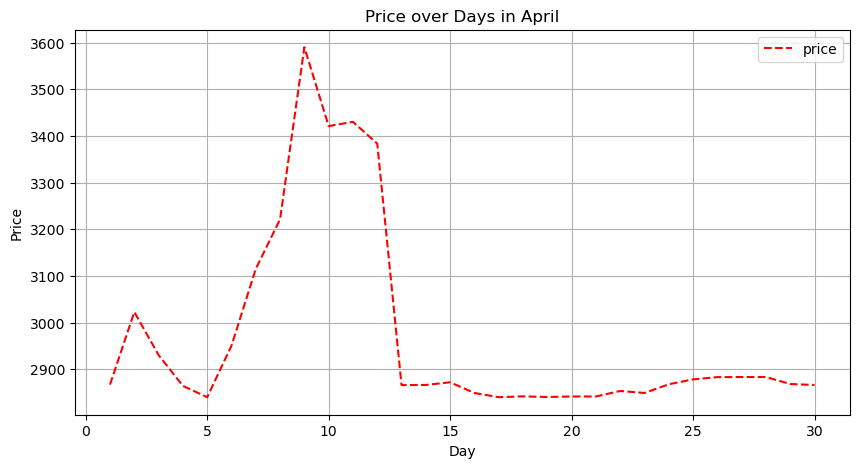

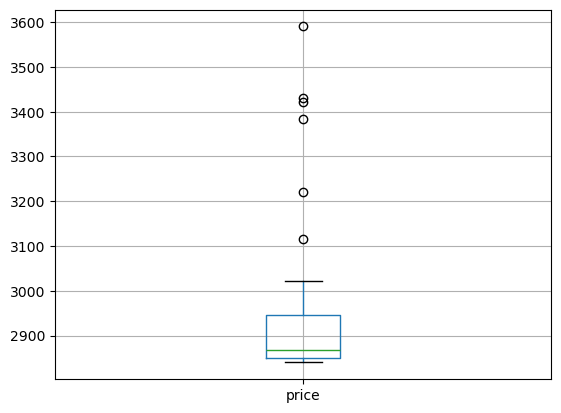

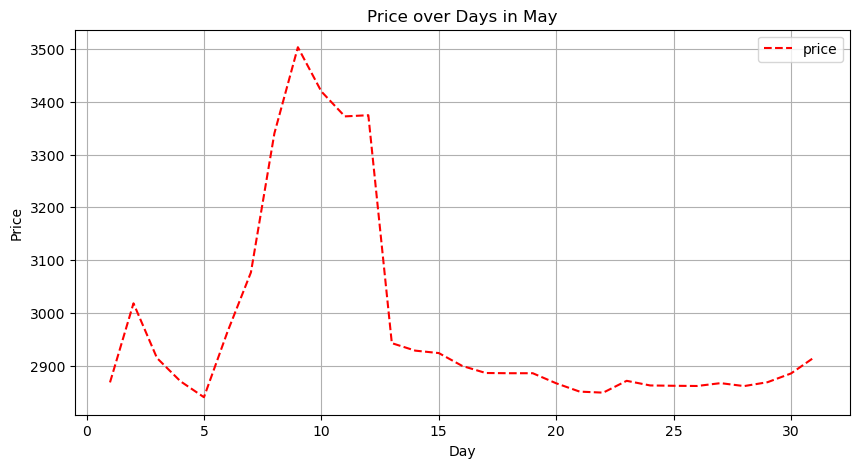

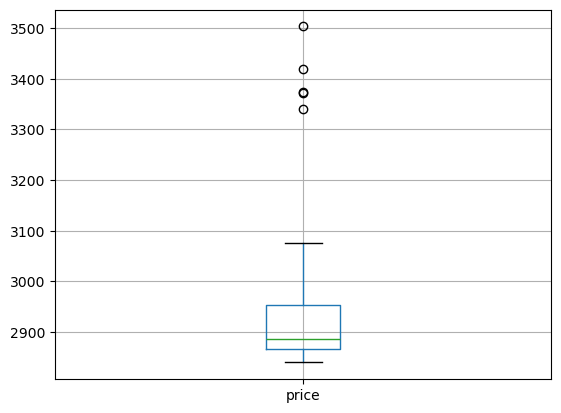

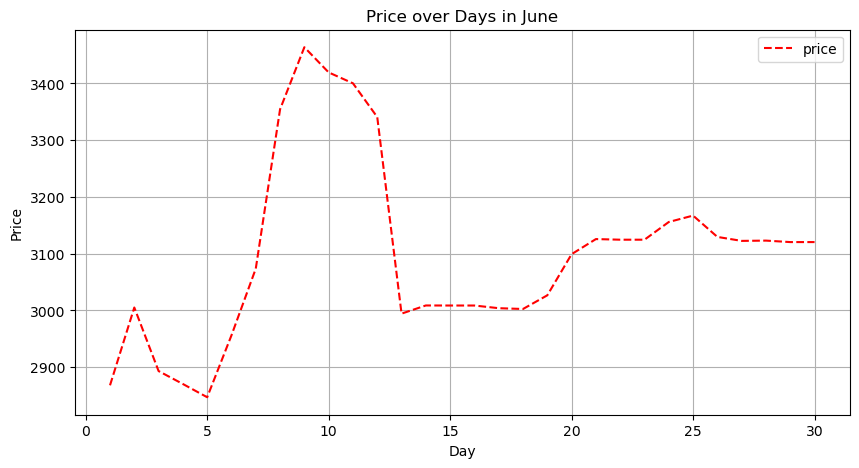

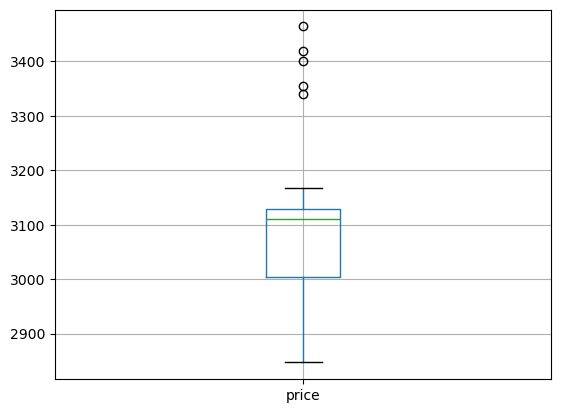

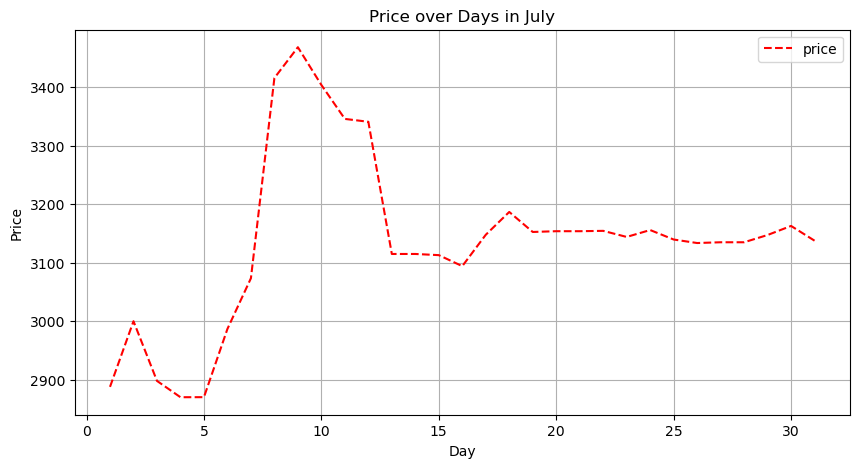

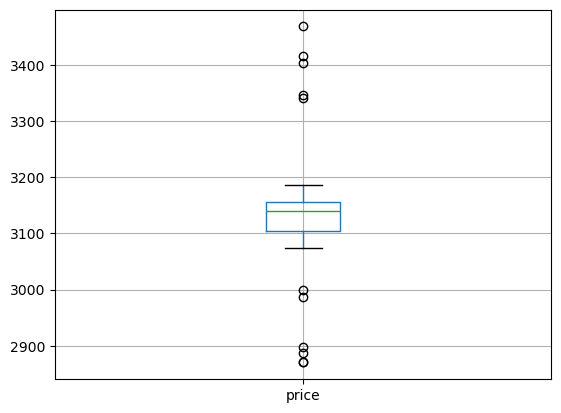

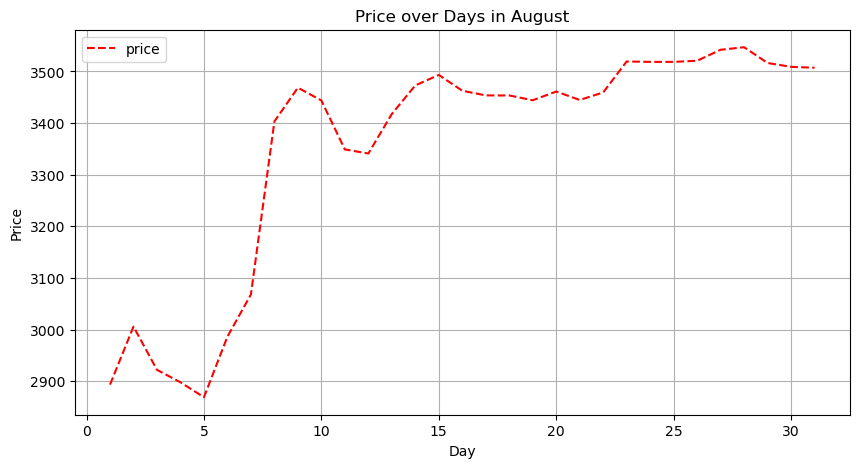

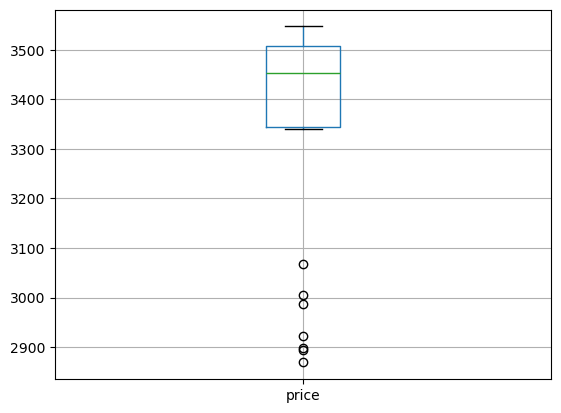

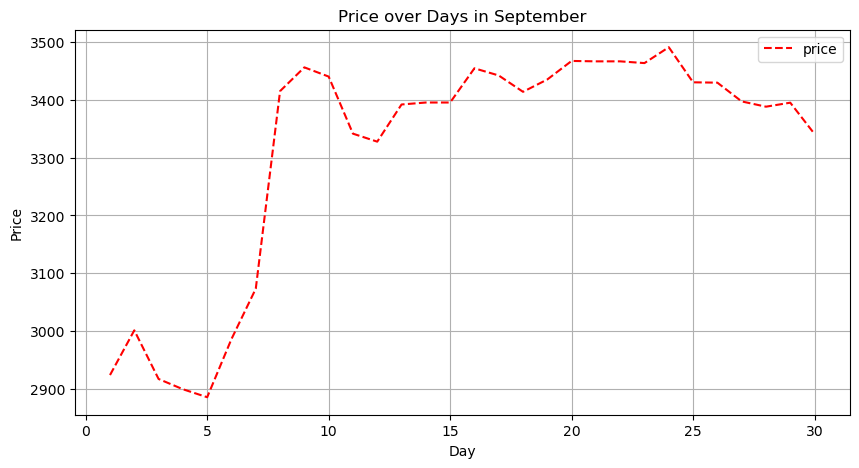

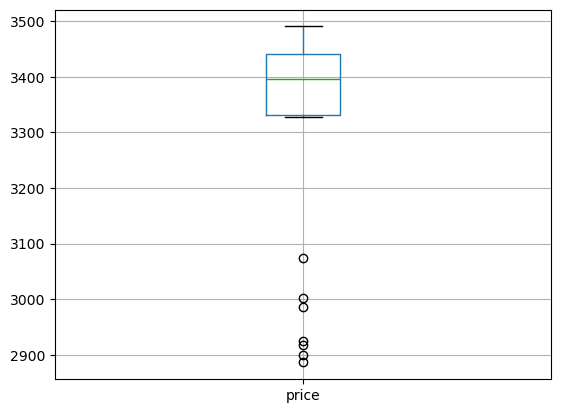

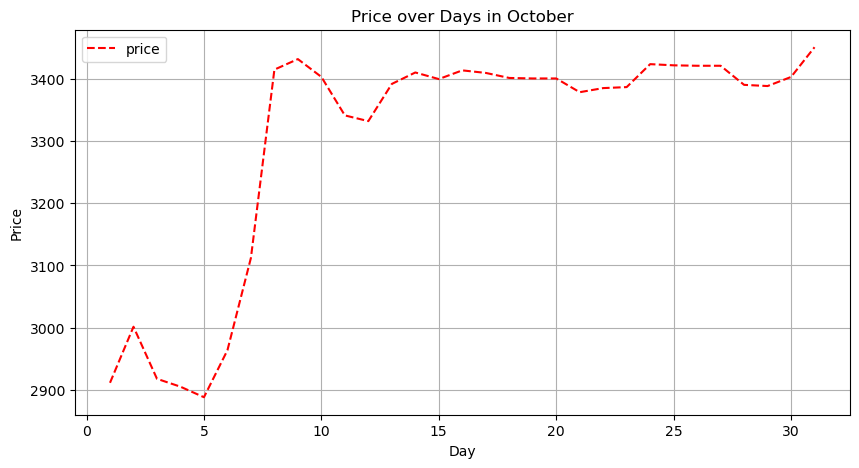

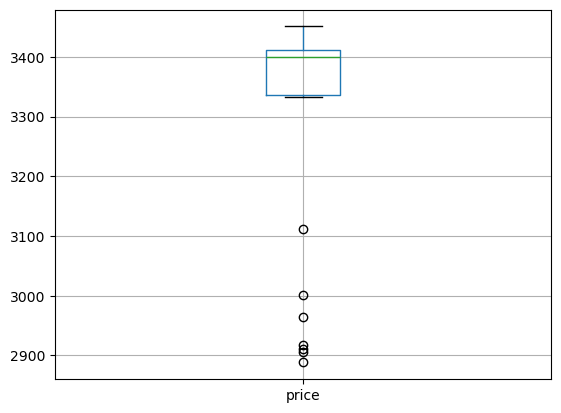

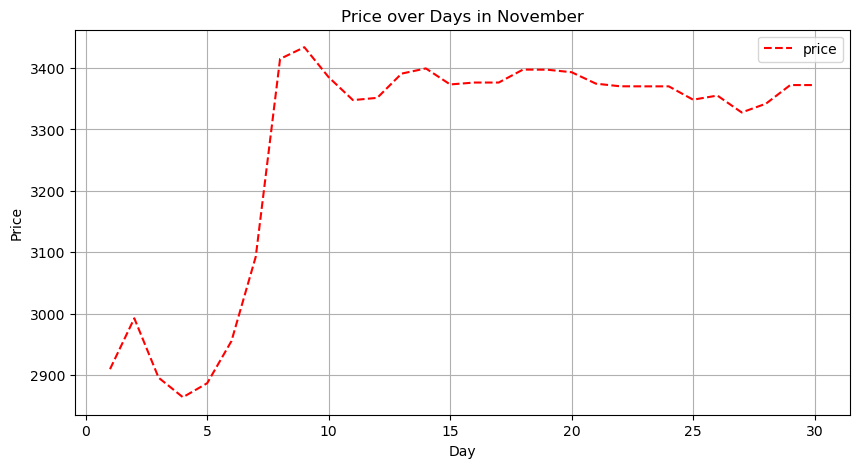

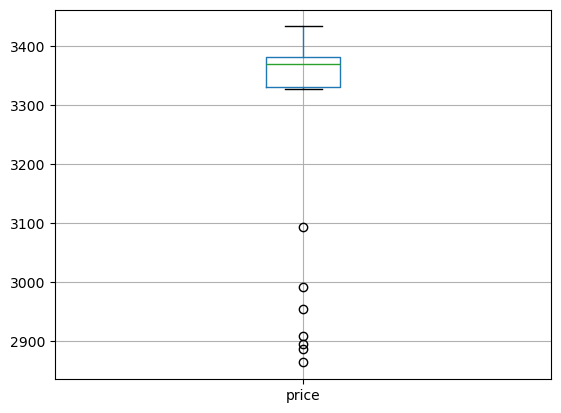

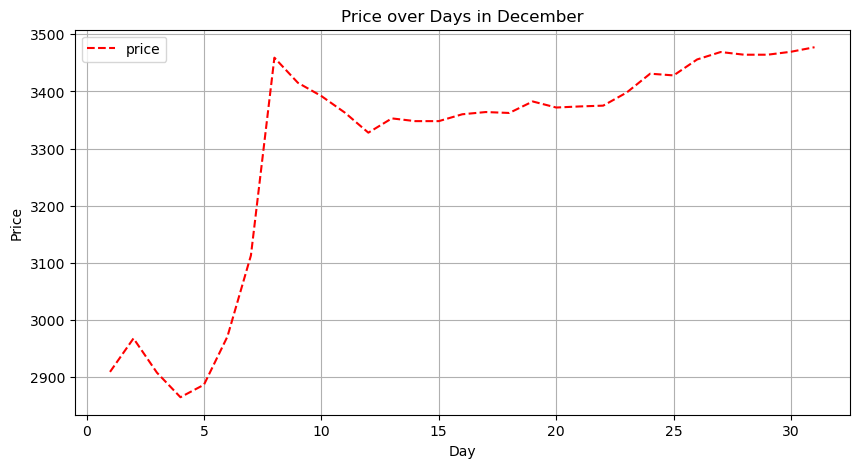

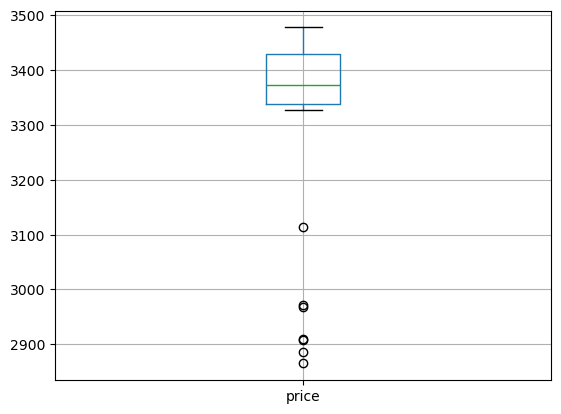

In [ ]:
def plot_monthly_price(df, year):
    # Create a 'month' column
    df_2019['month'] = pd.DatetimeIndex(df_2019['date_cre']).month
    df_2019['day'] = pd.DatetimeIndex(df_2019['date_cre']).day

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2019['year'] == year) & (df_2019['month'] == month)
        df_month = df_2019.loc[mask]

        # Plot data
        ax = df_month.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
        ax.grid(True)
        ax.set_title(f'Price over Days in {month_dict[month]}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Price')
        plt.show()

        # Boxplot for the 'price' column
        df_month.boxplot(column='price')
        plt.show()

# Call the function
plot_monthly_price(df_2019, 2019)


### 2020

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2020 = df[df['date_cre'].dt.year == 2020]

In [ ]:
df_2020

date_cre   price  year  month  day
1461 2020-01-01  3477.6  2020      1    1
1462 2020-01-02  3649.3  2020      1    2
1463 2020-01-03  3672.8  2020      1    3
1464 2020-01-04  3909.0  2020      1    4
1465 2020-01-05  4145.9  2020      1    5
...         ...     ...   ...    ...  ...
1822 2020-12-27  4455.5  2020     12   27
1823 2020-12-28  4424.6  2020     12   28
1824 2020-12-29  4427.6  2020     12   29
1825 2020-12-30  4441.9  2020     12   30
1826 2020-12-31  4440.4  2020     12   31

[366 rows x 5 columns]

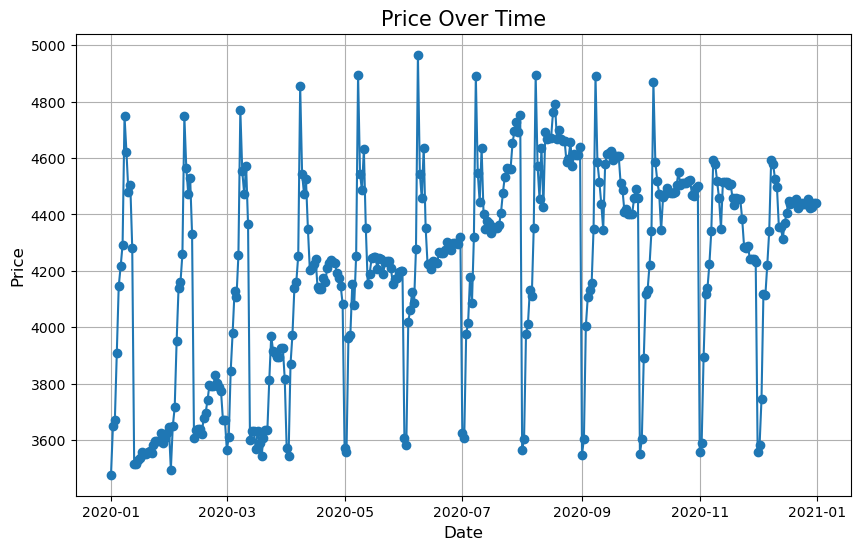

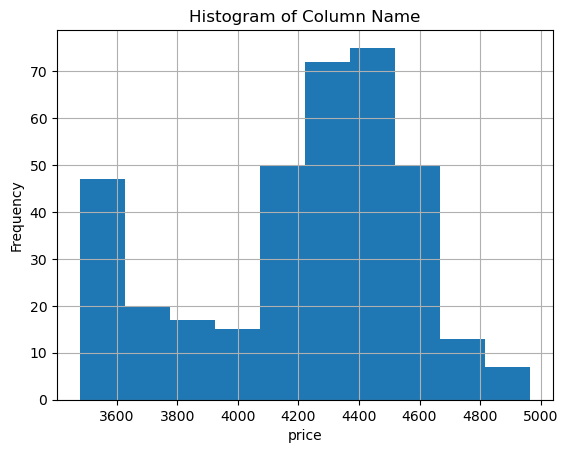

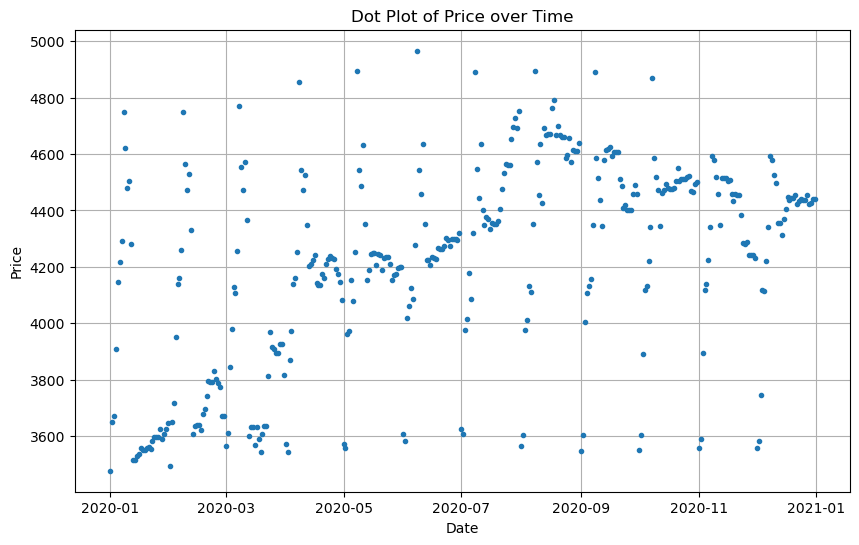

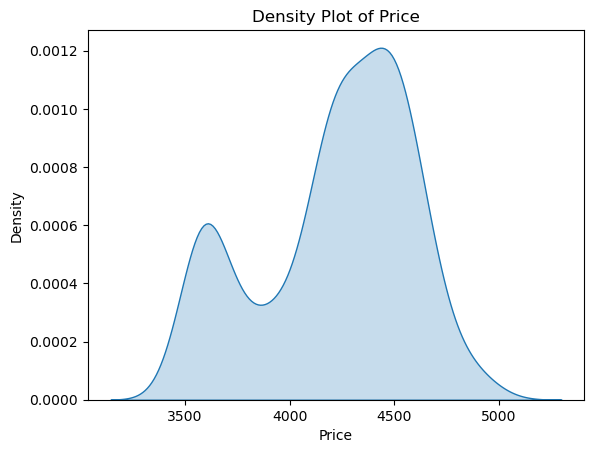

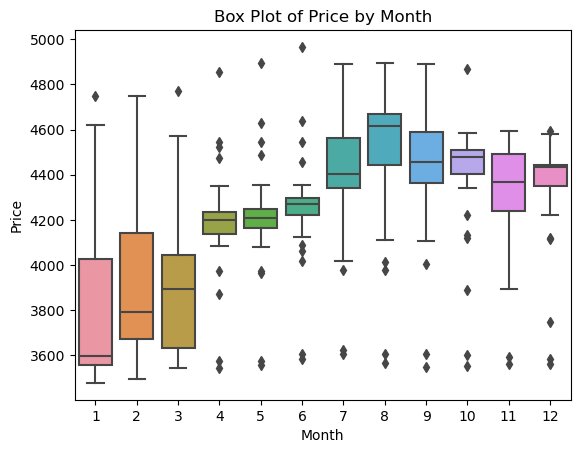

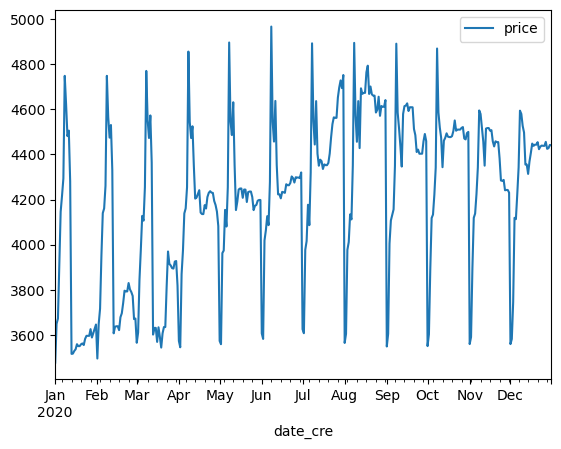

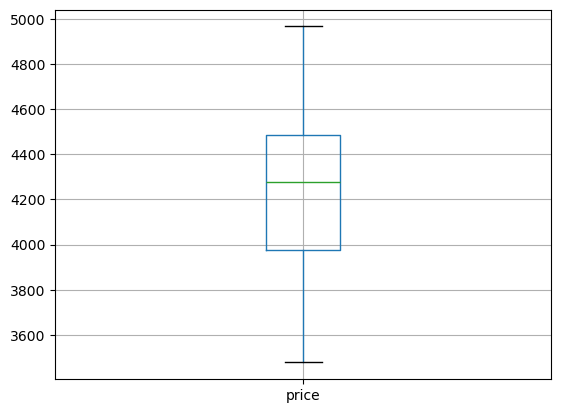

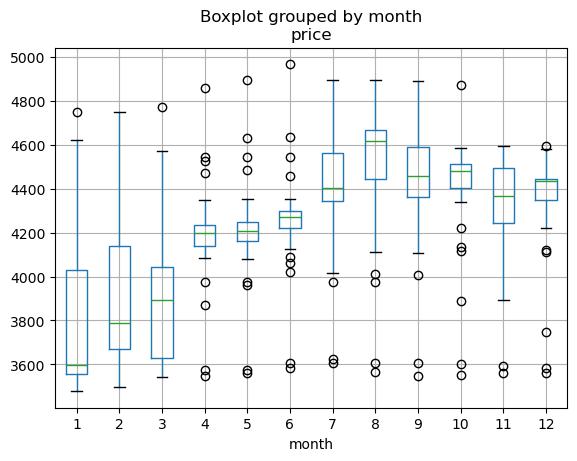

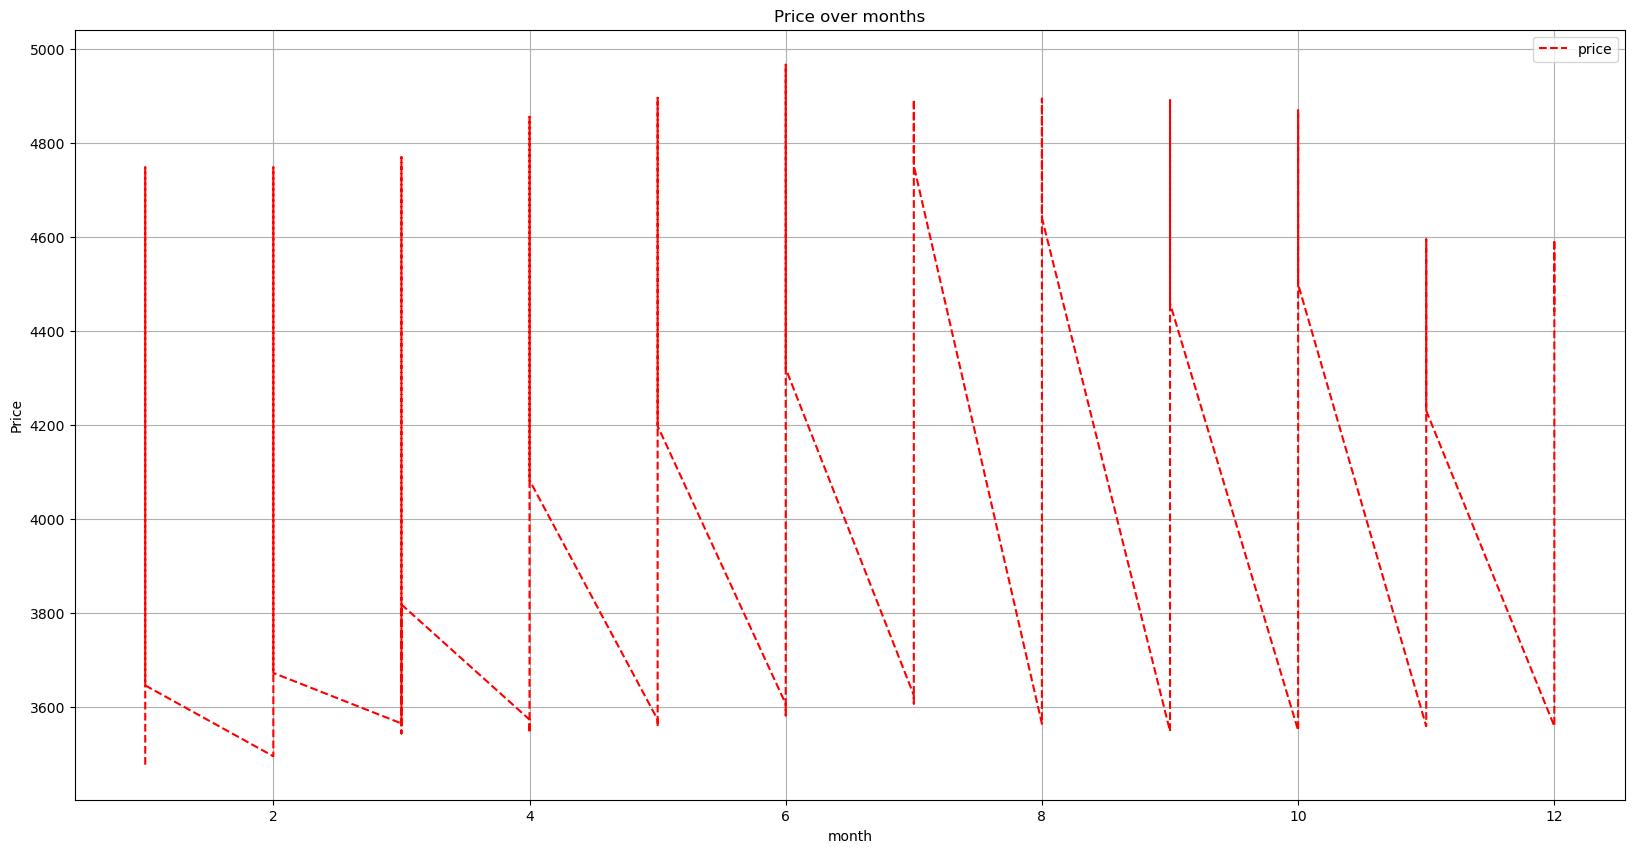

In [ ]:
def plot_all(df, date_col, price_col):
    # Line plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2020[date_col], df_2020[price_col], linestyle='solid')
    plt.title('Price Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

    # Histogram
    df_2020[price_col].hist(bins=10)
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Column Name')
    plt.show()

    # Dot plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2020[date_col], df_2020[price_col], linestyle='none', marker='o', markersize=3)
    plt.title('Dot Plot of Price over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Density plot
    sns.kdeplot(df_2020[price_col], shade=True, fill=True)
    plt.title('Density Plot of Price')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.show()

    # Box plot by month
    df_2020['month'] = df_2020[date_col].dt.month
    sns.boxplot(data=df_2020, x='month', y=price_col)
    plt.title('Box Plot of Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.show()

    # Line plot using pandas
    df_2020.plot(kind='line', x=date_col, y=price_col)
    plt.show()

    # Box plot using pandas
    df_2020.boxplot(column=price_col)
    plt.show()

    # Box plot by month using pandas
    df_2020.boxplot(column=price_col, by='month')
    plt.show()

    # Line plot with custom settings
    ax = df_2020.plot(kind='line', x='month', y=price_col, figsize=(20, 10), color='red', linestyle='--')
    ax.grid(True)
    ax.set_title('Price over months')
    ax.set_xlabel('month')
    ax.set_ylabel('Price')

# Call the function with your DataFrame and column names
plot_all(df_2020, 'date_cre', 'price')


In [ ]:
df_2020_dup = df_2020

In [ ]:
df_2020.reset_index(inplace=True)

In [ ]:
df_2020

date_cre   price  year  month  day
0   2020-01-01  3477.6  2020      1    1
1   2020-01-02  3649.3  2020      1    2
2   2020-01-03  3672.8  2020      1    3
3   2020-01-04  3909.0  2020      1    4
4   2020-01-05  4145.9  2020      1    5
..         ...     ...   ...    ...  ...
361 2020-12-27  4455.5  2020     12   27
362 2020-12-28  4424.6  2020     12   28
363 2020-12-29  4427.6  2020     12   29
364 2020-12-30  4441.9  2020     12   30
365 2020-12-31  4440.4  2020     12   31

[366 rows x 5 columns]

In [ ]:
df_2020.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2020['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  25087.257692588504


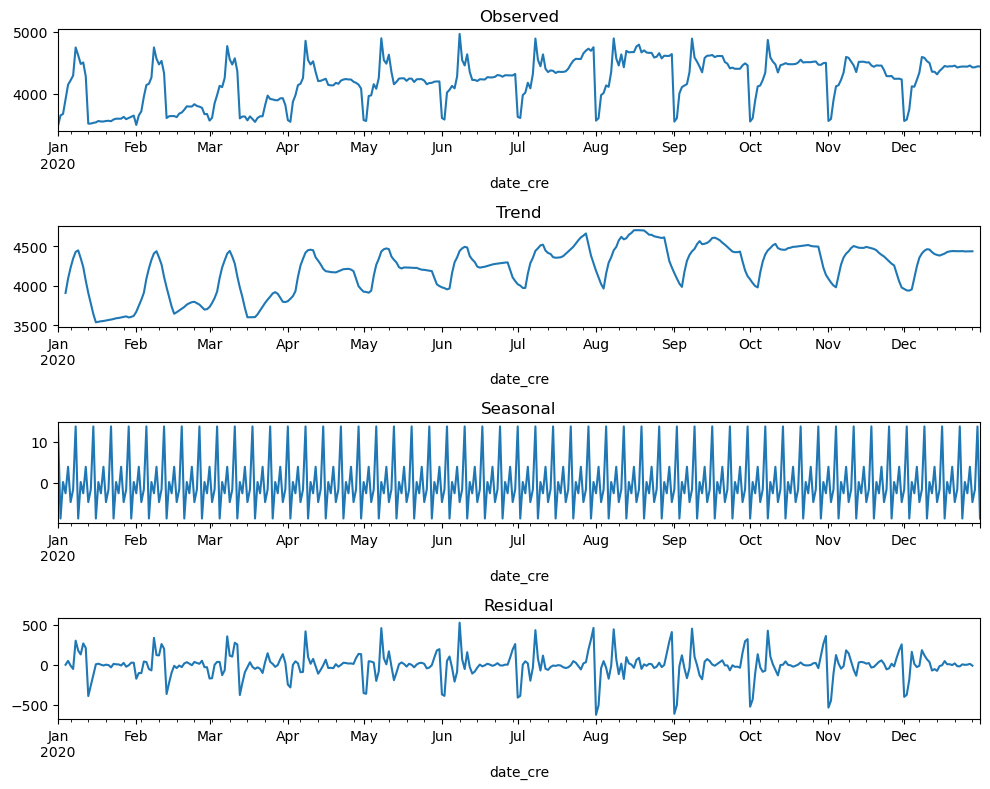

In [ ]:
df_2020_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2020_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily - 2020

In [ ]:
def monthly_describe(df, year):
    # Create a 'month' column
    df_2020['month'] = pd.DatetimeIndex(df_2020['date_cre']).month

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2020['year'] == year) & (df_2020['month'] == month)
        df_month = df_2020.loc[mask]

        # Print month name
        print(f"\n{month_dict[month]}:")

        # Generate descriptive statistics
        print(df_month.describe())

# Call the function
monthly_describe(df_2020, 2020)



January:
                  date_cre        price    year  month        day
count                   31    31.000000    31.0   31.0  31.000000
mean   2020-01-16 00:00:00  3803.264516  2020.0    1.0  16.000000
min    2020-01-01 00:00:00  3477.600000  2020.0    1.0   1.000000
25%    2020-01-08 12:00:00  3557.100000  2020.0    1.0   8.500000
50%    2020-01-16 00:00:00  3596.100000  2020.0    1.0  16.000000
75%    2020-01-23 12:00:00  4027.450000  2020.0    1.0  23.500000
max    2020-01-31 00:00:00  4748.000000  2020.0    1.0  31.000000
std                    NaN   385.377277     0.0    0.0   9.092121

February:
                  date_cre        price    year  month        day
count                   29    29.000000    29.0   29.0  29.000000
mean   2020-02-15 00:00:00  3903.472414  2020.0    2.0  15.000000
min    2020-02-01 00:00:00  3495.600000  2020.0    2.0   1.000000
25%    2020-02-08 00:00:00  3670.300000  2020.0    2.0   8.000000
50%    2020-02-15 00:00:00  3790.100000  2020.0    2.0 

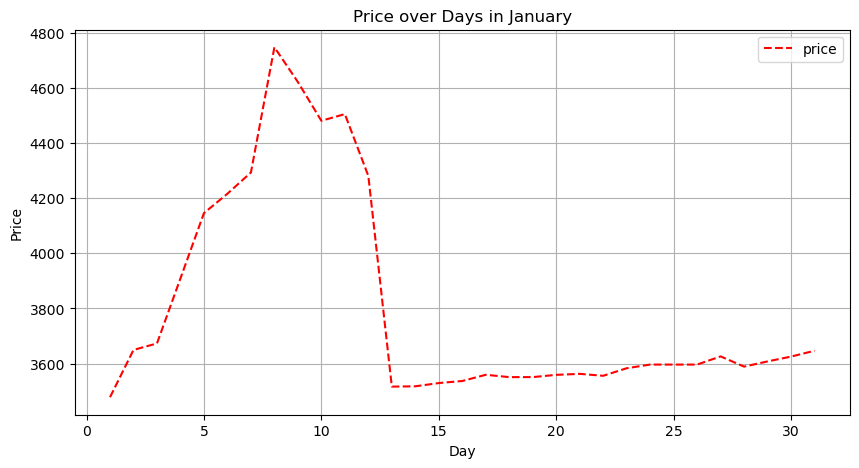

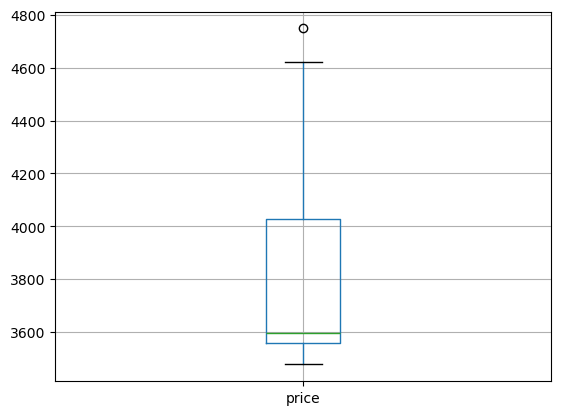

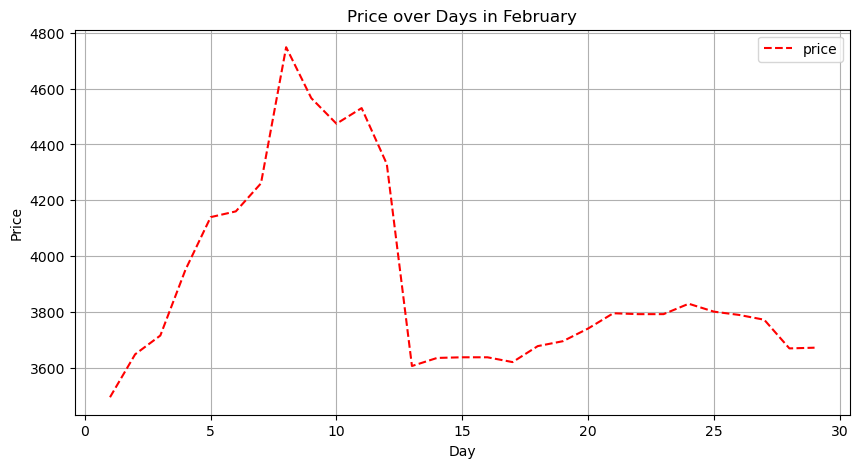

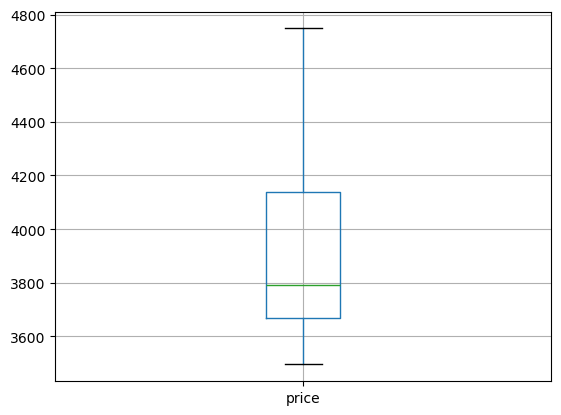

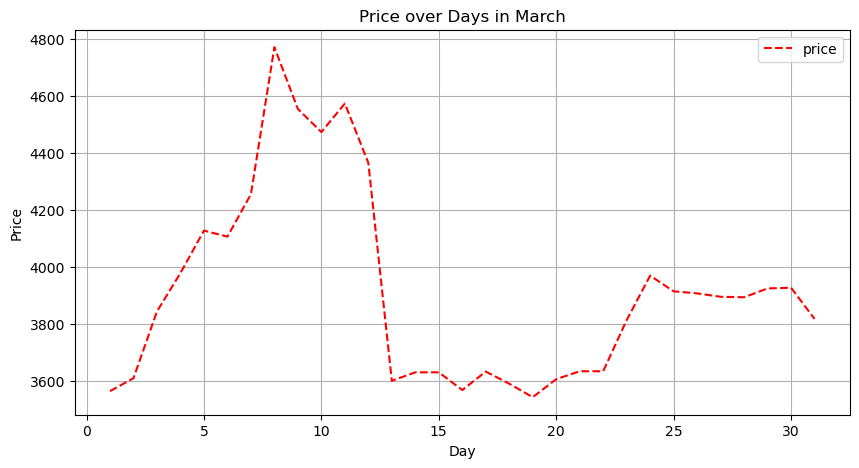

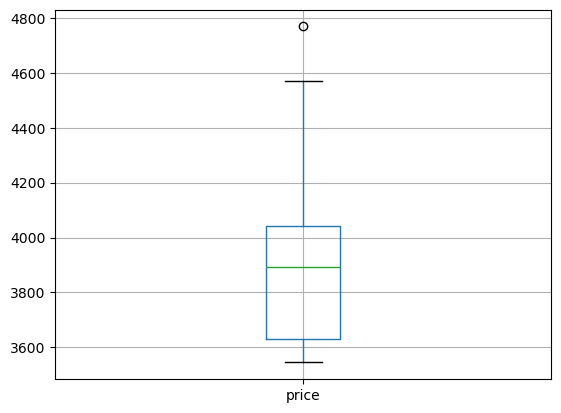

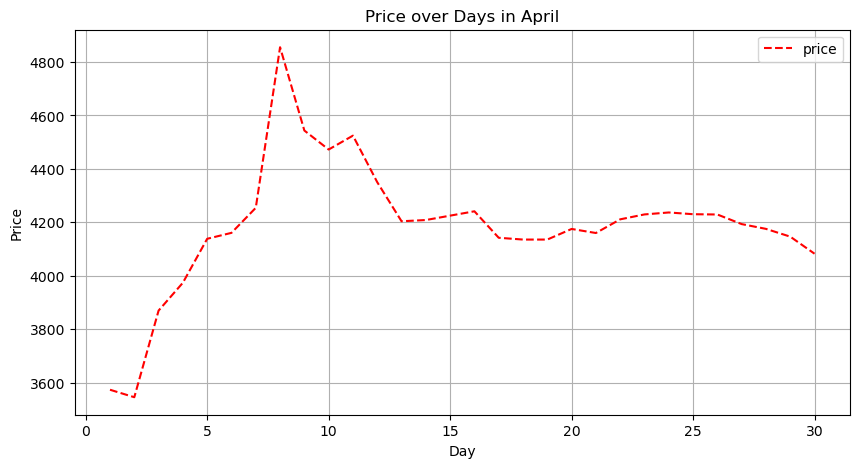

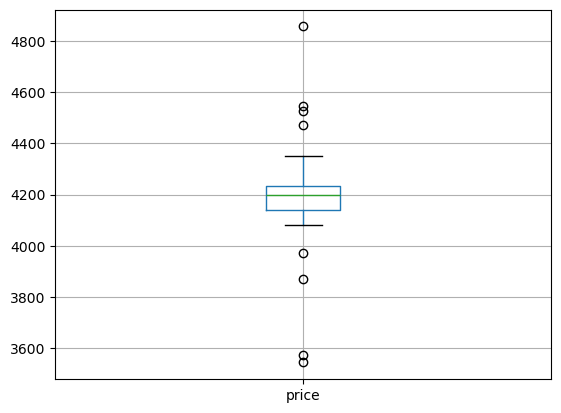

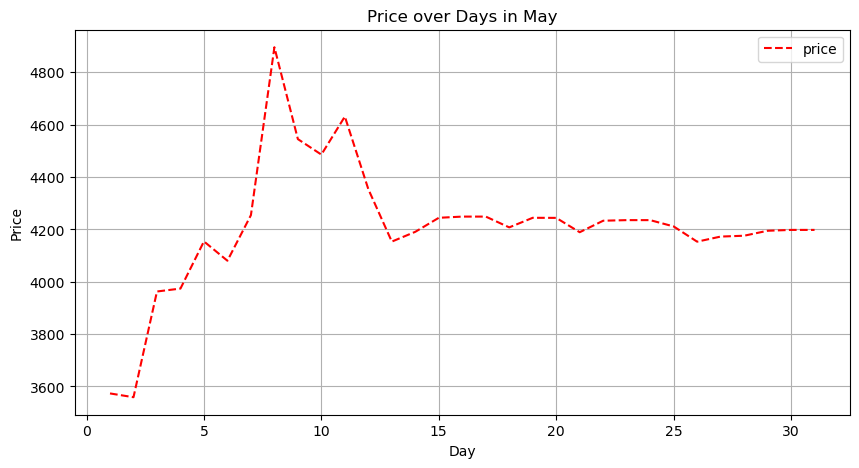

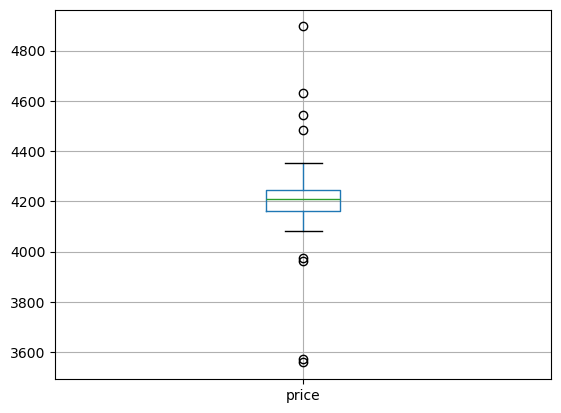

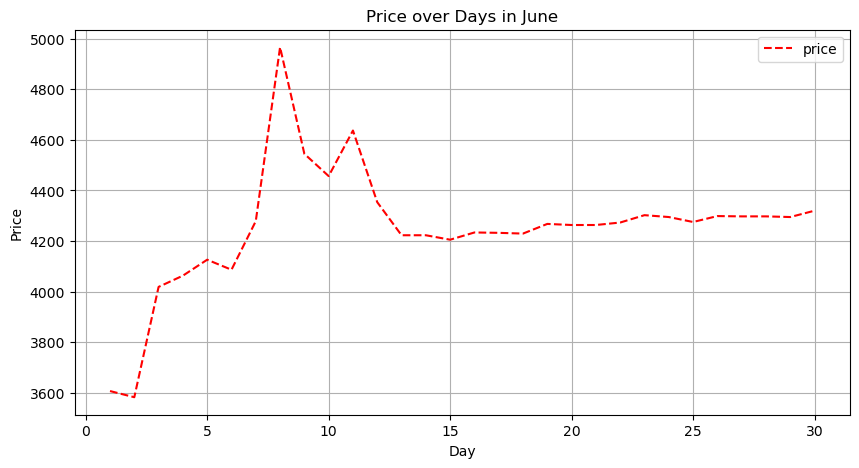

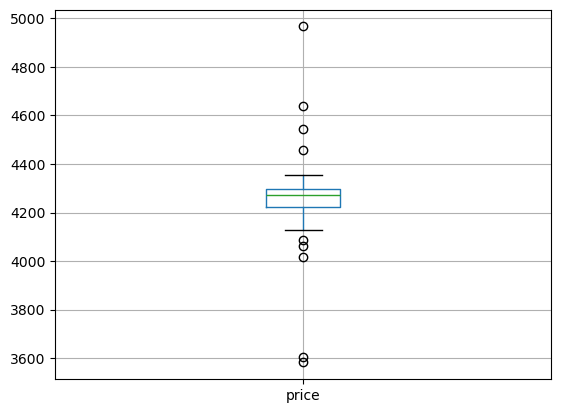

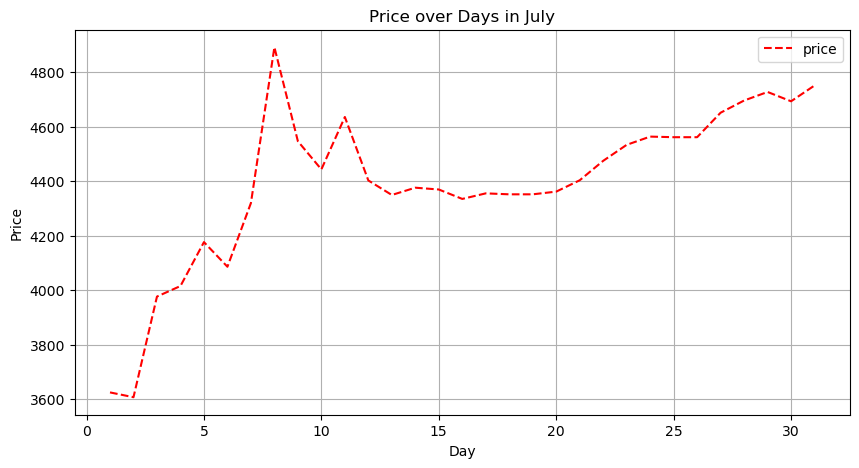

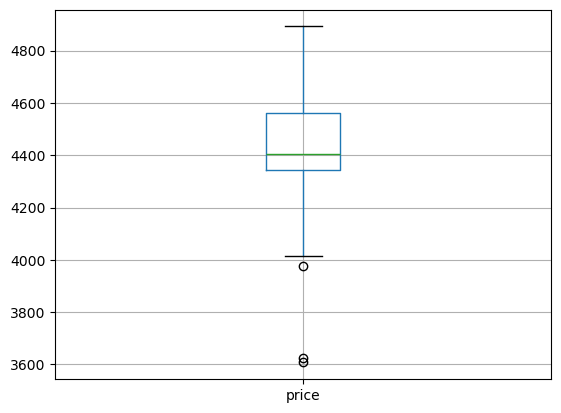

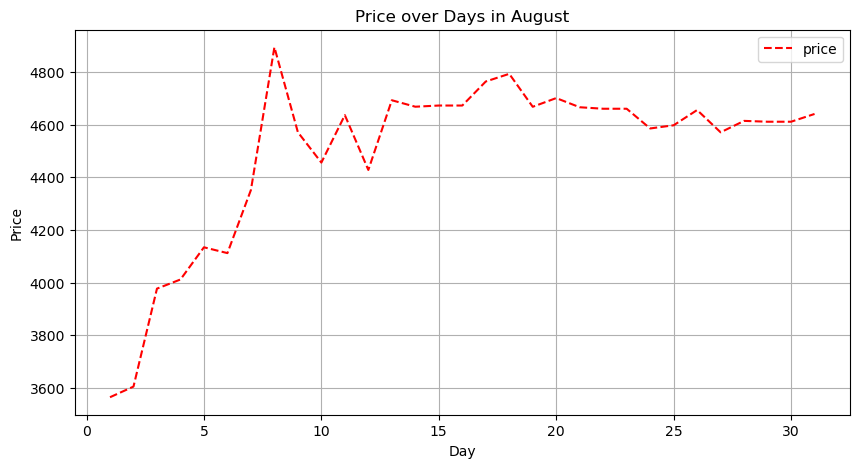

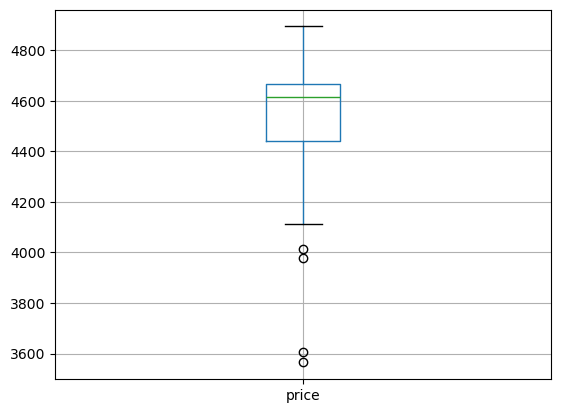

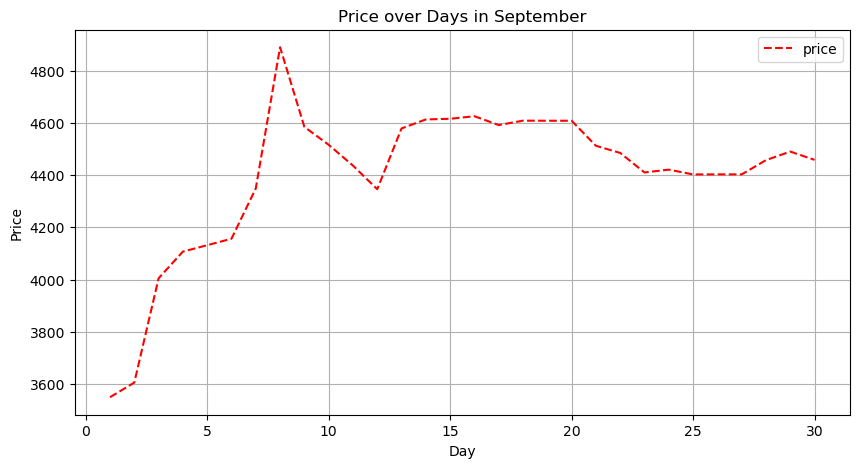

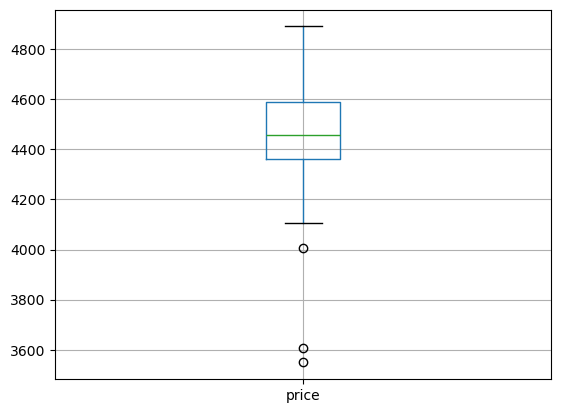

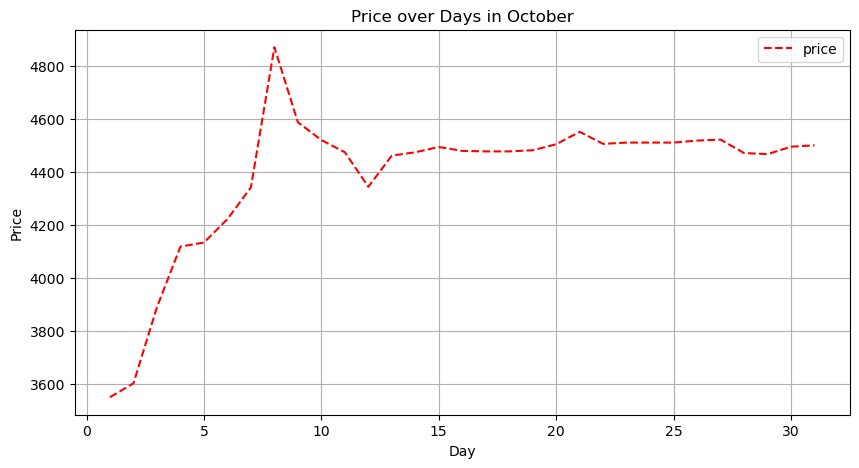

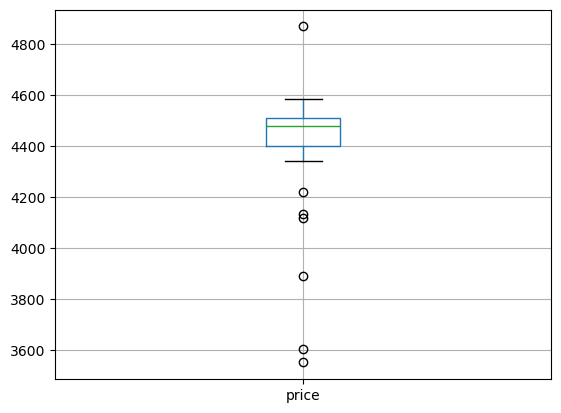

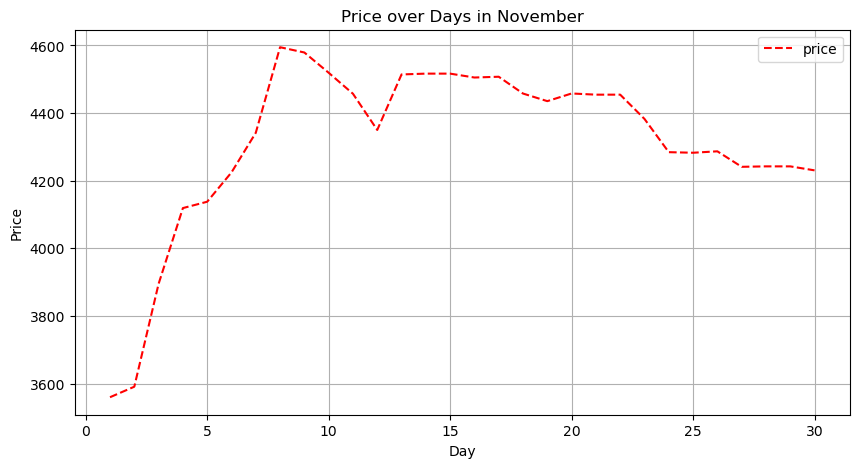

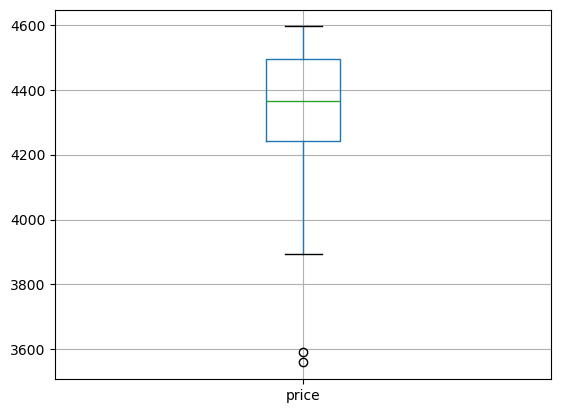

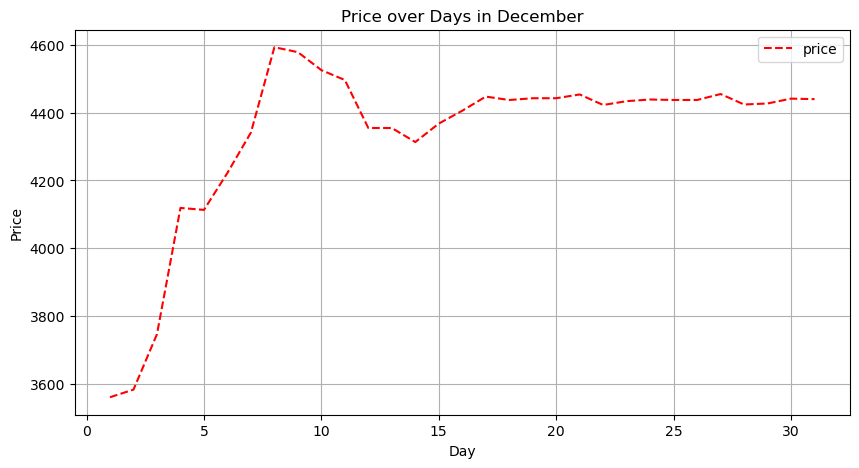

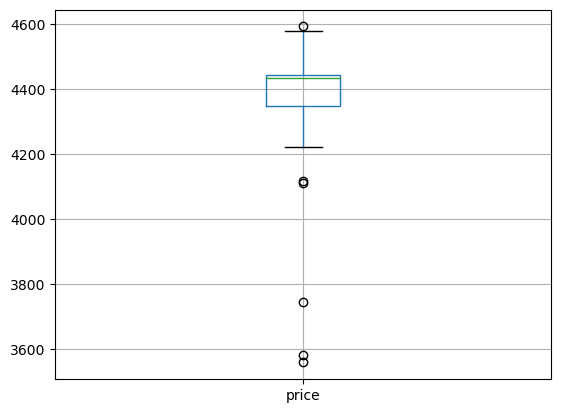

In [ ]:
def plot_monthly_price(df, year):
    # Create a 'month' column
    df_2020['month'] = pd.DatetimeIndex(df_2020['date_cre']).month
    df_2020['day'] = pd.DatetimeIndex(df_2020['date_cre']).day

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2020['year'] == year) & (df_2020['month'] == month)
        df_month = df_2020.loc[mask]

        # Plot data
        ax = df_month.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
        ax.grid(True)
        ax.set_title(f'Price over Days in {month_dict[month]}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Price')
        plt.show()

        # Boxplot for the 'price' column
        df_month.boxplot(column='price')
        plt.show()

# Call the function
plot_monthly_price(df_2020, 2020)


### 2021

In [ ]:
df['date_cre'] = pd.to_datetime(df['date_cre'])
df_2021 = df[df['date_cre'].dt.year == 2021]

In [ ]:
df_2021

date_cre   price  year  month  day
1827 2021-01-01  4443.1  2021      1    1
1828 2021-01-02  4365.3  2021      1    2
1829 2021-01-03  4050.3  2021      1    3
1830 2021-01-04  4065.8  2021      1    4
1831 2021-01-05  4207.6  2021      1    5
...         ...     ...   ...    ...  ...
2177 2021-12-17  4394.4  2021     12   17
2178 2021-12-18  4389.5  2021     12   18
2179 2021-12-19  4389.5  2021     12   19
2180 2021-12-20  4354.1  2021     12   20
2181 2021-12-21  4346.5  2021     12   21

[355 rows x 5 columns]

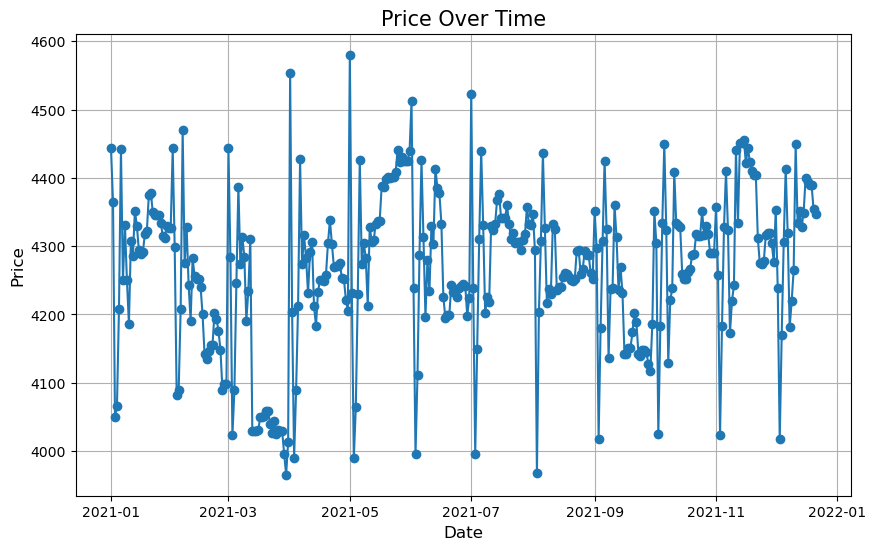

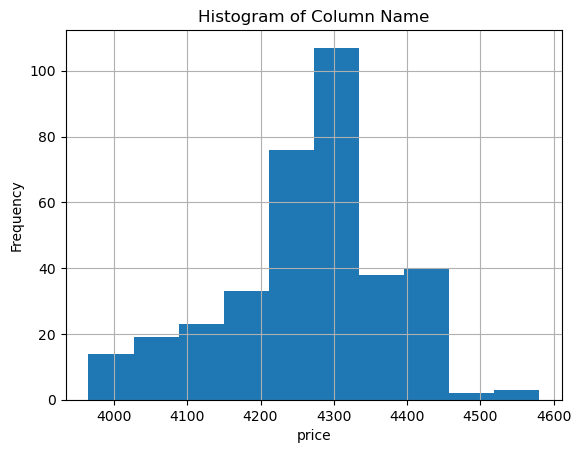

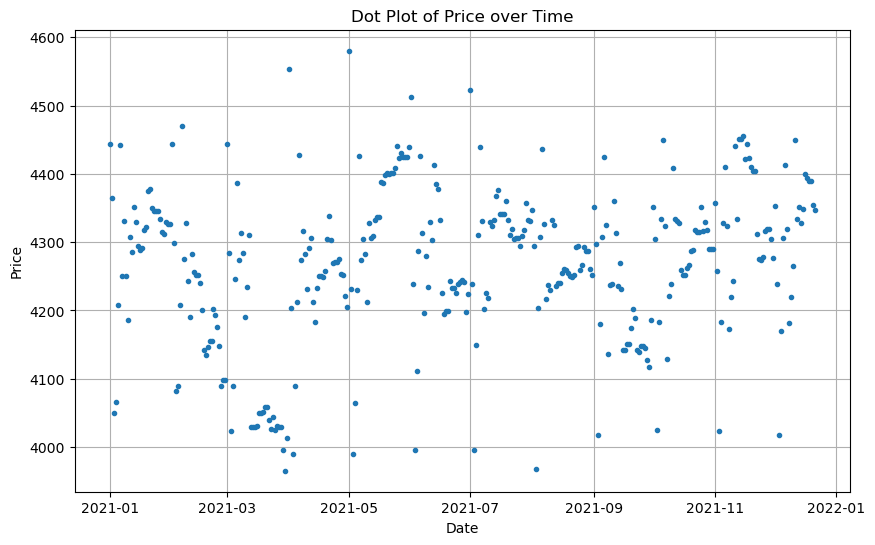

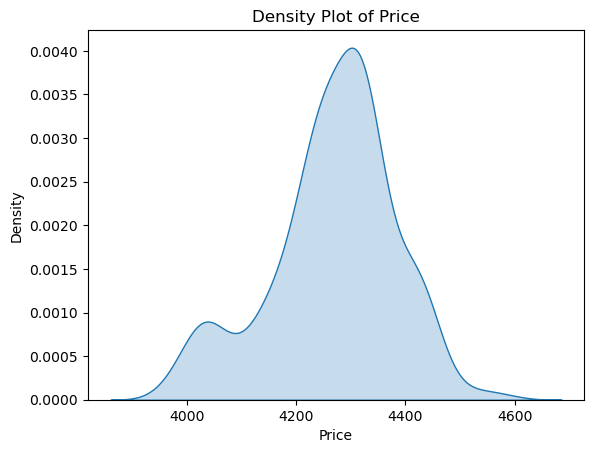

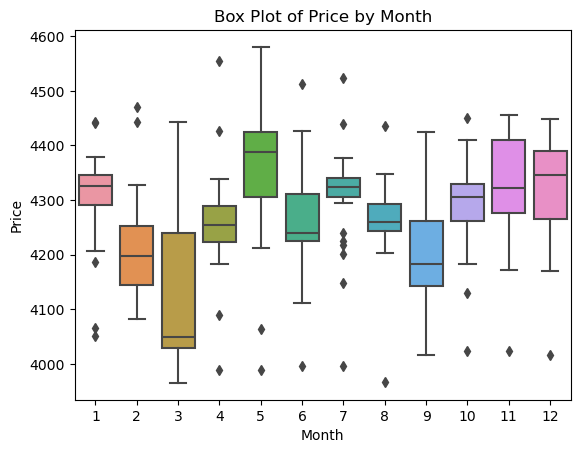

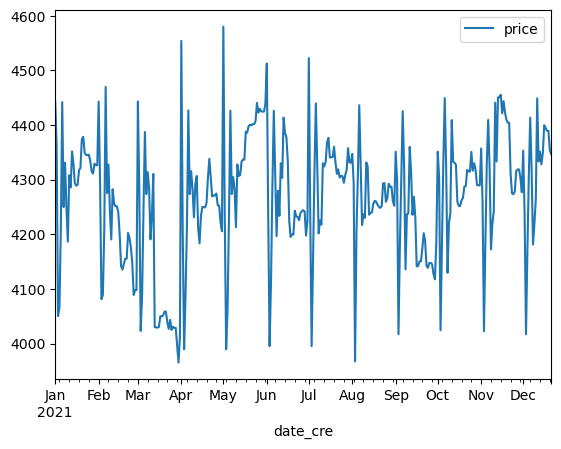

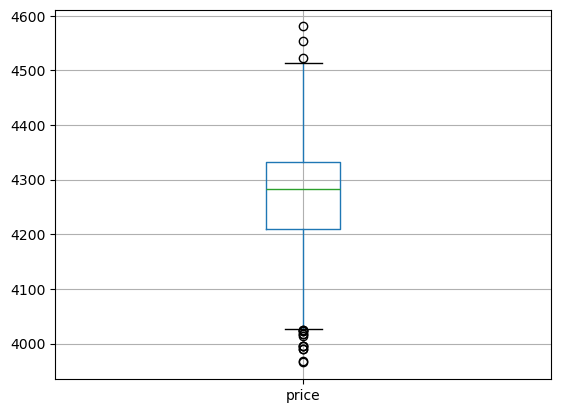

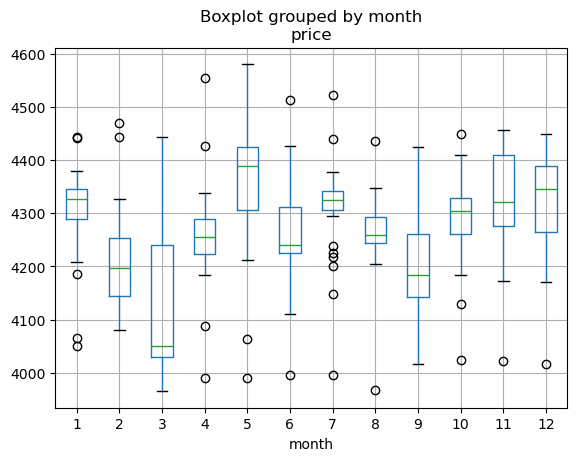

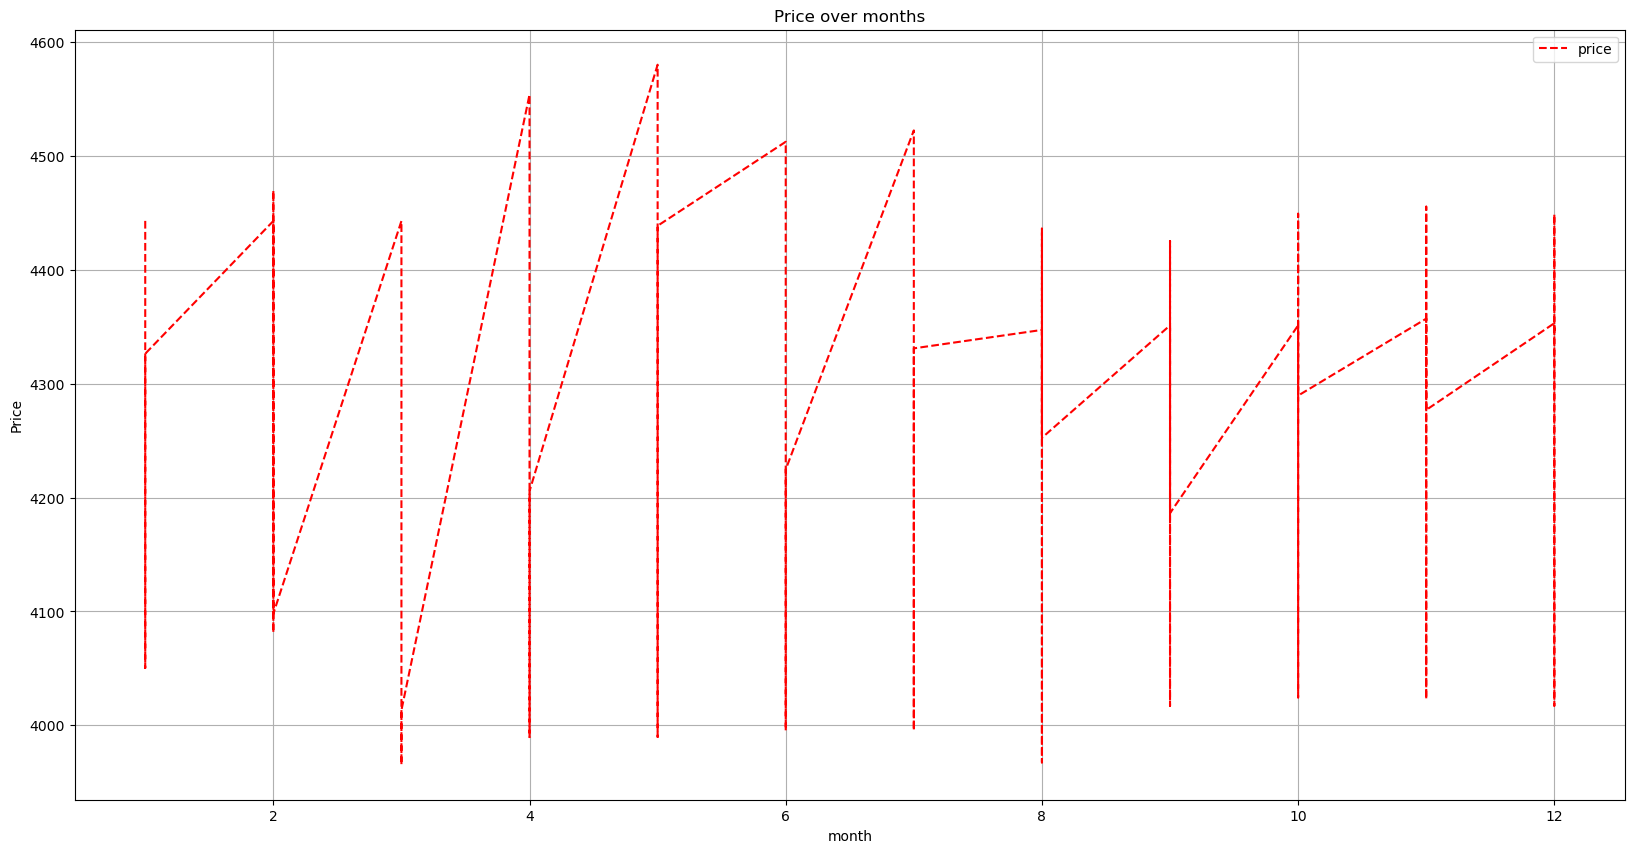

In [ ]:
def plot_all(df, date_col, price_col):
    # Line plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2021[date_col], df_2021[price_col], linestyle='solid')
    plt.title('Price Over Time', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

    # Histogram
    df_2021[price_col].hist(bins=10)
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.title('Histogram of Column Name')
    plt.show()

    # Dot plot
    plt.figure(figsize=(10,6))
    plt.plot_date(df_2021[date_col], df_2021[price_col], linestyle='none', marker='o', markersize=3)
    plt.title('Dot Plot of Price over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

    # Density plot
    sns.kdeplot(df_2021[price_col], shade=True, fill=True)
    plt.title('Density Plot of Price')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.show()

    # Box plot by month
    df_2021['month'] = df_2021[date_col].dt.month
    sns.boxplot(data=df_2021, x='month', y=price_col)
    plt.title('Box Plot of Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.show()

    # Line plot using pandas
    df_2021.plot(kind='line', x=date_col, y=price_col)
    plt.show()

    # Box plot using pandas
    df_2021.boxplot(column=price_col)
    plt.show()

    # Box plot by month using pandas
    df_2021.boxplot(column=price_col, by='month')
    plt.show()

    # Line plot with custom settings
    ax = df_2021.plot(kind='line', x='month', y=price_col, figsize=(20, 10), color='red', linestyle='--')
    ax.grid(True)
    ax.set_title('Price over months')
    ax.set_xlabel('month')
    ax.set_ylabel('Price')

# Call the function with your DataFrame and column names
plot_all(df_2021, 'date_cre', 'price')


In [ ]:
df_2021_dup = df_2021

In [ ]:
df_2021.reset_index(inplace=True)

In [ ]:
df_2021

date_cre   price  year  month  day
0   2021-01-01  4443.1  2021      1    1
1   2021-01-02  4365.3  2021      1    2
2   2021-01-03  4050.3  2021      1    3
3   2021-01-04  4065.8  2021      1    4
4   2021-01-05  4207.6  2021      1    5
..         ...     ...   ...    ...  ...
350 2021-12-17  4394.4  2021     12   17
351 2021-12-18  4389.5  2021     12   18
352 2021-12-19  4389.5  2021     12   19
353 2021-12-20  4354.1  2021     12   20
354 2021-12-21  4346.5  2021     12   21

[355 rows x 5 columns]

In [ ]:
df_2021.set_index('date_cre', inplace=True)

# Decompose the time series using an additive model
result_add = seasonal_decompose(df_2021['price'], model='additive')

# Compare the residuals of the two models
print('Variance of residuals for additive model: ', result_add.resid.var())

Variance of residuals for additive model:  7454.609993130029


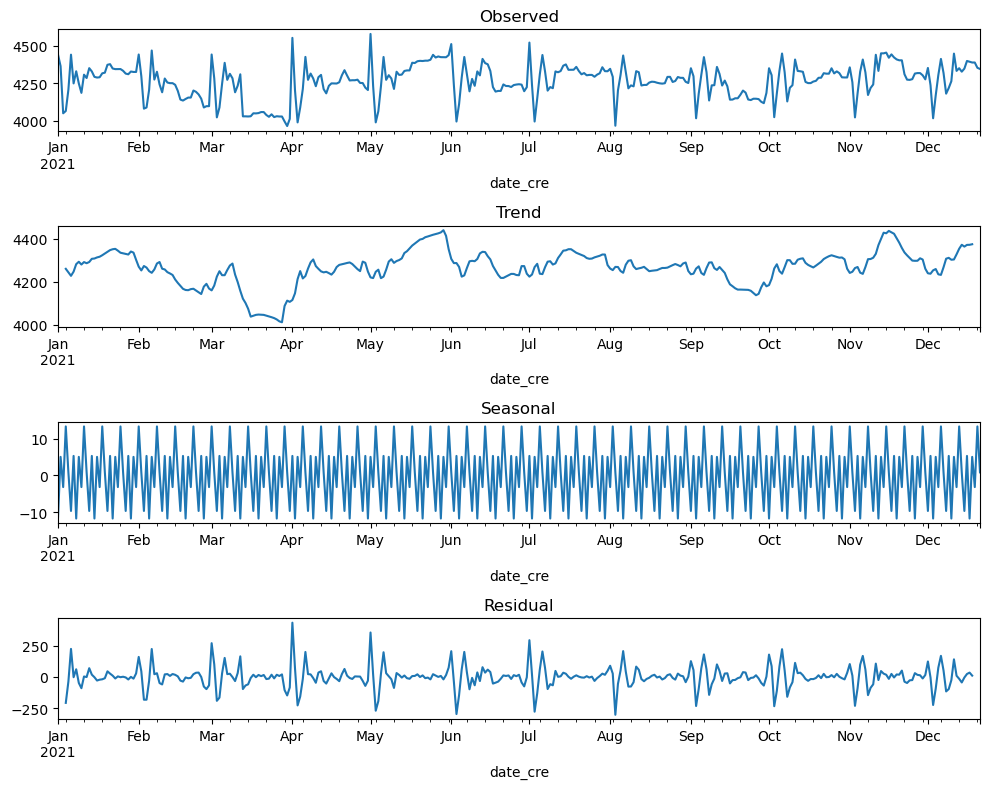

In [ ]:
df_2021_dup.set_index('date_cre', inplace=True)

# Decompose the time series
result = seasonal_decompose(df_2021_dup['price'], model='additive')

# Plot the original data, the trend, the seasonality, and the residuals
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8)) # You can adjust the size with the figsize parameter

result.observed.plot(ax=ax1)
ax1.set_title('Observed')

result.trend.plot(ax=ax2)
ax2.set_title('Trend')

result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')

result.resid.plot(ax=ax4)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### daily - 2021

In [ ]:
def monthly_describe(df, year):
    # Create a 'month' column
    df_2021['month'] = pd.DatetimeIndex(df_2021['date_cre']).month

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2021['year'] == year) & (df_2021['month'] == month)
        df_month = df_2021.loc[mask]

        # Print month name
        print(f"\n{month_dict[month]}:")

        # Generate descriptive statistics
        print(df_month.describe())

# Call the function
monthly_describe(df_2021, 2021)



January:
                  date_cre        price    year  month        day
count                   31    31.000000    31.0   31.0  31.000000
mean   2021-01-16 00:00:00  4305.209677  2021.0    1.0  16.000000
min    2021-01-01 00:00:00  4050.300000  2021.0    1.0   1.000000
25%    2021-01-08 12:00:00  4290.050000  2021.0    1.0   8.500000
50%    2021-01-16 00:00:00  4326.400000  2021.0    1.0  16.000000
75%    2021-01-23 12:00:00  4345.550000  2021.0    1.0  23.500000
max    2021-01-31 00:00:00  4443.100000  2021.0    1.0  31.000000
std                    NaN    85.156888     0.0    0.0   9.092121

February:
                  date_cre        price    year  month        day
count                   28    28.000000    28.0   28.0  28.000000
mean   2021-02-14 12:00:00  4208.853571  2021.0    2.0  14.500000
min    2021-02-01 00:00:00  4081.400000  2021.0    2.0   1.000000
25%    2021-02-07 18:00:00  4144.975000  2021.0    2.0   7.750000
50%    2021-02-14 12:00:00  4196.950000  2021.0    2.0 

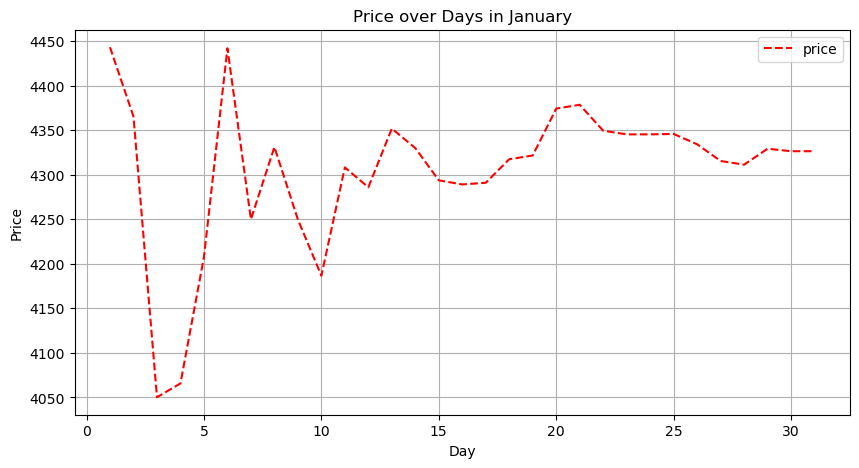

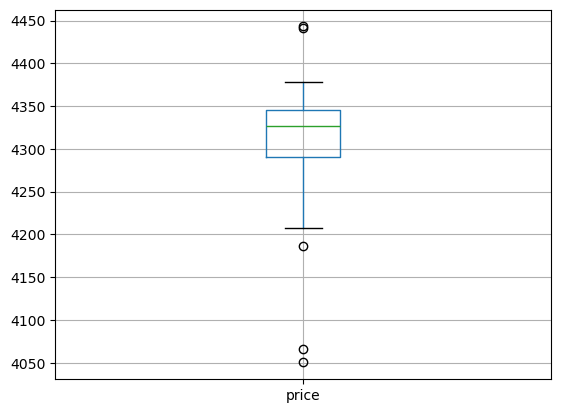

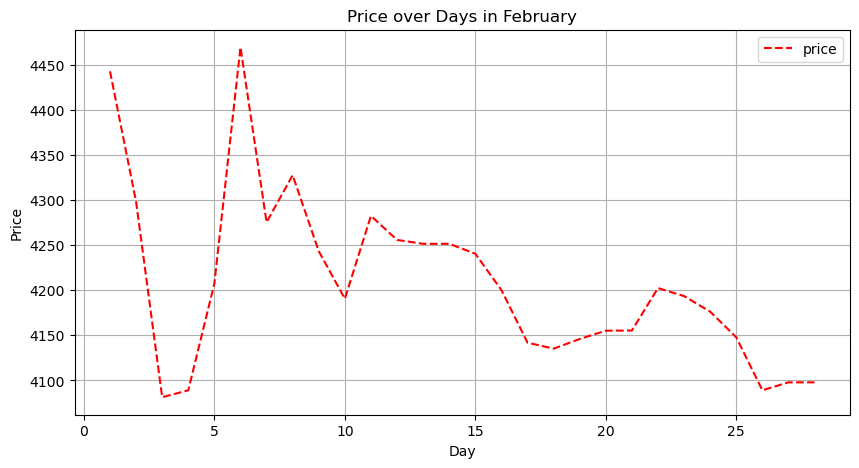

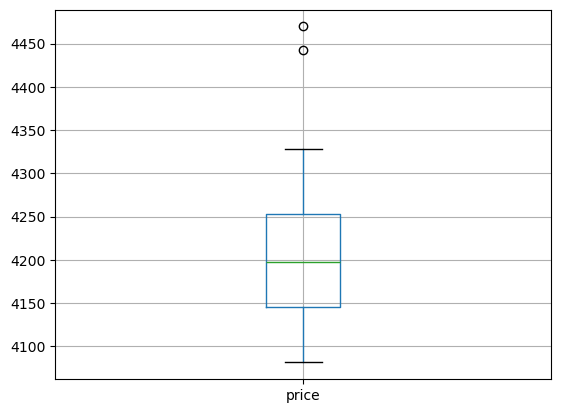

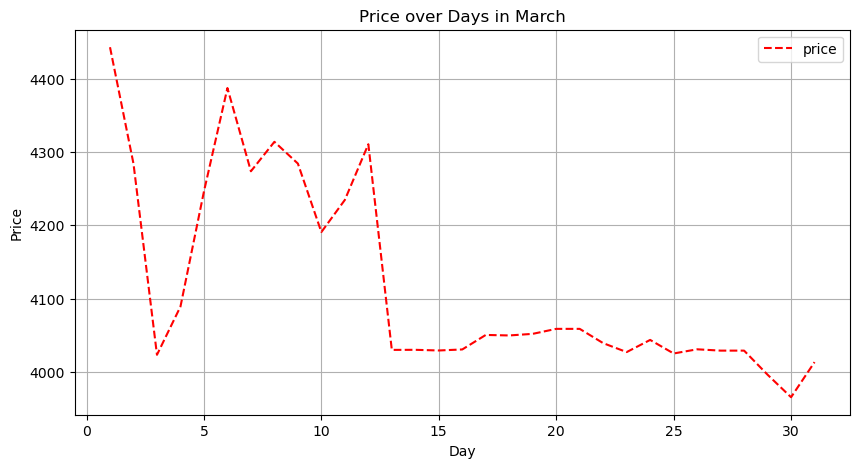

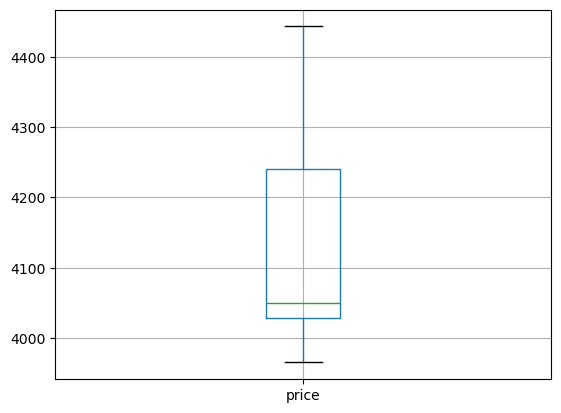

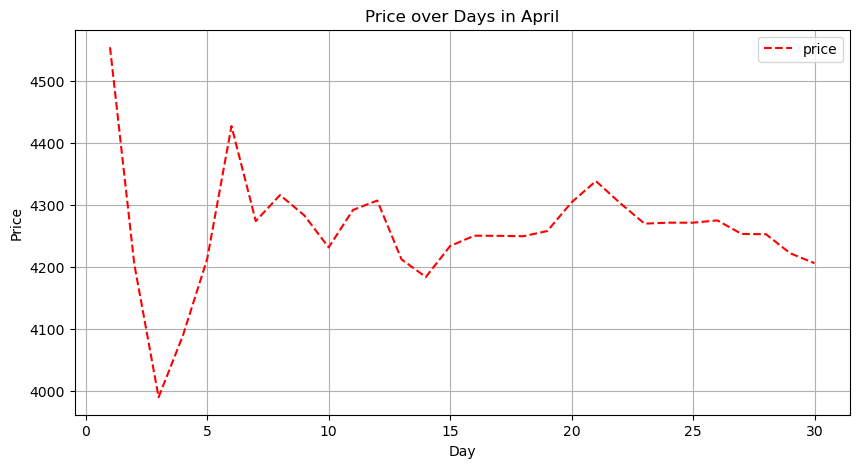

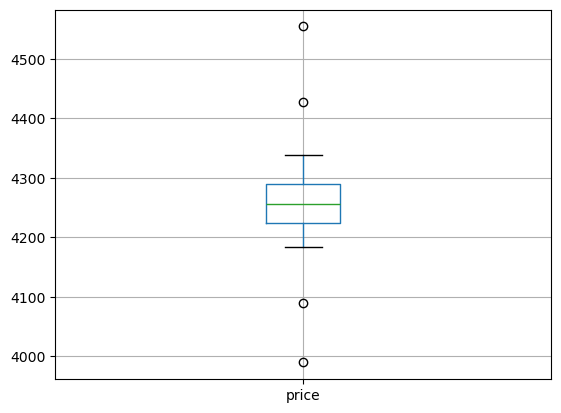

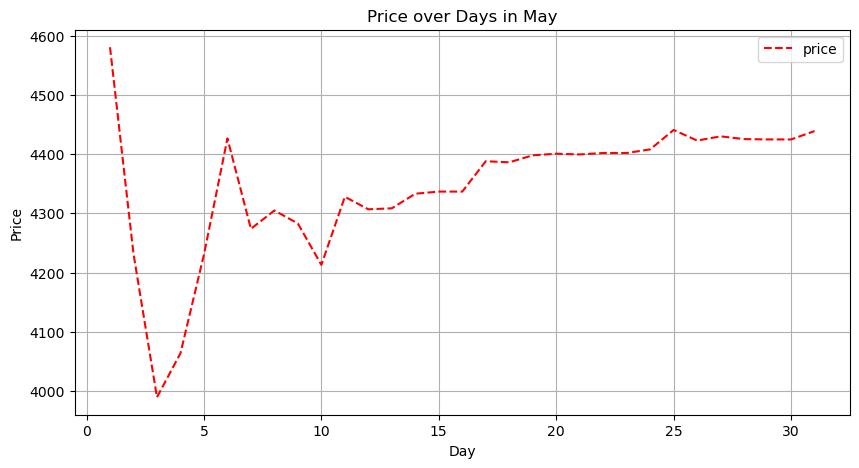

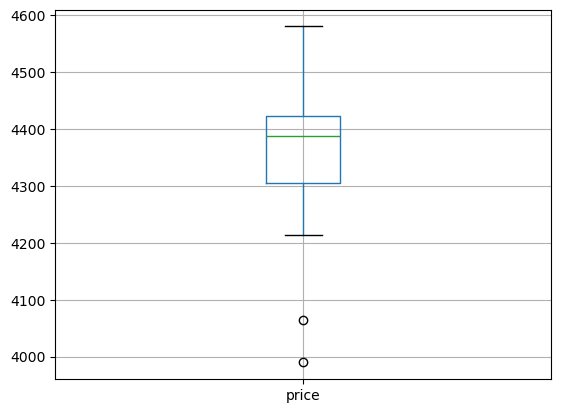

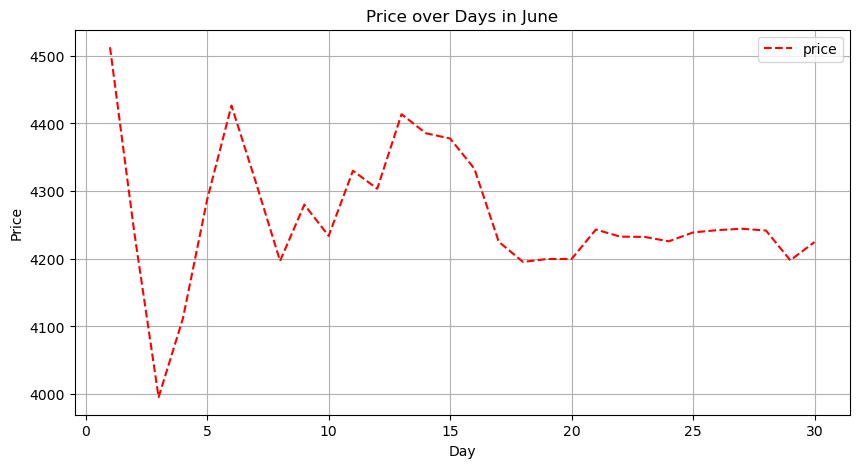

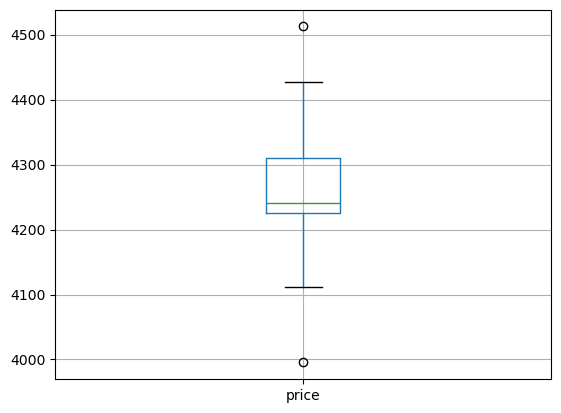

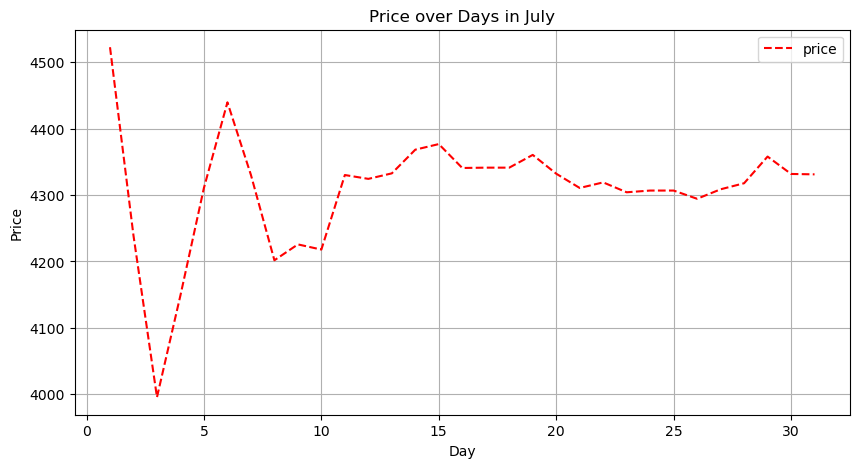

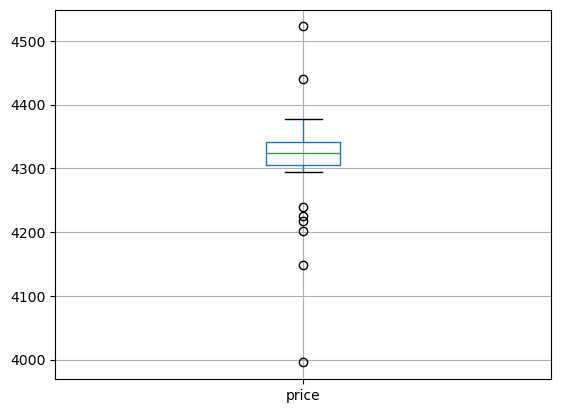

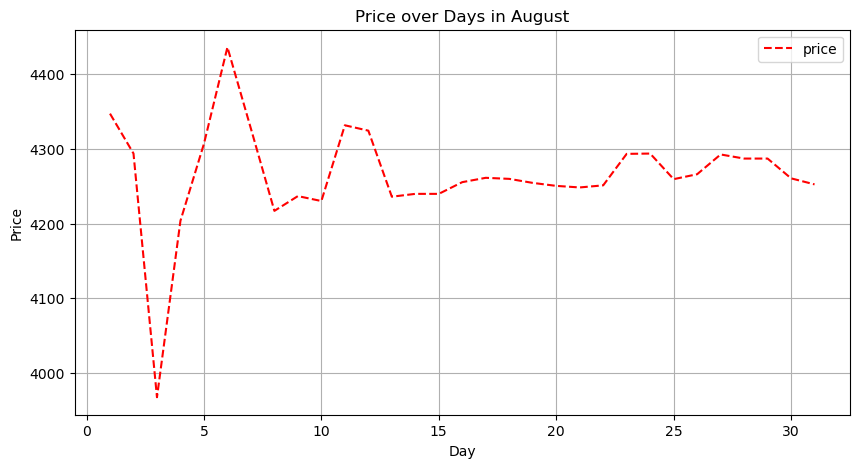

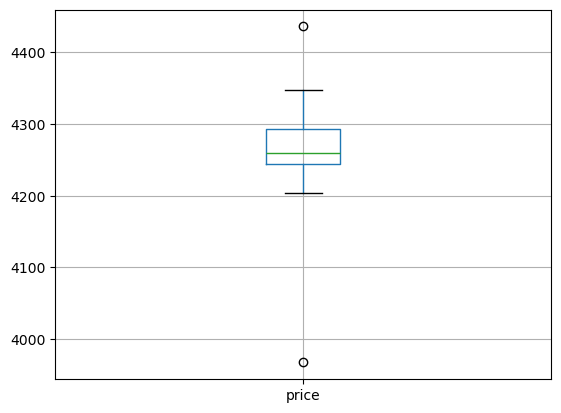

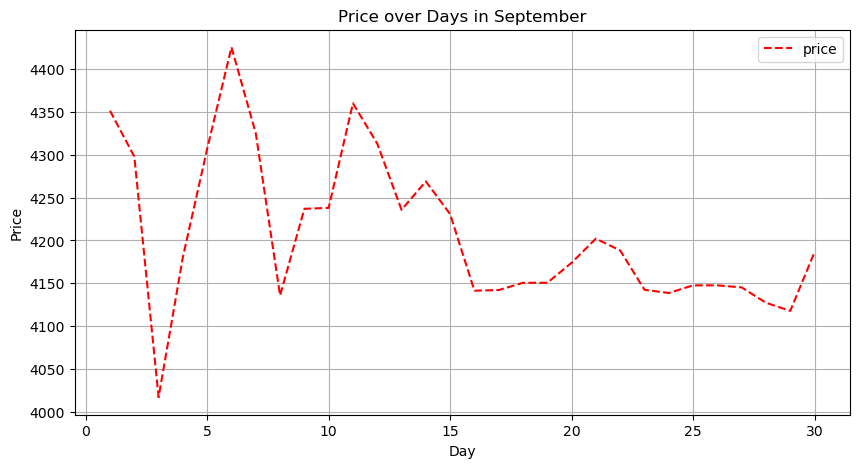

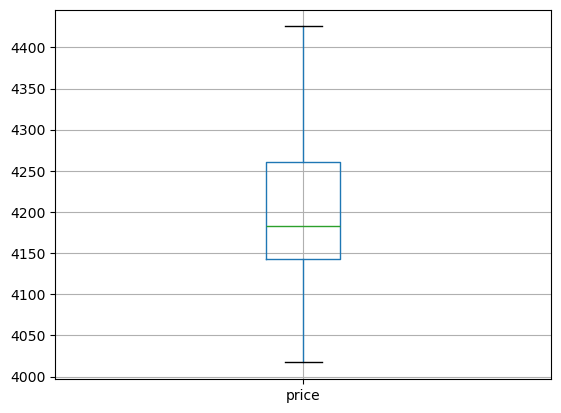

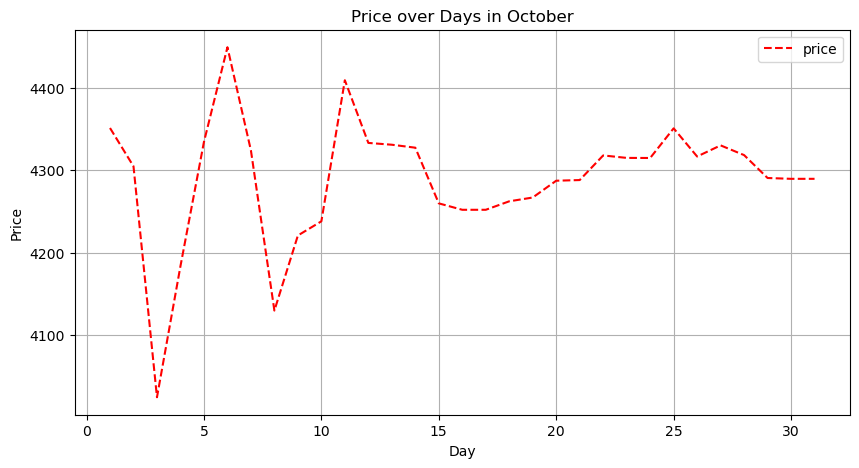

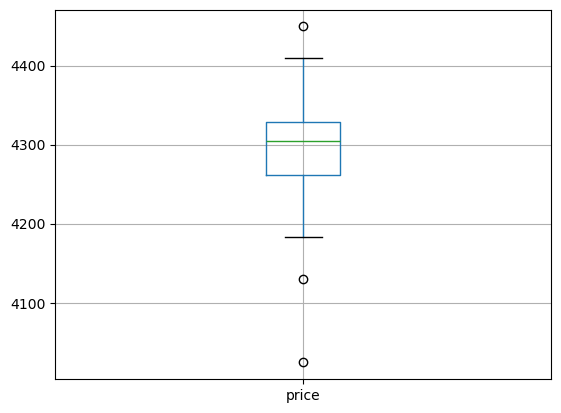

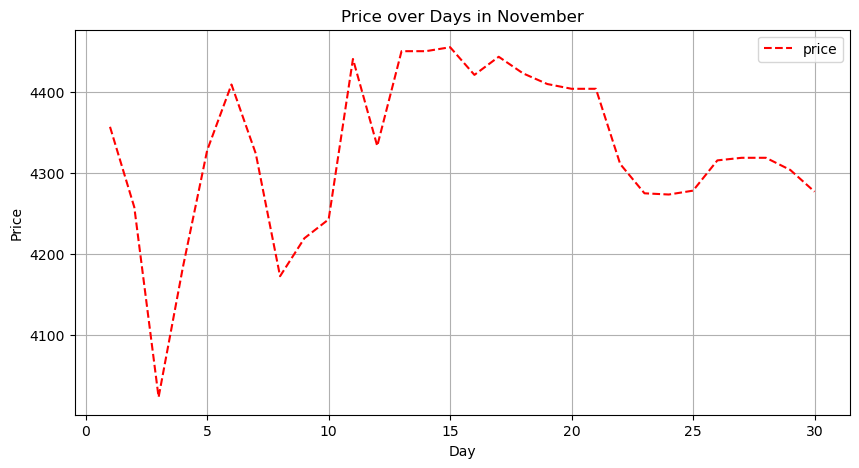

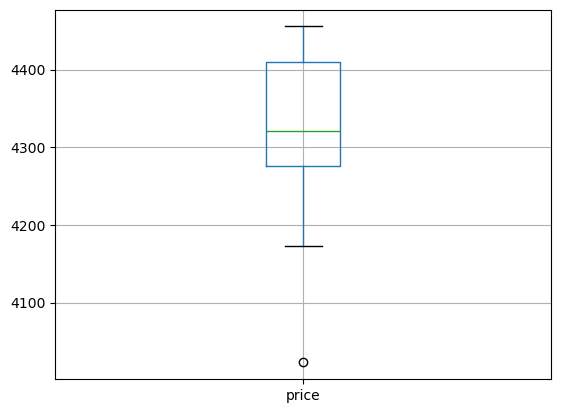

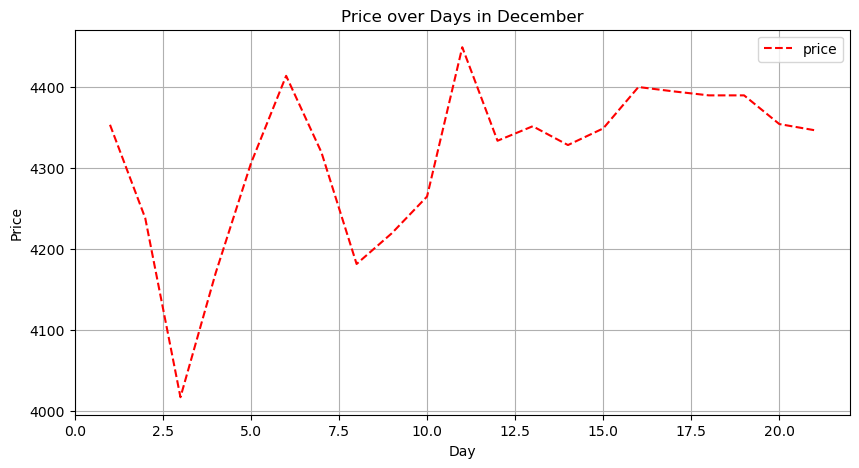

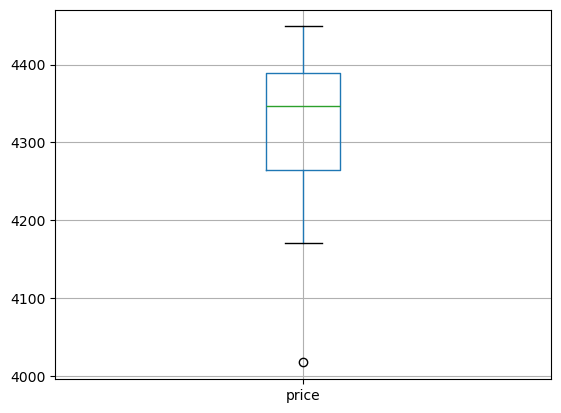

In [ ]:
def plot_monthly_price(df, year):
    # Create a 'month' column
    df_2021['month'] = pd.DatetimeIndex(df_2021['date_cre']).month
    df_2021['day'] = pd.DatetimeIndex(df_2021['date_cre']).day

    # Dictionary to map month numbers to names
    month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    # Loop over each month
    for month in range(1, 13):
        # Filter data for the given month
        mask = (df_2021['year'] == year) & (df_2021['month'] == month)
        df_month = df_2021.loc[mask]

        # Plot data
        ax = df_month.plot(kind='line', x='day', y='price', figsize=(10, 5), color='red', linestyle='--')
        ax.grid(True)
        ax.set_title(f'Price over Days in {month_dict[month]}')
        ax.set_xlabel('Day')
        ax.set_ylabel('Price')
        plt.show()

        # Boxplot for the 'price' column
        df_month.boxplot(column='price')
        plt.show()

# Call the function
plot_monthly_price(df_2021, 2021)
